##### After all the pre-filtering steps for the json files have been completed now (see the files: "claims_preprocessing.ipynb" and "claims_preprocessing_embedding_LLM.ipynb" in this folder), it is now time to convert the json into a pandas data frame and sample claims, because not all of the  claims in the json file will be used. 

## 1) Gaza-Israel Dataset

### 1) Loading and Converting pre-filtered json files into pandas dataframes 

In [2]:
# load relevant libraries

import pandas as pd 
import json 
import os
import numpy as np

In [2]:
# 1) Load pre-filtered json files

os.getcwd()

file_path_gaza_israel_json = "../gaza_israel/API_data_collection/API-fact-tools-google/claims_gaza_israel_combined_010724_300425_filtered_embedding_LLM_76_claims.json"

try:
    with open(file_path_gaza_israel_json, "r", encoding = "utf-8") as f:
        gaza_israel_filtered_json = json.load(f)
except FileNotFoundError:
    print(f"Error: File not found at {file_path_gaza_israel_json}")

print(f"Number of claims in api json: {len(gaza_israel_filtered_json['claims'])}")
gaza_israel_filtered_json

Number of claims in api json: 76


{'query': 'Gaza, Israel',
 'after_date': '2024-07-01T00:00:00Z',
 'language_code': 'en',
 'claims': [{'text': 'Photo shows a Turkey-made bomb that was dropped on Gaza.',
   'claimant': 'x.com',
   'claimDate': '2025-04-18T14:37:44Z',
   'claimReview': [{'publisher': {'site': 'misbar.com'},
     'url': 'https://www.misbar.com/en/factcheck/2025/04/18/image-does-not-show-debris-turkish-made-bomb-dropped-gaza',
     'title': 'Image Does Not Show Debris of Turkish-Made Bomb Dropped on Gaza',
     'reviewDate': '2025-04-18T14:37:44Z',
     'textualRating': 'misleading',
     'languageCode': 'en'}],
   'index': 0},
  {'text': 'Baby Sham did not lose her arm in an Israeli airstrike on the Shejaeya neighborhood, east of Gaza City.',
   'claimant': 'x.com',
   'claimDate': '2025-04-13T05:39:22Z',
   'claimReview': [{'publisher': {'site': 'misbar.com'},
     'url': 'https://www.misbar.com/en/factcheck/2025/04/13/contrary-trolls-baby-sham-lost-her-arm-and-died-israeli-airstrike',
     'title': 'Co

In [3]:
# 2) Load manual datasets to see the names and dtypes of the columns

gaza_israel_manual_df = pd.read_csv("../gaza_israel/Manual_data_collection/gaza_israel_manual_dataset_010724_300425.csv", index_col=0)
print(f"Number of claims in manual df: {len(gaza_israel_manual_df)}")
print(f"Data types of the columns: {gaza_israel_manual_df.dtypes}")
gaza_israel_manual_df.head()

Number of claims in manual df: 57
Data types of the columns: id                            int64
Website                      object
Article_URL                  object
Headline                     object
Claim_Date                   object
Review_Date                  object
Query/Keyword                object
Label_Website                object
Image_URL                    object
Original_Claim_Website       object
Original_Claim_Only          object
Context/Label_Explanation    object
Text_Only_Claim              object
Normal_Image                 object
AI_Generated_Image           object
Altered_Image                object
dtype: object


,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Website,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image
0,0,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.42JE3T2,False claims about US general being killed in ...,2025-04-06,2025-04-17,Israeli-Palestinian conflict,FALSE,https://pbs.twimg.com/media/Gn4wjgBXoAALax1?fo...,"""BREAKING: Reports confirm the death of Genera...","""BREAKING: Reports confirm the death of Genera...",A reverse image search reveals the photograph ...,No,Yes,No,No
1,1,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.39432WD,"Pictures show Gaza in ruins, not Myanmar quake...",2025-03-29,2025-04-17,Israeli-Palestinian conflict,FALSE,https://web.archive.org/web/20250402070342im_/...,"""A 7.9-magnitude earthquake in Myanmar, devast...","""A 7.9-magnitude earthquake in Myanmar, devast...","However, a reverse image search for the first ...",No,Yes,No,No
2,2,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.37W26WD,Image of 'Gazan mother with son's bones' is ma...,2025-03-24,2025-03-27,Israeli-Palestinian conflict,FALSE,https://scontent-hou1-1.xx.fbcdn.net/v/t39.308...,"""A mother holds the bones of her son in Gaza. ...","""A mother holds the bones of her son in Gaza. ...",A keyword search found a wider-angle version o...,No,No,Yes,No
3,3,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.36XY2FV,Old image misrepresented as 'Israeli settlers'...,2025-02-16,2025-02-19,Israeli-Palestinian conflict,FALSE,https://pbs.twimg.com/media/Gj5tbXiaQAAoG1z?fo...,"""Israeli media reports there are Jews who have...","""Israeli media reports there are Jews who have...",A reverse image search via Google traced the v...,No,Yes,No,No
4,4,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.36RF6BZ,"Picture shows Israel's 2018 Gaza attack, not a...",2024-12-22,2024-12-26,Israeli-Palestinian conflict,FALSE,https://media.gettyimages.com/id/1060718622/de...,"""Americans bombarded Yemen in reprisal after Y...","""Americans bombarded Yemen in reprisal after Y...",But a reverse image search on Google found the...,No,Yes,No,No


In [4]:
# 3) Convert the json files into pandas df's and use the same/similar column names 

## 3.1) Extracting the claims from the json (we onyl need them)

gaza_israel_filtered_json_claims = gaza_israel_filtered_json['claims']
gaza_israel_filtered_json_claims

## 3.2) Adding an identifier key to each claim, whether its original API query was "Gaza" or "Israel" 
### There are 76 claims in total. The first part of the claims are from the query "Gaza" used in the API and the second part of the claims
## are from the query "Israel" used in the API. This is due to how I added the claims from both original jsons into one list
## in the "claims_preprocessing_embedding_LLM.ipynb" notebook together: first Gaza claims, second Israel claims. 
## To figure out the last Gaza claim and the first Israel claim I manually compared the combined filtered 
## Israel-Gaza json ("claims_gaza_israel_combined_010724_040525_filtered_embedding_LLM_76_claims.json") with each of the filtered
## original Gaza ("claims_gaza_010724_040525_17_claims.json") and Israel ("claims_israel_010724_040525_filtered_88_claims.json") jsons.

## Result: 
### Claims with index 0-11 have the query "Gaza"
### Claims with index 12 - 75 have the query "Israel"

for claim in gaza_israel_filtered_json_claims:
    index = claim['index']
    if 0 <= index <= 11:
        claim['query'] = "Gaza"
    elif 12 <= index <= 75:
        claim['query'] = "Israel"

# Check that it was successful
gaza_israel_filtered_json_claims


[{'text': 'Photo shows a Turkey-made bomb that was dropped on Gaza.',
  'claimant': 'x.com',
  'claimDate': '2025-04-18T14:37:44Z',
  'claimReview': [{'publisher': {'site': 'misbar.com'},
    'url': 'https://www.misbar.com/en/factcheck/2025/04/18/image-does-not-show-debris-turkish-made-bomb-dropped-gaza',
    'title': 'Image Does Not Show Debris of Turkish-Made Bomb Dropped on Gaza',
    'reviewDate': '2025-04-18T14:37:44Z',
    'textualRating': 'misleading',
    'languageCode': 'en'}],
  'index': 0,
  'query': 'Gaza'},
 {'text': 'Baby Sham did not lose her arm in an Israeli airstrike on the Shejaeya neighborhood, east of Gaza City.',
  'claimant': 'x.com',
  'claimDate': '2025-04-13T05:39:22Z',
  'claimReview': [{'publisher': {'site': 'misbar.com'},
    'url': 'https://www.misbar.com/en/factcheck/2025/04/13/contrary-trolls-baby-sham-lost-her-arm-and-died-israeli-airstrike',
    'title': 'Contrary to Trolls, Baby Sham Lost Her Arm and Died in Israeli Airstrike',
    'reviewDate': '2025

keys to keep:
  - text
  - claimDate
  - claimReview:
    - publisher
      - site (not name -> is not available in all claims)
    - url
    - title
    - reviewDate
    - textualRating
  - index
  - query

keys to remove:
  - claimaint (is not relevant on which social media platform the user posted it)
  - languageCode (all claims are in English)

- Use the logic of this code -> Source: https://www.kdnuggets.com/converting-jsons-to-pandas-dataframes-parsing-them-the-right-way

In [5]:
## 3.2) Deciding which keys to keep and which to remove (see markdown ceel above)

## first define the keys to keep at each dictionary level (nested structure)
top_level_keys_to_keep = ["text", "claimDate", "claimReview", "index", "query"]
claim_review_keys_to_keep = ["publisher", "url", "title", "reviewDate", "textualRating"]
publisher_keys_to_keep = ["site"]

def filter_keys_from_list_of_claims(list_of_claims):

    """ 
    Add a description of the function here
    
    """

    filtered_claims = []

    for claim in list_of_claims:
        # Filter top level
        filtered_claim = {key: claim[key] for key in top_level_keys_to_keep if key in claim}

        # Handle the nested claimReview list
        if "claimReview" in filtered_claim and filtered_claim["claimReview"]:
            filtered_claim_reviews = []

            for review in filtered_claim["claimReview"]:
                # Filter each review
                filtered_review = {key: review[key] for key in claim_review_keys_to_keep if key in review}

                # Handle the nested publisher dictionary
                if "publisher" in filtered_review and filtered_review["publisher"]:
                    # Create a new publisher dict with only the specified keys
                    filtered_publisher = {key: filtered_review["publisher"][key] for key 
                                          in publisher_keys_to_keep if key in filtered_review["publisher"]}
                    filtered_review["publisher"] = filtered_publisher
                
                filtered_claim_reviews.append(filtered_review)

            filtered_claim["claimReview"] = filtered_claim_reviews

        filtered_claims.append(filtered_claim)

    return filtered_claims


# Apply the function


gaza_israel_filtered_json_claims_keys = filter_keys_from_list_of_claims(gaza_israel_filtered_json_claims)
gaza_israel_filtered_json_claims_keys

[{'text': 'Photo shows a Turkey-made bomb that was dropped on Gaza.',
  'claimDate': '2025-04-18T14:37:44Z',
  'claimReview': [{'publisher': {'site': 'misbar.com'},
    'url': 'https://www.misbar.com/en/factcheck/2025/04/18/image-does-not-show-debris-turkish-made-bomb-dropped-gaza',
    'title': 'Image Does Not Show Debris of Turkish-Made Bomb Dropped on Gaza',
    'reviewDate': '2025-04-18T14:37:44Z',
    'textualRating': 'misleading'}],
  'index': 0,
  'query': 'Gaza'},
 {'text': 'Baby Sham did not lose her arm in an Israeli airstrike on the Shejaeya neighborhood, east of Gaza City.',
  'claimDate': '2025-04-13T05:39:22Z',
  'claimReview': [{'publisher': {'site': 'misbar.com'},
    'url': 'https://www.misbar.com/en/factcheck/2025/04/13/contrary-trolls-baby-sham-lost-her-arm-and-died-israeli-airstrike',
    'title': 'Contrary to Trolls, Baby Sham Lost Her Arm and Died in Israeli Airstrike',
    'reviewDate': '2025-04-13T05:39:22Z',
    'textualRating': 'fake'}],
  'index': 1,
  'query

In [6]:
gaza_israel_manual_df.head()

## id -> index
## Website -> publisher[site]
## Article_URL -> url
## Headline -> title
## Month/Year -> reviewDate
## Query/Keyword -> query
## Label_Website -> textualRating
## Image_URL -> add later 
## Original_Claim_Website -> NA
## Original_Claim_Only -> text
## Context_Label_Explanation -> maybe add later

## Adding later (3.5):
## Text_Only_Claim, Normal_Image?, AI_Generated_Image?, Altered_Image?

## Adding later when scraping the images -> see "scrape_images" folder:
## image_path_jpg, image_path_png, image_path_webp

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Website,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image
0,0,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.42JE3T2,False claims about US general being killed in ...,2025-04-06,2025-04-17,Israeli-Palestinian conflict,FALSE,https://pbs.twimg.com/media/Gn4wjgBXoAALax1?fo...,"""BREAKING: Reports confirm the death of Genera...","""BREAKING: Reports confirm the death of Genera...",A reverse image search reveals the photograph ...,No,Yes,No,No
1,1,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.39432WD,"Pictures show Gaza in ruins, not Myanmar quake...",2025-03-29,2025-04-17,Israeli-Palestinian conflict,FALSE,https://web.archive.org/web/20250402070342im_/...,"""A 7.9-magnitude earthquake in Myanmar, devast...","""A 7.9-magnitude earthquake in Myanmar, devast...","However, a reverse image search for the first ...",No,Yes,No,No
2,2,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.37W26WD,Image of 'Gazan mother with son's bones' is ma...,2025-03-24,2025-03-27,Israeli-Palestinian conflict,FALSE,https://scontent-hou1-1.xx.fbcdn.net/v/t39.308...,"""A mother holds the bones of her son in Gaza. ...","""A mother holds the bones of her son in Gaza. ...",A keyword search found a wider-angle version o...,No,No,Yes,No
3,3,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.36XY2FV,Old image misrepresented as 'Israeli settlers'...,2025-02-16,2025-02-19,Israeli-Palestinian conflict,FALSE,https://pbs.twimg.com/media/Gj5tbXiaQAAoG1z?fo...,"""Israeli media reports there are Jews who have...","""Israeli media reports there are Jews who have...",A reverse image search via Google traced the v...,No,Yes,No,No
4,4,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.36RF6BZ,"Picture shows Israel's 2018 Gaza attack, not a...",2024-12-22,2024-12-26,Israeli-Palestinian conflict,FALSE,https://media.gettyimages.com/id/1060718622/de...,"""Americans bombarded Yemen in reprisal after Y...","""Americans bombarded Yemen in reprisal after Y...",But a reverse image search on Google found the...,No,Yes,No,No


In [7]:
## 3.3) Convert the json/list of dictionaries into a pandas df &  Renaming the columns to align with the naming of the manual df 


df_data = []

for claim in gaza_israel_filtered_json_claims_keys:

    # Extract the claim review
    claim_review = claim["claimReview"][0] if claim["claimReview"] else {}

    row = {
        "id": claim["index"],
        "Website": claim_review.get("publisher", {}).get("site", np.nan), #add nan value if there is no value
        "Article_URL": claim_review.get("url", np.nan),
        "Headline": claim_review.get("title", np.nan),
        "Claim_Date": claim["claimDate"],
        "Review_Date": claim_review.get("reviewDate", np.nan),
        "Query/Keyword": claim["query"],
        "Label_Website": claim_review.get("textualRating", np.nan),
        "Original_Claim_Only": claim["text"],

    }
    df_data.append(row)

# Create df
df = pd.DataFrame(df_data)
print(len(df))
print(df.dtypes)
df.head()



76
id                      int64
Website                object
Article_URL            object
Headline               object
Claim_Date             object
Review_Date            object
Query/Keyword          object
Label_Website          object
Original_Claim_Only    object
dtype: object


,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Original_Claim_Only
0,0,misbar.com,https://www.misbar.com/en/factcheck/2025/04/18...,Image Does Not Show Debris of Turkish-Made Bom...,2025-04-18T14:37:44Z,2025-04-18T14:37:44Z,Gaza,misleading,Photo shows a Turkey-made bomb that was droppe...
1,1,misbar.com,https://www.misbar.com/en/factcheck/2025/04/13...,"Contrary to Trolls, Baby Sham Lost Her Arm and...",2025-04-13T05:39:22Z,2025-04-13T05:39:22Z,Gaza,fake,Baby Sham did not lose her arm in an Israeli a...
2,2,ndtv.com,https://www.ndtv.com/world-news/did-taylor-swi...,Did Taylor Swift Say LA Fires Are Payback For ...,2025-01-15T10:57:34Z,2025-01-15T10:57:34Z,Gaza,False,Did Taylor Swift Say LA Fires Are Payback For ...
3,3,newsmobile.in,https://www.newsmobile.in/nm-fact-checker/fact...,Fact Check: This Picture Of Dog Holding A Chil...,2024-12-30T00:00:00Z,2024-12-31T00:00:00Z,Gaza,False,picture of a dog holding an infant in his mout...
4,4,misbar.com,https://www.misbar.com/en/factcheck/2024/12/30...,This Footage Does Not Show Aerial Footage of G...,2024-12-30T10:26:01Z,2024-12-30T10:26:01Z,Gaza,misleading,"This is Gaza, completely destroyed. It looks l..."


In [8]:
## 3.4) Adding missing columns (e.g, columns for url of images and type of claims)
### Not added here: the columns for the image path -> this will be done automatically with the notebook
### "scrape_images.ipynb" in the "scrape_images" folder

df["Image_URL"] = "" #create an empty column, that will be filled manually later for the sampled claims
df["Context/Label_Explanation"] = "" #create an empty column, might be filled manually later
df["Text_Only_Claim"] = "" #create an empty column, that will be filled manually later for the sampled claims
df["Normal_Image"] = "" #create an empty column, that will be filled manually later for the sampled claims
df["AI_Generated_Image"] = "" #create an empty column, that will be filled manually later for the sampled claims
df["Altered_Image"] = "" #create an empty column, that will be filled manually later for the sampled claims

print(gaza_israel_manual_df.columns)
print(df.columns)

df.head()

Index(['id', 'Website', 'Article_URL', 'Headline', 'Claim_Date', 'Review_Date',
       'Query/Keyword', 'Label_Website', 'Image_URL', 'Original_Claim_Website',
       'Original_Claim_Only', 'Context/Label_Explanation', 'Text_Only_Claim',
       'Normal_Image', 'AI_Generated_Image', 'Altered_Image'],
      dtype='object')
Index(['id', 'Website', 'Article_URL', 'Headline', 'Claim_Date', 'Review_Date',
       'Query/Keyword', 'Label_Website', 'Original_Claim_Only', 'Image_URL',
       'Context/Label_Explanation', 'Text_Only_Claim', 'Normal_Image',
       'AI_Generated_Image', 'Altered_Image'],
      dtype='object')


,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Original_Claim_Only,Image_URL,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image
0,0,misbar.com,https://www.misbar.com/en/factcheck/2025/04/18...,Image Does Not Show Debris of Turkish-Made Bom...,2025-04-18T14:37:44Z,2025-04-18T14:37:44Z,Gaza,misleading,Photo shows a Turkey-made bomb that was droppe...,,,,,,
1,1,misbar.com,https://www.misbar.com/en/factcheck/2025/04/13...,"Contrary to Trolls, Baby Sham Lost Her Arm and...",2025-04-13T05:39:22Z,2025-04-13T05:39:22Z,Gaza,fake,Baby Sham did not lose her arm in an Israeli a...,,,,,,
2,2,ndtv.com,https://www.ndtv.com/world-news/did-taylor-swi...,Did Taylor Swift Say LA Fires Are Payback For ...,2025-01-15T10:57:34Z,2025-01-15T10:57:34Z,Gaza,False,Did Taylor Swift Say LA Fires Are Payback For ...,,,,,,
3,3,newsmobile.in,https://www.newsmobile.in/nm-fact-checker/fact...,Fact Check: This Picture Of Dog Holding A Chil...,2024-12-30T00:00:00Z,2024-12-31T00:00:00Z,Gaza,False,picture of a dog holding an infant in his mout...,,,,,,
4,4,misbar.com,https://www.misbar.com/en/factcheck/2024/12/30...,This Footage Does Not Show Aerial Footage of G...,2024-12-30T10:26:01Z,2024-12-30T10:26:01Z,Gaza,misleading,"This is Gaza, completely destroyed. It looks l...",,,,,,


In [9]:
# reorder columns

new_column_order = [
    'id', 
    'Website', 
    'Article_URL', 
    'Headline', 
    'Claim_Date', 
    'Review_Date', 
    'Query/Keyword',
    'Label_Website',
    'Image_URL',  
    'Original_Claim_Only',
    'Context/Label_Explanation', 
    'Text_Only_Claim', 
    'Normal_Image', 
    'AI_Generated_Image', 
    'Altered_Image'
]

df = df[new_column_order]

df.head()

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image
0,0,misbar.com,https://www.misbar.com/en/factcheck/2025/04/18...,Image Does Not Show Debris of Turkish-Made Bom...,2025-04-18T14:37:44Z,2025-04-18T14:37:44Z,Gaza,misleading,,Photo shows a Turkey-made bomb that was droppe...,,,,,
1,1,misbar.com,https://www.misbar.com/en/factcheck/2025/04/13...,"Contrary to Trolls, Baby Sham Lost Her Arm and...",2025-04-13T05:39:22Z,2025-04-13T05:39:22Z,Gaza,fake,,Baby Sham did not lose her arm in an Israeli a...,,,,,
2,2,ndtv.com,https://www.ndtv.com/world-news/did-taylor-swi...,Did Taylor Swift Say LA Fires Are Payback For ...,2025-01-15T10:57:34Z,2025-01-15T10:57:34Z,Gaza,False,,Did Taylor Swift Say LA Fires Are Payback For ...,,,,,
3,3,newsmobile.in,https://www.newsmobile.in/nm-fact-checker/fact...,Fact Check: This Picture Of Dog Holding A Chil...,2024-12-30T00:00:00Z,2024-12-31T00:00:00Z,Gaza,False,,picture of a dog holding an infant in his mout...,,,,,
4,4,misbar.com,https://www.misbar.com/en/factcheck/2024/12/30...,This Footage Does Not Show Aerial Footage of G...,2024-12-30T10:26:01Z,2024-12-30T10:26:01Z,Gaza,misleading,,"This is Gaza, completely destroyed. It looks l...",,,,,


In [10]:
#check if there are any na values in df

nan_in_df = df.isnull().sum().sum()

nan_in_df # rows


4

In [11]:
# print out rows with NaN values in any column

df.loc[df.isnull().any(axis=1)] #all of them are lacking a review data

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image
5,5,factcheck.org,https://www.factcheck.org/2024/11/viral-claim-...,Viral Claim Falsely Suggests Trump Ended Viole...,2024-11-06T00:00:00Z,NaN,Gaza,Distorts the Facts,,"Donald Trump's election led Hamas to call ""for...",,,,,
12,12,ptinews.com,https://www.ptinews.com/fact-detail/pti-fact-c...,"PTI Fact Check: No, Israeli Embassy did not is...",2025-04-30T15:04:01Z,NaN,Israel,False,,"No, Israeli Embassy did not issue note verbale...",,,,,
44,44,indiatvnews.com,https://www.indiatvnews.com/fact-check/fact-ch...,Fact Check: Did Hezbollah chief Nasrallah brea...,2024-09-28T00:00:00Z,NaN,Israel,Misleading,,Fact Check: Did Hezbollah chief Nasrallah brea...,,,,,
62,62,indiatoday.in,https://www.indiatoday.in/fact-check/story/fac...,Fact Check: Old Karate contest photo shared as...,2024-08-05T00:00:00Z,NaN,Israel,False,,Egyptian karate players raised the Palestinian...,,,,,


In [13]:
# save the df for a quick manual inspection

df.to_csv("../gaza_israel/API_data_collection/API-fact-tools-google/gaza_israel_api_dataset_full.csv", index=True)


### 2) Sampling the json files to reach the final dataset of n = 100 for both Gaza-Israel dataset and Ukraine-Russia dataset 

- Gaza-Israel manual dataset: n = 64
  - thus, n = 36 claims are missing 

- Ukraine-Russia manual dataset: n = 46
  - thus, n = 54 claims are missing 


- Sampling process:
  - Get claims with AI-generated or edited images first (these claims might be harder to predict for the model and are also a new feature in the datasets compared to previous multimodal fact-checking datasets)
  - Take a random sample of the rest of the claims, until the target data size of n = 100 is reached 

- Additional manual data collection process:
  - Use the link to the fact-checking website of the "Article_URL" column to search for:
    - the "Image_URL" if the claim refers to an image
    - how the fact-checking website came up with a label and copy the explanation into the "Context/Label_Explanation" column
    - the type of the claim, i.e.: "Text_Only_Claim", "Normal_Image", "AI_Generated_Image" or "Alter_Image" and give it a True/False for each column
  - Store that data for each claim in a dictionary and use the "id" column as a reference to add the data to the data frame, once each of the claim is processed and n = 100 claims is reached. 




#### 2.1) Claims with AI-generated images

In [14]:
df

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image
0,0,misbar.com,https://www.misbar.com/en/factcheck/2025/04/18...,Image Does Not Show Debris of Turkish-Made Bom...,2025-04-18T14:37:44Z,2025-04-18T14:37:44Z,Gaza,misleading,,Photo shows a Turkey-made bomb that was droppe...,,,,,
1,1,misbar.com,https://www.misbar.com/en/factcheck/2025/04/13...,"Contrary to Trolls, Baby Sham Lost Her Arm and...",2025-04-13T05:39:22Z,2025-04-13T05:39:22Z,Gaza,fake,,Baby Sham did not lose her arm in an Israeli a...,,,,,
2,2,ndtv.com,https://www.ndtv.com/world-news/did-taylor-swi...,Did Taylor Swift Say LA Fires Are Payback For ...,2025-01-15T10:57:34Z,2025-01-15T10:57:34Z,Gaza,False,,Did Taylor Swift Say LA Fires Are Payback For ...,,,,,
3,3,newsmobile.in,https://www.newsmobile.in/nm-fact-checker/fact...,Fact Check: This Picture Of Dog Holding A Chil...,2024-12-30T00:00:00Z,2024-12-31T00:00:00Z,Gaza,False,,picture of a dog holding an infant in his mout...,,,,,
4,4,misbar.com,https://www.misbar.com/en/factcheck/2024/12/30...,This Footage Does Not Show Aerial Footage of G...,2024-12-30T10:26:01Z,2024-12-30T10:26:01Z,Gaza,misleading,,"This is Gaza, completely destroyed. It looks l...",,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,71,logicallyfacts.com,https://www.logicallyfacts.com/en/fact-check/f...,"No, photo doesn’t show Gaza man holding hand o...",2024-07-14T00:00:00Z,2024-07-16T00:00:00Z,Israel,False,,This photo shows a man from Gaza holding the h...,,,,,
72,72,misbar.com,https://www.misbar.com/en/factcheck/2024/07/15...,Israel Tragically Killed the Hamida Siblings i...,2024-07-15T20:00:54Z,2024-07-15T20:00:54Z,Israel,misleading,,Mayar Hamida (9 years old) and Bilal Hamida (6...,,,,,
73,73,usatoday.com,https://www.usatoday.com/story/news/factcheck/...,False claim Americans drafted for Israel-Hamas...,2024-07-09T00:00:00Z,2024-07-12T21:24:27Z,Israel,False,,US reinstituted draft for Israel-Hamas war,,,,,
74,74,logicallyfacts.com,https://www.logicallyfacts.com/en/fact-check/f...,AI image of Dwayne Johnson shared to claim tha...,2024-07-20T00:00:00Z,2024-07-11T00:00:00Z,Israel,Fake,,The image shows Dwayne Johnson wearing Israeli...,,,,,


In [15]:
# If there is an AI image, it should either be referenced either in the headline, label, or claim
## trying it out with different keywords:

AI_keywords = ["AI", "AI ", "AI-", "AI-generated", "AI generated", "Artificial Intelligence", "Articial intelligence", "artificial intelligence"]

# Case-Sensitive String Search in Columns
headline_rows = df["Headline"].str.contains('|'.join(AI_keywords), case = True)
label_rows = df["Label_Website"].str.contains('|'.join(AI_keywords), case = True)
claim_text_rows = df["Original_Claim_Only"].str.contains('|'.join(AI_keywords), case = True)

In [16]:
pd.set_option('display.max_colwidth', None)

# Filter the DataFrame to show only rows where a headline contains any AI-related keyword
matching_headline_rows = df[headline_rows]
matching_headline_rows

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image
8,8,newsmobile.in,https://www.newsmobile.in/nm-fact-checker/fact-check-this-image-claiming-to-show-journalist-from-gaza-is-ai-generated/,Fact Check: Viral Image Claiming To Show Body Of A Journalist From Gaza Is Not Real But AI-generated,2024-10-14T00:00:00Z,2024-10-16T00:00:00Z,Gaza,Misleading,,Image shows a journalist's body in Gaza,,,,,
28,28,misbar.com,https://www.misbar.com/en/factcheck/2025/02/05/image-of-israeli-pm-netanyahu-with-trump-and-musk-is-ai-generated,Image of Israeli PM Netanyahu With Trump and Musk Is AI-Generated,2025-02-05T12:29:04Z,2025-02-05T12:29:04Z,Israel,fake,,A dangerous photo of Israeli Prime Minister Benjamin Netanyahu with US President Trump and Elon Musk!,,,,,
45,45,misbar.com,https://www.misbar.com/en/factcheck/2024/09/26/this-photo-of-ramat-david-is-ai-generated,This Photo Of Ramat David Is AI-Generated,2024-09-26T19:43:07Z,2024-09-26T19:43:07Z,Israel,fake,,Despite strict military censorship in Israel A photo of the Ramat David base that was attacked by Hezbollah at dawn today was leaked - unconfirmed. Israel does not acknowledge that anything happened at this air base. This base is the largest Israeli air base in the north and center of the country. ETReport,,,,,
74,74,logicallyfacts.com,https://www.logicallyfacts.com/en/fact-check/fake-ai-image-of-dwayne-johnson-shared-to-claim-that-he-voiced-support-for-israel,AI image of Dwayne Johnson shared to claim that he voiced support for Israel,2024-07-20T00:00:00Z,2024-07-11T00:00:00Z,Israel,Fake,,The image shows Dwayne Johnson wearing Israeli flag in support of Israel.,,,,,
75,75,newsmeter.in,https://newsmeter.in/fact-check/ai-photo-of-israeli-army-dog-attacking-elderly-palestinian-woman-shared-as-real-731936,Fact Check: AI photo of Israeli Army dog attacking elderly Palestinian woman shared as real,2024-07-04T12:11:47Z,2024-07-04T12:11:47Z,Israel,Misleading,,A photo shows an elderly Palestinian woman being attacked by an Israeli Army dog.,,,,,


Quick manual verification of the headlines before adding the data to a dictionary:

- id 8 -> claim contains an AI-image
- id 28 -> this AI-image is already part of the manual data set (has not been identified by the embedding-based filter approach) -> will not be added to the final API dataset
- id 45 -> claim contains an AI-image
- id 74 -> claim contains an AI-image
- id 75 -> claim contains an AI-image

In [17]:
# Filter the DataFrame to show only rows where a label contains any AI-related keyword
matching_label_rows = df[label_rows]
matching_label_rows

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image
55,55,leadstories.com,https://leadstories.com/hoax-alert/2024/08/fact-check-fake-photo-shows-five-dancing-israelis-on-september-11-2001-world-trade-center-attacks.html,"Fact Check: FAKE Photo Shows 'Five Dancing Israelis' On September 11, 2001, World Trade Center Attacks",2024-08-21T21:13:00Z,2024-08-21T21:13:00Z,Israel,AI Generated,,Photo Shows Five Dancing Israelis On The Day Of The September 11 2001 US Attacks,,,,,


Quick manual verification of the website label and the claim before adding the data to a dictionary:
  - id 55 -> claim contains an AI-image

In [18]:
# Filter the DataFrame to show only rows where a claim text contains any AI-related keyword
matching_claim_text_rows = df[claim_text_rows]
matching_claim_text_rows

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image
68,68,misbar.com,https://www.misbar.com/en/factcheck/2024/07/23/this-image-of-a-child-under-the-rubble-is-not-from-gaza,This Image of a Child Under the Rubble Is Not from Gaza,2024-07-23T16:26:57Z,2024-07-23T16:26:57Z,Israel,misleading,,PALESTINIAN CHILD STUCK UNDER THE RUBBLE AFTER ISRAELI AIRSTRIKE,,,,,


Quick manual verification of the claim text sample before constructing the data dictionary:

  - id 68 -> looking at the fact-checking article -> the image is not AI-generated -> will (for now) not be added to the data dictionary, might be sampled later with the random sample 

In [19]:
## Adding the manually colleceted data for the claims with AI-generated images to a data dictionary

gaza_israel_api_df_manual_additions_ai_images = {
    8: {
        "Image_URL": "https://assets.misbar.com/styles/large_870x490/public/35998a267b8f7068ed65fdcb3c45e90759cf7285.jpg.webp?itok=89WVBn40",
        "Context/Label_Explanation": """NewsMobile fact-checked the image, and found it to be AI-Generated. 
        Putting the image through Reverse Image Search, the NM team could not find any related reports except few discrepancies in the image. 
        The word “PRESS” on the vest worn by the individual appears distorted, there is also an apparent discrepancy in the fingers. 
        For further confirmation, putting the image through the AI Image detector tools — Hive Moderation and Hugging Face — we found the image was digitally manipulated.""",
        "Text_Only_Claim": False,
        "Normal_Image": False,
        "AI_Generated_Image": True,
        "Altered_Image": False
    },

    45: {
        "Image_URL": "https://pbs.twimg.com/media/GYIcZrTasAAZkyL?format=jpg&name=medium",
        "Context/Label_Explanation": """ The image was not shared by any credible media outlet which reported on the strike of Ramat David, which raised suspicion of the authenticity of the image.
                                        After analyzing the photo, Misbar’s team found that the image in question is an AI-generated photo. There are several distortions and unclear outlines that could be noted in the photo.""" ,
        "Text_Only_Claim":  False,
        "Normal_Image": False,
        "AI_Generated_Image": True,
        "Altered_Image":  False,    
        },
    
    74: {
        "Image_URL":  "https://pbs.twimg.com/media/F-GfaZzWMAAmsmm?format=jpg&name=large" ,
        "Context/Label_Explanation":  """ A close look at the image showed several discrepancies that indicated it could be generated via artificial intelligence. Johnson's left eye is misaligned with his right. His hand holding the placard is unusually large and distorted, and he appears to be holding the placard awkwardly.
                                        We also noticed a very different tattoo on his right arm in the viral image, which does not match his original tattoo, as seen on his official Instagram account (archived here). In reality, Dwayne Johnson has a tattoo resembling an animal skull — he had shared an image of him getting the tattoo in 2021 (archived here), saying that it was a "bull tattoo." This tattoo can also be seen on his right arm in a recent video (archived here) he posted on his X (formerly Twitter) account on July 1, 2024.
                                        Hive Moderation, an online AI detection tool, found this image to be 70.8 percent likely to contain AI-generated or deepfake content. 
                                           """ ,
        "Text_Only_Claim":  False  ,
        "Normal_Image":  False  ,
        "AI_Generated_Image":  True  ,
        "Altered_Image":   False ,
    },

    75: {
        "Image_URL":  "https://web.archive.org/web/20250527091713/https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/487971646_1220652072982954_7552255242542188440_n.jpg?_nc_cat=109&ccb=1-7&_nc_sid=833d8c&_nc_ohc=UHVMC0Q8bXsQ7kNvwG-D1gp&_nc_oc=AdlhHQCKuKxRRZE0D0ARWxy742hzBwNFZKmwd57rhOLd0rwubNP0uUSAJfExA5zKX9A&_nc_zt=23&_nc_ht=scontent-lga3-2.xx&_nc_gid=3uiPqTkYH6lSwsJgNBpPYA&oh=00_AfJ3U62Uv-xypenG-0d1fre6VmmTRtstvlbzcP4Kf63IVQ&oe=683B51AC" ,
        "Context/Label_Explanation":  """ NewsMeter found that claim is misleading. The incident did occur but the image is AI-generated.
                                        Upon examination, the angle and the graphical aesthetics of the photo suggested that the photo might be AI-generated. Further inspection of the image revealed a watermark - IN.VISUALART - indicating its origin.
                                        The ‘Ps+ Ai’ notation signified that the image was created using Artificial Intelligence.
                                        A keyword search led to an Instagram post from six days ago, where the same photo was shared with a caption stating, “Al-Jazeera obtained leaked footage from a camera mounted by occupation soldiers on a police dog showing the dog attacking an elderly Palestinian woman in her home during an operation the occupation army was about to carry out in Jebalia camp weeks ago. Stop genocide - Ceasefire now- Save Gaza- free Palestine.”
                                        A follow-up video on the same channel, with the caption “Video shows Israeli military dog mauling elderly Palestinian woman amid army operation in Jabalia,” featured the elderly woman speaking about the attack.
                                    Different news outlets, including the Palestine Chronicle, reported the incident with the title “‘Israelis Set a Dog on Me’ – Video Shows Army Unleashing Dog on Elderly Palestinian Woman.”
                                    Hence, the claim is misleading. Although the incident did occur, the viral photo was created using Artificial Intelligence.
                                    There are clues in the image that is the focus of this fact check that the picture is not real -- the men's fingers appear abnormally elongated, and the ball of fire behind the Israeli flag appears to be in the sky beside the two World Trade Center towers.
                                    Lead Stories also ran the video through True Media, an AI-detection tool, which found substantial evidence that it was created using AI.""" ,
        "Text_Only_Claim":  False  ,
        "Normal_Image":   False ,
        "AI_Generated_Image": True   ,
        "Altered_Image":  False  ,
    },

    55: {
        "Image_URL":  "https://pbs.twimg.com/media/GU-Xl3vWQAAH-RN?format=jpg&name=medium" ,
        "Context/Label_Explanation":   """  A Google Lens reverse image search (archived here) revealed an August 15, 2024, X post (archived here) from the verified account of BBC Verify journalist Shayan Sardarizadeh. He reposted the fake photo and wrote:
                                            Never forget. Al-Qaeda was responsible for 9/11, and this is an AI-generated image.  
                                            An additional search on the X platform for the image in the post revealed this August 14, 2024, X post (archived here) where X verified social media user @CensoredMen said in the caption above the image: 
                                            Grok AI generates pretty accurate images.
                                            """,
        "Text_Only_Claim":   False ,
        "Normal_Image":  False  ,
        "AI_Generated_Image": True   ,
        "Altered_Image":  False  ,
    }
}

In [20]:
gaza_israel_api_df_manual_additions_ai_images

{8: {'Image_URL': 'https://assets.misbar.com/styles/large_870x490/public/35998a267b8f7068ed65fdcb3c45e90759cf7285.jpg.webp?itok=89WVBn40',
  'Context/Label_Explanation': 'NewsMobile fact-checked the image, and found it to be AI-Generated. \n        Putting the image through Reverse Image Search, the NM team could not find any related reports except few discrepancies in the image. \n        The word “PRESS” on the vest worn by the individual appears distorted, there is also an apparent discrepancy in the fingers. \n        For further confirmation, putting the image through the AI Image detector tools — Hive Moderation and Hugging Face — we found the image was digitally manipulated.',
  'Text_Only_Claim': False,
  'Normal_Image': False,
  'AI_Generated_Image': True,
  'Altered_Image': False},
 45: {'Image_URL': 'https://pbs.twimg.com/media/GYIcZrTasAAZkyL?format=jpg&name=medium',
  'Context/Label_Explanation': ' The image was not shared by any credible media outlet which reported on the

#### 2.2) Claims with edited/photoshopped/altered images 

In [21]:
# If there is an edited/photoshopped/altered image, it should be referenced either in the headline, label, or claim
## trying it out with different keywords:

altered_image_keywords = ["edited", "altered", "photoshopped", "manipulated", "modified", "graphically designed", "photomontage",
                          "doctored", "fabricated", "digitally enhanced", "cropped","composited", "enhanced"]

# Case-Insensitive String Search in Columns
headline_rows_altered = df["Headline"].str.contains('|'.join(altered_image_keywords), case = False)
label_rows_altered = df["Label_Website"].str.contains('|'.join(altered_image_keywords), case = False)
claim_text_rows_altered = df["Original_Claim_Only"].str.contains('|'.join(altered_image_keywords), case = False)

In [22]:
# Filter the DataFrame to show only rows where a headline contains any altered image related keyword
matching_headline_rows_altered = df[headline_rows_altered]
matching_headline_rows_altered

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image
63,63,logicallyfacts.com,https://www.logicallyfacts.com/en/fact-check/fake-viral-image-of-iranian-brigadier-general-esmail-qaani-in-a-burqa-is-edited,Viral image of Iranian Brigadier General Esmail Qaani in a burqa is edited,2024-08-03T00:00:00Z,2024-08-05T00:00:00Z,Israel,Fake,,"Esmail Qaani, the commander of the Iranian Revolutionary Guards, disguised in women’s clothing in fear of Israeli bombing.",,,,,
65,65,newsmobile.in,https://www.newsmobile.in/nm-fact-checker/fact-check-edited-picture-of-israeli-contingent-from-2024-olympics-opening-ceremony-shared/,Fact Check: Edited Picture Of Israeli Contingent From 2024 Olympics Opening Ceremony Shared,2024-08-01T00:00:00Z,2024-08-02T00:00:00Z,Israel,Edited Picture,,Picture of Israeli team during 2024 Paris Olympics opening ceremony with 'Team Genocide' Banner,,,,,


Quick manual verification of the samples before adding the data to a dictionary:

  - id 63 -> checking the article -> image is clearly edited 
  - id 65 -> checking the article -> image is clearly edited 


In [23]:
# Filter the DataFrame to show only rows where a label contains any altered image related keyword
matching_label_rows_altered = df[label_rows_altered]
matching_label_rows_altered

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image
31,31,usatoday.com,https://www.usatoday.com/story/news/factcheck/2024/12/13/new-york-times-headline-luigi-mangione-anti-israeli-fact-check/76965562007/,New York Times didn't publish 'anti-Israeli' headline about Luigi ...,2024-12-13T00:00:00Z,2024-12-13T23:25:47Z,Israel,Altered,,Image shows headline calling 'glorification' of CEO shooter ‘anti-Israeli’,,,,,
65,65,newsmobile.in,https://www.newsmobile.in/nm-fact-checker/fact-check-edited-picture-of-israeli-contingent-from-2024-olympics-opening-ceremony-shared/,Fact Check: Edited Picture Of Israeli Contingent From 2024 Olympics Opening Ceremony Shared,2024-08-01T00:00:00Z,2024-08-02T00:00:00Z,Israel,Edited Picture,,Picture of Israeli team during 2024 Paris Olympics opening ceremony with 'Team Genocide' Banner,,,,,


Quick manual verification of the samples before adding the data to a dictionary:

  - id 32 -> checking the article -> image is clearly edited/altered
  - id 65 -> already checked

In [24]:
# Filter the DataFrame to show only rows where a claim text contains any altered image related keyword
matching_claim_text_rows_altered = df[claim_text_rows_altered]
matching_claim_text_rows_altered

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image


In [25]:
## Adding the manually colleceted data for the claims with altered images to a data dictionary

gaza_israel_api_df_manual_additions_altered_images = {
    63: {
        "Image_URL": "https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fpbs.twimg.com%2Fmedia%2FGZR18gaX0AA8C80.jpg&f=1&nofb=1&ipt=f63f6835501b150c765dcbd2d72dcd0348a0582b2fd894d7e2f29b1c19c36881",
        "Context/Label_Explanation": """ We found the original image shared by Tasnim News (archived here) on February 11, 2024, through a reverse image search. The image caption reads, "The presence of Haj Esmail Qaani in the #March_22_of_Bahman (Translated from Persian)." The image shows Qaani wearing a black cap and black eyeglasses, not a burqa. The people around him match those in the viral photo.
                                          The Islamic Republic News Agency also published the original image in a news report dated February 11, 2024.
                                          The image was captioned, "Sardar Qaani, commander of the Quds Force, attended the march on 22 Bahman. (translated by Persian)." The report adds that Iranians participated in the march on 22 Bahman, held in Tehran and other cities on February 11, 2024. (22 Bahman refers to the 22 days of the Bahman month (Eleventh month), according to the Persian calendar, which refers to February 11 in the Georgian calendar.) The annual march commemorates Iran's Islamic revolution in 1979, when the monarchy was overthrown and the Islamic Republic was established.
""",
        "Text_Only_Claim": False,
        "Normal_Image": False,
        "AI_Generated_Image": False,
        "Altered_Image": True
    },
    
    65: {
        "Image_URL": "https://www.newsmobile.in/wp-content/uploads/Screenshot-2024-08-02-135407.png",
        "Context/Label_Explanation": """ NewsMobile fact-checked the above picture, and found it to be morphed.
                                         Running the picture through Google Lens, the NM team discovered the original image on a Facebook post, dated July 27, 2024, where the blue banner reads ‘Israel’.
                                        On digging further, we found the same image used in several reports about the opening ceremony of the 2024 Olympics in Paris. These reports can be seen here, here and here.
                                        In these reports, the picture was attributed to the Associated Press. Scanning the official website of the Associated Press, we found the original picture taken during the opening ceremony of the 2024 Paris Olympics on July 26, 2024.
                                        The caption reads: “Israel’s Andrea Murez and Peter Paltchik carry their country’s flag in Paris, France, during the opening ceremony of the 2024 Summer Olympics on July 26, 2024.”
                                        In the comparison above, it is confirmed that the banner originally reading ‘Israel’ has been digitally manipulated and changed to ‘Team Genocide’ by using the photo-editing software.
                                        Thus, it is confirmed that the image of the Israeli team during the 2024 Paris Olympics opening ceremony has been photoshopped.   """,
        "Text_Only_Claim": False,
        "Normal_Image": False,
        "AI_Generated_Image": False,
        "Altered_Image": True
    },
    
    31: {
        "Image_URL": "https://pbs.twimg.com/media/GepSmuIaYAAl3mQ?format=jpg&name=900x900",
        "Context/Label_Explanation": """ The image was digitally edited to change the headline. A New York Times spokesperson said the newspaper never published it.
                                         The New York Times did not publish an article with that headline, spokesperson Brian Latu told USA TODAY. The newspaper also said in an X post that it is a fabrication.
                                         The screenshotted image in the post is an edited version of the headline of a Dec. 12 opinion piece that reads, “What the Glorification of Luigi Mangione Reveals About America.” Its subhead, which describes “a new era of rage” in the U.S., matches the one in the Threads post.""",
        "Text_Only_Claim": False,
        "Normal_Image": False,
        "AI_Generated_Image": False,
        "Altered_Image": True
    }
}

In [26]:
gaza_israel_api_df_manual_additions_altered_images

{63: {'Image_URL': 'https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fpbs.twimg.com%2Fmedia%2FGZR18gaX0AA8C80.jpg&f=1&nofb=1&ipt=f63f6835501b150c765dcbd2d72dcd0348a0582b2fd894d7e2f29b1c19c36881',
  'Context/Label_Explanation': ' We found the original image shared by Tasnim News (archived here) on February 11, 2024, through a reverse image search. The image caption reads, "The presence of Haj Esmail Qaani in the #March_22_of_Bahman (Translated from Persian)." The image shows Qaani wearing a black cap and black eyeglasses, not a burqa. The people around him match those in the viral photo.\n                                          The Islamic Republic News Agency also published the original image in a news report dated February 11, 2024.\n                                          The image was captioned, "Sardar Qaani, commander of the Quds Force, attended the march on 22 Bahman. (translated by Persian)." The report adds that Iranians participated in the march on 22 Bahman, hel

#### 2.3) The rest of the claims

In [28]:
## Determining the size of the random sample

print(f"Number of claims in manual df (Gaza-Israel): {len(gaza_israel_manual_df)}")
print(f"Number of claims with AI images in api df (Gaza-Israel): {len(gaza_israel_api_df_manual_additions_ai_images)}")
print(f"Number of claims with altered images in api df (Gaza-Israel): {len(gaza_israel_api_df_manual_additions_altered_images)}")
#print(f"Size of random sample: {100 - (len(gaza_israel_manual_df) + len(gaza_israel_api_df_manual_additions_ai_images) + len(gaza_israel_api_df_manual_additions_altered_images))}")

Number of claims in manual df (Gaza-Israel): 57
Number of claims with AI images in api df (Gaza-Israel): 5
Number of claims with altered images in api df (Gaza-Israel): 3


In [29]:
## Dropping the indices of the claims with AI/altered images before drawing the random sample

indices_to_remove = [8, 45, 74, 75, 55, 63, 65, 31]

print(f"Number of claims in the api df before filtering: {len(df)}") 

df_filtered = df[~df["id"].isin(indices_to_remove)]

print(f"Number of claims in the the api df after filtering: {len(df_filtered)}") 

df_filtered

Number of claims in the api df before filtering: 76
Number of claims in the the api df after filtering: 68


,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image
0,0,misbar.com,https://www.misbar.com/en/factcheck/2025/04/18/image-does-not-show-debris-turkish-made-bomb-dropped-gaza,Image Does Not Show Debris of Turkish-Made Bomb Dropped on Gaza,2025-04-18T14:37:44Z,2025-04-18T14:37:44Z,Gaza,misleading,,Photo shows a Turkey-made bomb that was dropped on Gaza.,,,,,
1,1,misbar.com,https://www.misbar.com/en/factcheck/2025/04/13/contrary-trolls-baby-sham-lost-her-arm-and-died-israeli-airstrike,"Contrary to Trolls, Baby Sham Lost Her Arm and Died in Israeli Airstrike",2025-04-13T05:39:22Z,2025-04-13T05:39:22Z,Gaza,fake,,"Baby Sham did not lose her arm in an Israeli airstrike on the Shejaeya neighborhood, east of Gaza City.",,,,,
2,2,ndtv.com,https://www.ndtv.com/world-news/did-taylor-swift-say-la-fires-are-payback-for-gaza-bombings-a-fact-check-7479334,Did Taylor Swift Say LA Fires Are Payback For Gaza Bombings? A Fact Check,2025-01-15T10:57:34Z,2025-01-15T10:57:34Z,Gaza,False,,Did Taylor Swift Say LA Fires Are Payback For Gaza Bombings? A Fact Check,,,,,
3,3,newsmobile.in,https://www.newsmobile.in/nm-fact-checker/fact-check-this-picture-of-dog-holding-a-childs-body-is-from-bangladesh-not-gaza/,"Fact Check: This Picture Of Dog Holding A Child’s Body Is From Bangladesh, NOT Gaza",2024-12-30T00:00:00Z,2024-12-31T00:00:00Z,Gaza,False,,picture of a dog holding an infant in his mouth is from Gaza,,,,,
4,4,misbar.com,https://www.misbar.com/en/factcheck/2024/12/30/this-footage-does-not-show-and-aerial-footage-of-gaza-but-zamalka-in-syria,This Footage Does Not Show Aerial Footage of Gaza But Zamalka ...,2024-12-30T10:26:01Z,2024-12-30T10:26:01Z,Gaza,misleading,,"This is Gaza, completely destroyed. It looks like hell on earth.",,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,69,misbar.com,https://www.misbar.com/en/factcheck/2024/07/23/old-photo-of-crowded-ben-gurion-airport-resurfaces-after-houthis-drone-attack-on-israel,Old Photo of Crowded Ben Gurion Airport Resurfaces After Houthis' Drone Attack on Israel,2024-07-23T15:23:43Z,2024-07-23T15:23:43Z,Israel,misleading,,A photo shows Israelis fleeing the airport after the Houthis attack.,,,,,
70,70,misbar.com,https://www.misbar.com/en/factcheck/2024/07/20/2018-photo-of-suffocated-girls-from-syria-resurfaces-in-relation-to-gaza-war,2018 Photo of Suffocated Girls from Syria Resurfaces in Relation to Gaza War,2024-07-20T18:55:05Z,2024-07-20T18:55:05Z,Israel,misleading,,"This photo was taken in Gaza. She was holding her sister's oxygen mask inside the ambulance. She had already passed away, yet her hand remained on the mask firmly. Look what did Israel America Taxpayer with them.",,,,,
71,71,logicallyfacts.com,https://www.logicallyfacts.com/en/fact-check/false-no-photo-doesn-t-show-gaza-man-holding-hand-of-son-killed-in-israeli-bombing,"No, photo doesn’t show Gaza man holding hand of son killed in Israeli bombing",2024-07-14T00:00:00Z,2024-07-16T00:00:00Z,Israel,False,,This photo shows a man from Gaza holding the hand of his son killed in an Israeli bombing.,,,,,
72,72,misbar.com,https://www.misbar.com/en/factcheck/2024/07/15/israel-tragically-killed-the-hamida-siblings-in-october-2023-not-recently,"Israel Tragically Killed the Hamida Siblings in October 2023, Not Recently",2024-07-15T20:00:54Z,2024-07-15T20:00:54Z,Israel,misleading,,Mayar Hamida (9 years old) and Bilal Hamida (6 years old) were killed by Israel along with their mother and grandmother at Al-Jaoni UN school in Al-Nuseirat refugee camp today.,,,,,


In [30]:
# Draw random sample of size n = 28

df_sample = df_filtered.sample(n=28, random_state=42) 
print(len(df_sample))
df_sample.head()

28


,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image
49,49,usatoday.com,https://www.usatoday.com/story/news/factcheck/2024/09/13/us-israel-other-countries-with-911-memorials-fact-check/75209435007/,More than a dozen countries have 9/11 memorials | Fact check,2024-09-11T00:00:00Z,2024-09-13T21:28:48Z,Israel,False,,Israel is the only country outside the US with a 9/11 memorial,,,,,
17,17,leadstories.com,https://leadstories.com/hoax-alert/2025/04/fact-check-eminem-israel-june-2025.html,Fact Check: Eminem Did NOT Announce a Concert in Israel for June 2025,2025-04-10T12:27:29Z,2025-04-10T12:27:29Z,Israel,Fake Poster,,The rapper Eminem announced in April 2025 that he would hold a concert in Israel in June.,,,,,
4,4,misbar.com,https://www.misbar.com/en/factcheck/2024/12/30/this-footage-does-not-show-and-aerial-footage-of-gaza-but-zamalka-in-syria,This Footage Does Not Show Aerial Footage of Gaza But Zamalka ...,2024-12-30T10:26:01Z,2024-12-30T10:26:01Z,Gaza,misleading,,"This is Gaza, completely destroyed. It looks like hell on earth.",,,,,
10,10,misbar.com,https://www.misbar.com/en/factcheck/2024/07/15/photo-of-a-woman-from-south-lebanon-shared-in-relation-to-gaza,Photo of A Woman From South Lebanon Shared in Relation To Gaza,2024-07-15T21:02:14Z,2024-07-15T21:02:14Z,Gaza,misleading,,Mercava Pride Zionist Industry Laundry clothesline in Gaza.,,,,,
29,29,misbar.com,https://www.misbar.com/en/factcheck/2025/01/27/photo-of-vegetables-shelved-on-a-tank-is-from-syria-not-gaza,"Photo of Vegetables Shelved on a Tank Is from Syria, Not Gaza",2025-01-27T15:59:58Z,2025-01-27T15:59:58Z,Israel,misleading,,"A vegetable stand in #Gaza with a Merkava tank, the pride of the Israeli army, as its decor.",,,,,


In [52]:
# Save the random sample as csv

df_sample.to_csv("../gaza_israel/API_data_collection/API-fact-tools-google/gaza_israel_api_dataset_random_sample.csv", index=False)


In [32]:
# Read df random sample

#pd.set_option('display.max_colwidth', None)

df_sample = pd.read_csv("../gaza_israel/API_data_collection/API-fact-tools-google/gaza_israel_api_dataset_random_sample.csv", index_col=0)
print(len(df_sample))
df_sample.head()

28


,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image
id,,,,,,,,,,,,,,
49,usatoday.com,https://www.usatoday.com/story/news/factcheck/2024/09/13/us-israel-other-countries-with-911-memorials-fact-check/75209435007/,More than a dozen countries have 9/11 memorials | Fact check,2024-09-11T00:00:00Z,2024-09-13T21:28:48Z,Israel,False,NaN,Israel is the only country outside the US with a 9/11 memorial,NaN,NaN,NaN,NaN,NaN
17,leadstories.com,https://leadstories.com/hoax-alert/2025/04/fact-check-eminem-israel-june-2025.html,Fact Check: Eminem Did NOT Announce a Concert in Israel for June 2025,2025-04-10T12:27:29Z,2025-04-10T12:27:29Z,Israel,Fake Poster,NaN,The rapper Eminem announced in April 2025 that he would hold a concert in Israel in June.,NaN,NaN,NaN,NaN,NaN
4,misbar.com,https://www.misbar.com/en/factcheck/2024/12/30/this-footage-does-not-show-and-aerial-footage-of-gaza-but-zamalka-in-syria,This Footage Does Not Show Aerial Footage of Gaza But Zamalka ...,2024-12-30T10:26:01Z,2024-12-30T10:26:01Z,Gaza,misleading,NaN,"This is Gaza, completely destroyed. It looks like hell on earth.",NaN,NaN,NaN,NaN,NaN
10,misbar.com,https://www.misbar.com/en/factcheck/2024/07/15/photo-of-a-woman-from-south-lebanon-shared-in-relation-to-gaza,Photo of A Woman From South Lebanon Shared in Relation To Gaza,2024-07-15T21:02:14Z,2024-07-15T21:02:14Z,Gaza,misleading,NaN,Mercava Pride Zionist Industry Laundry clothesline in Gaza.,NaN,NaN,NaN,NaN,NaN
29,misbar.com,https://www.misbar.com/en/factcheck/2025/01/27/photo-of-vegetables-shelved-on-a-tank-is-from-syria-not-gaza,"Photo of Vegetables Shelved on a Tank Is from Syria, Not Gaza",2025-01-27T15:59:58Z,2025-01-27T15:59:58Z,Israel,misleading,NaN,"A vegetable stand in #Gaza with a Merkava tank, the pride of the Israeli army, as its decor.",NaN,NaN,NaN,NaN,NaN


#### Explanation for the claims within the random sample that are not used:

- id 43 -> Claim will not be used, since it does not relate to a specific attack and the question of potential war crims is open and yet to be decided. 
- id 13 -> Claim will not be used, since the images I found were too low-quality
- id 26 -> Claim is related to an edited video and will thus not be used 
- id 50 -> Claim is from politifact.com and has not been filtered by the claim pre-processing, because it is not a fact-checking, but a news article. Since the article is not a fact-checking article and thus does not have a clear label, the claim will not be used for the dataset.
- id 0 -> Claim will not be used, since the images I found were too low-quality 
- id 59 -> Claim and image are already part of the manual dataset, will not be used
- id 44 -> Claim relates and contains a video and will thus not be used
- id 20 -> Claim will not be used, since it is not clear what the label "More Items" means and how it relates to other more commonly used labels, e.g., "True", "False", "Misleading", "Miscaptioned"
- id 48 -> Claim will not be used, since the full image could not be found 
- id 35 -> Claim will not be used, since it relates to and contains a video
- id 32 -> Claim will not be used, since it is a duplicate of the claim with index 33 and also features the same image.




In [33]:
# Get all of the sample id's for the data dictionary

df_sample.index

Index([49, 17,  4, 10, 29, 43, 62,  5, 67, 13, 26, 71, 50,  0, 58, 59, 52,  7,
       44, 33, 38, 20, 48, 35, 51, 32, 14, 69],
      dtype='int64', name='id')

In [34]:
gaza_israel_api_df_manual_additions_random_sample = {
    49: {
        "Image_URL": "https://pbs.twimg.com/media/GXOYY0SX0AAVfZO?format=jpg&name=medium",
        "Context/Label_Explanation": """ Numerous other countries, including Italy, England, Ireland and Australia, have 9/11 memorials.
                                        Israel is far from the only country outside of the U.S. with a memorial commemorating the terrorist attacks on Sept. 11, 2001, that killed 2,977 people. More than a dozen other nations have such sites, according to the Voices Center for Resilience and Memorial Mapping.
                                        Those nations include Italy, England, Ireland and Australia. """,
        "Text_Only_Claim": False,
        "Normal_Image": True,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },
    17: {
        "Image_URL": "https://pbs.twimg.com/media/Gn-ihSZXIAAgaQ8?format=jpg&name=medium",
        "Context/Label_Explanation": """ The poster used the European "day/month/year" format to refer to a June 1, 2025 concert. However, Eminem had made no such announcement, as of April 10, and the poster appeared to have been created by someone not affiliated with the performer.
                                        Lead Stories searched Eminem's official website, as well as his Facebook, Instagram, X and YouTube accounts for mention of Israel dates in 2025, and found no relevant entries or posts.
                                        If Eminem had confirmed or announced a concert in Israel for June 2025, it is inconceivable that that would not have been mentioned on any of those official channels.
                                        In an email, Dennis Dennehy, chief communications officer for AEG Presents and a spokesperson for Eminem, told Lead Stories the claim was "untrue." """,
        "Text_Only_Claim": False,
        "Normal_Image": False,
        "AI_Generated_Image": True,
        "Altered_Image": False
    },
    4: {
        "Image_URL": "https://assets.misbar.com/styles/large_870x490/public/218e6fd5e84f5220e65b83e8bc2470036f4a9b9b.jpg.webp?itok=jePQTGS7",
        "Context/Label_Explanation": """ Aerial Footage Shows the Destruction in Zamalka City, in Syria.
                                        The video includes an Arabic phrase, which upon translation, indicates that the footage does not show Gaza. 
                                        After selecting the text, using the translation option in Google reverse image search, Google Translate showed that the Arabic phrase means, “Aerial shots of the town of Zamalka in the Damascus countryside,” not Gaza as claimed. 
                                        The video ends with the logo of the Syria TV channel, casting further doubt on the claim's validity.
                                        Upon searching for the keywords “Zamalka” and “Syria TV” in Arabic, Misbar’s team found the same video published on the Syria TV YouTube channel on Dec. 16, 2024, titled: “Aerial footage of the town of Zamalka in the Damascus countryside shows the massive destruction of its buildings.”
                                        The video showed several aerial shots of the Syrian city Zamalka, 10 kilometers away from the capital Damascus, where the city is completely destroyed and deserted.""",
        "Text_Only_Claim": False,
        "Normal_Image": True,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },
    10: {
        "Image_URL": "https://assets.misbar.com/styles/large_870x490/public/77f8bd01c9ec98c8aaa19f14310ae199a0d0f879.jpg.webp?itok=1Mn3BUAE",
        "Context/Label_Explanation": """ 2000 Photo of Israeli Tank Left Behind in South Lebanon Resurfaces Online.
                                        Contrary to social media users’ viral claim, the image is not recent and was not shot in Palestine.
                                        The image dates back to 2000 and depicts a woman using an Israeli tank that was left over in Lebanon after the IOF pulled back to the international border line, ending a 22-year occupation of south Lebanon.
                                        The image was published in a report on the website of the war-zone correspondent and political analyst of the events in the Middle East and North Africa Elijah J. Magnier, titled "20 Years After the Unconditional Israeli Withdrawal from Lebanon: Where Are We? The report attributed the attached photo to Younes Zaatari, with a description indicating that it was taken in southern Lebanon in 2000.
                                        The photo was published on X, via a similar name “Younes Al-Zaatari” with a description that reads “A photo taken by my father took of a woman mocking the Israeli arrogance in Southern Lebanon. I remember this photo and the taste of the Lebanese meat pie that was served by the old woman.”""",
        "Text_Only_Claim": False,
        "Normal_Image": True,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },
    29: {
        "Image_URL": "https://foto.haberler.com/haber/2024/12/15/suriye-de-rejim-coktu-ozgurluk-safagi-operasyonu-18159664_4716_m.jpg",
        "Context/Label_Explanation": """ Photo Shows Syrians Using al-Assad Regime Tank to Sell Vegetables.
                                        An X user uploaded the photo on December 15, 2024. The photo’s caption reads, “Abandoned Syrian Army Tank Has Been Turned Into A Vegetable & Fruit Stand In Damascus.”
                                        Moreover, a local news page shared the same photo on December 15, 2024. 
                                        Reports indicate that the photo was taken in Syria and shows a tank previously used by Assad’s forces, now repurposed by a local vegetable vendor to display goods.
                                        According to Al Arabiya, the photo captured the unexpected transformation of a tank in Douma, on the outskirts of Damascus, into a fruit and vegetable stand. 
                                        The seller arranged boxes of vegetables neatly on top of the tank, which he parked by the roadside in his search for livelihood. """,
        "Text_Only_Claim": False,
        "Normal_Image": True,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },
    62: {
        "Image_URL": "https://www.threads.com/@palestinehandala/post/C-AoenJuQir/media",
        "Context/Label_Explanation": """ A reverse image search of the photo led us to several social media posts from November 2022, where it was captioned as being from a karate international championship in Slovenia, with Egyptian players raising the Palestinian flag.
                                        Using this clue, we found reports from "The Palestine Chronicle" and "Middle East Monitor" dated November 21, 2022, which included the viral picture. According to these reports, Egypt’s U-15 youth team showed solidarity with Palestine by holding the country's flag after taking first and second place at the World ITKF Traditional Karate Championship in Slovenia. The Israeli competitor finished third in the tournament.
                                        Additionally, "Egypt Independent" also carried the viral photo with the same information. The video of the incident can also be found on the YouTube channel of the International Traditional Karate Federation (ITKF).
                                        Thus, it is clear that the viral photo has no connection to the ongoing Paris Olympics. It's worth noting that karate debuted at the Tokyo 2020 Olympics but was not included in the Paris Games due to concerns about its entertainment value and youth appeal.""",
        "Text_Only_Claim": False,
        "Normal_Image": True,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },
    5: {
        "Image_URL": "",
        "Context/Label_Explanation": """ But, of course, Trump’s election has not yet ushered in peace in Gaza, and any posts suggesting that it has are wrong.
                                            “It’s impossible for that to be true because the battle is still going on on multiple fronts,” Ibrahim Abusharif, a professor of journalism and strategic communication at Northwestern University in Qatar, told us in an interview. The fact that the claim is proliferating so widely on social media “just reminds us again that this is an unreliable space for information, for facts, and for truth telling,” he said.
                                            The headline at the root of this claim is real. It appeared on Newsweek’s website on Nov. 6. But presenting it on its own, detached from the accompanying story, is misleading since it could be used to suggest that Trump is responsible for ending the violence in Gaza.""",
        "Text_Only_Claim": True,
        "Normal_Image": False,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },
    67: {
        "Image_URL": "https://assets.misbar.com/styles/large_870x490/public/071098cd4a84b4ec9cbdc82b01279566b81dc4c1.jpg.webp?itok=ZgEl-_E3",
        "Context/Label_Explanation": """Outdated Photo Shows Aftermath of Gaza Rockets on Israel.
                                        Contrary to social media users’ claim, the photo is not related to recent Yemen-Israel reciprocal attacks.
                                        The photo was uploaded to the Times of Israel in October 2023. According to the photo's caption, it depicts a rocket fired from Gaza hitting Ashkelon in southern Israel on October 7, 2023. Photographer Edi Israel took the photo on October 7, 2023, for Flash90.
                                        The same photo was also published in a released article in the Australian Jewish News on October 12.
                                        The photo’s provided caption indicates that the photo was shot in Ashkelon, not Tel Aviv, on October 7, 2023.""",
        "Text_Only_Claim": False,
        "Normal_Image": True,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },
    71: {
        "Image_URL": "https://media.cnn.com/api/v1/images/stellar/prod/230213132643-01-earthquake-mesut-hancer-020723.jpg?c=16x9&q=h_653,w_1160,c_fill/f_webp",
        "Context/Label_Explanation": """ Upon conducting a reverse image search, we found that several news outlets had published a wider version of the same photograph in February 2023, showing more of the surrounding devastation and debris. These reports stated that the image shows Mesut Hancer holding the hand of his 15-year-old daughter, Irmak, who had died in the earthquake that hit Kahramanmaraş, a city in Turkey, on February 7.
                                        We found the same photograph on Getty Images credited to Adem Altan of the Agence France-Presse. There are multiple similar photos of the scene from different angles on Getty Images.
                                        Contrary to claims, the image does not originate from Gaza and does not depict a father holding the hand of his son, who was purportedly killed in an Israeli bombing and trapped under the rubble of their house.""",
        "Text_Only_Claim": False,
        "Normal_Image": True,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },
    58: {
        "Image_URL": "https://pbs.twimg.com/media/GUaKWTfWwAAGtPs?format=jpg&name=medium",
        "Context/Label_Explanation": """ A Doctored Screenshot of Channel 12 News’ 2022 Poll.
                                        Contrary to social media users’ viral circulation of the image, the screenshot was photoshopped, altering the original captioning of the poll behind the Israeli channel’s presenter.
                                        The poll, originally conducted by Channel 12 in May 2022, asked whether respondents agreed with the claim that the government's support leans on terror supporters.
                                        The original video showing Channel 12's presenter announcing the poll results was uploaded to YouTube on May 28, 2022.
                                        The translated caption of the Hebrew question from the Channel 12 poll reads, "Do you agree with the claim that the government relies on supporters of terrorism?" Despite this, the image has been misrepresented on social media, with a false caption suggesting the poll asked if Israeli soldiers should be allowed to rape a prisoner.""",
        "Text_Only_Claim": False,
        "Normal_Image": False,
        "AI_Generated_Image": False,
        "Altered_Image": True
    },
    52: {
        "Image_URL": "https://pbs.twimg.com/media/GV3sQjGaEAAxnhy?format=jpg&name=large",
        "Context/Label_Explanation": """ Israeli Government Officials Took Shelter in Bunkers on October 7.
                                        Media outlets published the image on October 7, 2023, claiming it showed Israeli government ministers rushing to shelters after sirens sounded in Tel Aviv amid escalating exchanges of fire between Palestinian resistance groups and the Israeli military. This followed the launch of Operation Al-Aqsa Flood by Palestinian resistance factions on the same day.""",
        "Text_Only_Claim": False,
        "Normal_Image": True,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },
    7: {
        "Image_URL": "https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/484976983_982394174076113_3153136584431830363_n.jpg?_nc_cat=105&ccb=1-7&_nc_sid=833d8c&_nc_ohc=CAmBrxLwtGsQ7kNvwE6CXeg&_nc_oc=AdmxwuRKSrBhdP1GV6SurDuIfTnGqdQd8roQoLqOvBb52IhbPs1Z3D14dfWOcBwfdRw&_nc_zt=23&_nc_ht=scontent-lga3-2.xx&_nc_gid=LBEtsXi0_su5YsSC_okERQ&oh=00_AfIUvnbX0vb00tPHdnosbDg42lYIH4x0wTUhqUwSQMzxoA&oe=6828FE62",
        "Context/Label_Explanation": """ According to reports from Al Jazeera and other media outlets, the man in the image is Ismail Muhammad Hadi, who lived on the streets of Ebi Market in Yemen. He was known for feeding dogs and suddenly died of a heart attack at night. The dogs surrounded him until people arrived at the market. This image has no connection to Gaza or Israel. Hence, the claim is FALSE.""",
        "Text_Only_Claim": False,
        "Normal_Image": True,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },
    33: {
        "Image_URL": "https://pbs.twimg.com/media/GebYSWPagAALWdo?format=jpg&name=medium",
        "Context/Label_Explanation": """ NewsMeter found that the claim is false. This is an old photo from Gaza.
                                        A reverse image search led us to a report by DW titled ‘Israel gives 24 hours to evacuate Gaza residents’, published on October 13, 2023.
                                        The report featured the same image with the caption: “Israel gives 24 hours to evacuate Gaza residents. Photo: Ohad Zwigenberg/AP Photo/picture alliance.”
                                        The report stated that the Israeli military had issued a 24-hour evacuation notice to over 1.1 million residents of northern Gaza, instructing them to move to the southern Gaza Strip.
                                        We also found the original image from the Associated Press (AP) archives. 
                                        The description provided by AP confirmed that the photo shows Israeli tanks heading toward the Gaza Strip border in southern Israel, not Damascus. The image was taken during heightened conflict along the Gaza border in October 2023.""",
        "Text_Only_Claim": False,
        "Normal_Image": True,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },
    38: {
        "Image_URL": "https://fesnews.media/wp-content/uploads/2024/10/Capture-decran-2024-10-05-225820-660x330.jpg",
        "Context/Label_Explanation": """ However, there are no reliable media reports or official sources confirming the bombing of TotalEnergies facilities, and the company has not made any related announcements as of October 9. The only mention comes from Al Jazeera, which cites Lebanon’s National News Agency (NNA) and claims that a gas station was hit, without specifying if it belonged to TotalEnergies.
                                        Dahieh is a densely populated area in the southern suburbs of Beirut, northeast of Rafic Hariri International Airport, as shown on the map below: 
                                        In the same area, there are numerous TotalEnergies gas stations.
                                        According to the Liveuamap, there were several Israeli strikes in Dahieh on October 3, 2024:
                                        However, none of them appear to have hit a TotalEnergies gas station.
                                        We have contacted the TotalEnergies press office via email for further information and will update the article once we receive a response.""",
        "Text_Only_Claim": False,
        "Normal_Image": True,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },
    51: {
        "Image_URL": "https://pbs.twimg.com/media/DHa7KHBXgAAZnzH?format=jpg&name=medium",
        "Context/Label_Explanation": """ We ran a Google reverse image search on the image and came across a post on Leone's official X (formerly Twitter) handle featuring the same image as the viral claim. The actor uploaded it on 17 August 2017.
                                        Leone captioned the image, "My car in literally a sea of love in Kochi Kerala!! Thanks #fone4". 
                                        According to reports, the crowd gathered to catch a glimpse of the actor who was in Kochi for the launch of the 'FONE4 store.' 
                                        Several news reports by the News Minute, India Today and the Times of India from 2017 also featured the image in their reports.""",
        "Text_Only_Claim": False,
        "Normal_Image": True,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },
    14: {
        "Image_URL": "https://assets.misbar.com/styles/large_870x490/public/images/2025-04/picture1_5.png.webp?itok=Qq5ZllHa",
        "Context/Label_Explanation": """ Photos Show Recent Pro-Palestine Protests in Bangladesh.
                                        Misbar’s investigation found that the photos, falsely claimed to show protests in India, capture pro-Palestine demonstrations in Bangladesh amid the ongoing Israeli war on Gaza.
                                        Misbar's team conducted a detailed reverse image search and traced the photos to Somoy TV, a Dhaka-based news outlet.
                                        Somoy TV originally uploaded the images on Facebook, stating they show protests held at Suhrawardy Udyan in support of Palestine.
                                        The post’s translated caption reads, “March for Gaza. Lakhs of people are gathering in processions at Suhrawardy Udyan. The entire area is filled with slogans.”
                                        Misbar’s team verified the location mentioned by several media outlets, Suhrawardy Udyan, and found that the park is based in Dhaka, Bangladesh, not India.
                                        By comparing the videos and photos shared of the pro-Palestine protests, Misbar's team found that they all feature the exact location in Bangladesh.
                                        Moreover, Misbar’s team searched for reports of recent pro-Palestine protests in India but found no evidence confirming that such demonstrations have occurred there recently.""",
        "Text_Only_Claim": False,
        "Normal_Image": True,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },
    69: {
        "Image_URL": "https://image.cnbcfm.com/api/v1/image/107313681-1696860595065-gettyimages-1713400861-AA_08102023_1369208.jpeg?v=1696861046&w=1480&h=833&ffmt=webp&vtcrop=y",
        "Context/Label_Explanation": """  Old Photo of Ben Gurion Airport Shared After Houthis Attack Israel.
                                        The photo was not taken following the recent Houthis' attack on Israel, as claimed by social media users.
                                        The photo was captured on October 8, 2023, at Ben Gurion Airport. The image shows passengers waiting in the departure section to flee Israel after the Al-Aqsa Flood Operation began on October 7.
                                        The photo was uploaded to a published CNBC article about suspending Israel flights after the October 7 operation.
                                        The photo’s caption reads, “People wait in departing section at Ben Gurion Airport, Israel’s only international airport, after many flights from abroad are cancelled due to the attacks launched by Palestinian factions in Tel Aviv, Israel on October 8, 2023.”
                                        The same photo was shared by Global Times newspaper on October 9, 2023. """,
        "Text_Only_Claim": False,
        "Normal_Image": True,
        "AI_Generated_Image": False,
        "Altered_Image": False
    }
}

In [35]:
len(gaza_israel_api_df_manual_additions_random_sample)

17

- Only 17 out of the randomly sampled 28 claims are added to the dataset. Thus, another random sample must be drawn as 11 claims are missing for the final gaza-israel dataset. 
- The sample size will be higher than 11 to account for the fact that this sample will most likely also contain claims that can't be used for similar reasons as above. A sample size of 25 will be used and I will go through the claims in the order of the draw until 11 claims are reached. 
- All of the indices of the already used and sampled claims will be filtered out of the original api df before the random sample is applied.

In [36]:

indices_ai_images = list(gaza_israel_api_df_manual_additions_ai_images.keys())
print(indices_ai_images)

indices_altered_images = list(gaza_israel_api_df_manual_additions_altered_images.keys())
print(indices_altered_images)

print(df_sample.index)

# indices_claims_ai_images_to_remove = 
# indices_claims_altered_images_to_remove = 
indices_claims_random_sample_to_remove = [49, 17,  4, 10, 29, 43, 62,  5, 67, 13, 26, 71, 50,  0, 58, 59, 52,  7,
       44, 33, 38, 20, 48, 35, 51, 32, 14, 69]


all_indices_to_remove = indices_ai_images + indices_altered_images + indices_claims_random_sample_to_remove
print(all_indices_to_remove)
print(len(all_indices_to_remove))


[8, 45, 74, 75, 55]
[63, 65, 31]
Index([49, 17,  4, 10, 29, 43, 62,  5, 67, 13, 26, 71, 50,  0, 58, 59, 52,  7,
       44, 33, 38, 20, 48, 35, 51, 32, 14, 69],
      dtype='int64', name='id')
[8, 45, 74, 75, 55, 63, 65, 31, 49, 17, 4, 10, 29, 43, 62, 5, 67, 13, 26, 71, 50, 0, 58, 59, 52, 7, 44, 33, 38, 20, 48, 35, 51, 32, 14, 69]
36


In [38]:
# load original full api dataset (with empty columns of the image url, label explanation and claim types)

df = pd.read_csv("../gaza_israel/API_data_collection/API-fact-tools-google/gaza_israel_api_dataset_full.csv", index_col=0)
print(len(df))
df.head()


76


,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image
0,0,misbar.com,https://www.misbar.com/en/factcheck/2025/04/18/image-does-not-show-debris-turkish-made-bomb-dropped-gaza,Image Does Not Show Debris of Turkish-Made Bomb Dropped on Gaza,2025-04-18T14:37:44Z,2025-04-18T14:37:44Z,Gaza,misleading,NaN,Photo shows a Turkey-made bomb that was dropped on Gaza.,NaN,NaN,NaN,NaN,NaN
1,1,misbar.com,https://www.misbar.com/en/factcheck/2025/04/13/contrary-trolls-baby-sham-lost-her-arm-and-died-israeli-airstrike,"Contrary to Trolls, Baby Sham Lost Her Arm and Died in Israeli Airstrike",2025-04-13T05:39:22Z,2025-04-13T05:39:22Z,Gaza,fake,NaN,"Baby Sham did not lose her arm in an Israeli airstrike on the Shejaeya neighborhood, east of Gaza City.",NaN,NaN,NaN,NaN,NaN
2,2,ndtv.com,https://www.ndtv.com/world-news/did-taylor-swift-say-la-fires-are-payback-for-gaza-bombings-a-fact-check-7479334,Did Taylor Swift Say LA Fires Are Payback For Gaza Bombings? A Fact Check,2025-01-15T10:57:34Z,2025-01-15T10:57:34Z,Gaza,False,NaN,Did Taylor Swift Say LA Fires Are Payback For Gaza Bombings? A Fact Check,NaN,NaN,NaN,NaN,NaN
3,3,newsmobile.in,https://www.newsmobile.in/nm-fact-checker/fact-check-this-picture-of-dog-holding-a-childs-body-is-from-bangladesh-not-gaza/,"Fact Check: This Picture Of Dog Holding A Child’s Body Is From Bangladesh, NOT Gaza",2024-12-30T00:00:00Z,2024-12-31T00:00:00Z,Gaza,False,NaN,picture of a dog holding an infant in his mouth is from Gaza,NaN,NaN,NaN,NaN,NaN
4,4,misbar.com,https://www.misbar.com/en/factcheck/2024/12/30/this-footage-does-not-show-and-aerial-footage-of-gaza-but-zamalka-in-syria,This Footage Does Not Show Aerial Footage of Gaza But Zamalka ...,2024-12-30T10:26:01Z,2024-12-30T10:26:01Z,Gaza,misleading,NaN,"This is Gaza, completely destroyed. It looks like hell on earth.",NaN,NaN,NaN,NaN,NaN


In [39]:
print(f"Number of claims in the api df before filtering: {len(df)}") 

df_filtered_2 = df[~df["id"].isin(all_indices_to_remove)]

print(f"Number of claims in the the api df after filtering: {len(df_filtered_2)}") 

Number of claims in the api df before filtering: 76
Number of claims in the the api df after filtering: 40


In [40]:
# Draw random sample of size n = 25

df_sample_2 = df_filtered_2.sample(n=25, random_state=43) #use different random seed for statistical independence of samples
print(len(df_sample_2))
df_sample_2.head()

25


,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image
34,34,factly.in,https://factly.in/an-image-of-15-year-old-diaa-al-adini-injured-in-an-august-2024-israeli-strike-is-being-falsely-shared-as-a-hamas-militant/,"Photo of 15-year-old Diaa Al-Adini, injured in an August 2024 Israeli ...",2024-11-10T00:00:00Z,2024-11-11T00:00:00Z,Israel,FALSE,NaN,"Photo Mohammad Mahroof, a Hamas militant from Gaza, accused of killing Israeli children in 2023. In 2024, Israel caught and disarmed him and left him alive.",NaN,NaN,NaN,NaN,NaN
23,23,misbar.com,https://www.misbar.com/en/factcheck/2025/03/01/image-2021-israeli-airstrike-gaza-shared-recent-israeli-bombing-syria,Image of 2021 Israeli Airstrike on Gaza Shared as Recent Israeli Bombing in Syria,2025-03-01T11:41:50Z,2025-03-01T11:41:50Z,Israel,misleading,NaN,"NOW: Israel is violently bombing the surroundings of Southern Damascus, destroying its last remaining army depots.",NaN,NaN,NaN,NaN,NaN
41,41,youturn.in,https://youturn.in/factcheck/israel-military-soldier-death-falsely-linked-with-hezbolla.html,Youturn | fact check,2024-10-04T00:00:00Z,2024-10-08T00:00:00Z,Israel,false,NaN,"போரில் உயிர் நீத்த இஸ்ரேல் நாட்டு இராணுவ வீரர்கள் உடல் அடக்கம் செய்யப்பட்டது. ""வினை விதைத்தால் அதை அறுவடை செய்தே ஆகவேண்டும்""",NaN,NaN,NaN,NaN,NaN
57,57,newsmobile.in,https://www.newsmobile.in/nm-fact-checker/fact-check-image-of-aircraft-carrier-falsely-claim-to-show-us-support-for-israel-in-red-sea/,Fact Check: Image of Aircraft Carrier Falsely Claim To Show US’ Support For Israel In Red Sea,2024-08-06T00:00:00Z,2024-08-12T00:00:00Z,Israel,Misleading,NaN,U.S. aircraft carrier in the Red Sea to support Israel amidst tensions with Hezbollah,NaN,NaN,NaN,NaN,NaN
15,15,misbar.com,https://www.misbar.com/en/factcheck/2025/04/13/erdogan%E2%80%99s-meeting-jewish-leaders-not-linked-recent-events,Erdogan’s Meeting With Jewish Leaders Not Linked To Recent Events,2025-04-13T08:58:57Z,2025-04-13T08:58:57Z,Israel,misleading,NaN,Turkish President Recep Tayyip Erdoğan meeting with Jewish rabbis after the Israeli airstrikes in Syria.,NaN,NaN,NaN,NaN,NaN


In [51]:
# Save the 2nd random sample as csv

df_sample_2.to_csv("../gaza_israel/API_data_collection/API-fact-tools-google/gaza_israel_api_dataset_random_sample_2.csv", index=False)


In [42]:
df_sample_2

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image
34,34,factly.in,https://factly.in/an-image-of-15-year-old-diaa-al-adini-injured-in-an-august-2024-israeli-strike-is-being-falsely-shared-as-a-hamas-militant/,"Photo of 15-year-old Diaa Al-Adini, injured in an August 2024 Israeli ...",2024-11-10T00:00:00Z,2024-11-11T00:00:00Z,Israel,FALSE,NaN,"Photo Mohammad Mahroof, a Hamas militant from Gaza, accused of killing Israeli children in 2023. In 2024, Israel caught and disarmed him and left him alive.",NaN,NaN,NaN,NaN,NaN
23,23,misbar.com,https://www.misbar.com/en/factcheck/2025/03/01/image-2021-israeli-airstrike-gaza-shared-recent-israeli-bombing-syria,Image of 2021 Israeli Airstrike on Gaza Shared as Recent Israeli Bombing in Syria,2025-03-01T11:41:50Z,2025-03-01T11:41:50Z,Israel,misleading,NaN,"NOW: Israel is violently bombing the surroundings of Southern Damascus, destroying its last remaining army depots.",NaN,NaN,NaN,NaN,NaN
41,41,youturn.in,https://youturn.in/factcheck/israel-military-soldier-death-falsely-linked-with-hezbolla.html,Youturn | fact check,2024-10-04T00:00:00Z,2024-10-08T00:00:00Z,Israel,false,NaN,"போரில் உயிர் நீத்த இஸ்ரேல் நாட்டு இராணுவ வீரர்கள் உடல் அடக்கம் செய்யப்பட்டது. ""வினை விதைத்தால் அதை அறுவடை செய்தே ஆகவேண்டும்""",NaN,NaN,NaN,NaN,NaN
57,57,newsmobile.in,https://www.newsmobile.in/nm-fact-checker/fact-check-image-of-aircraft-carrier-falsely-claim-to-show-us-support-for-israel-in-red-sea/,Fact Check: Image of Aircraft Carrier Falsely Claim To Show US’ Support For Israel In Red Sea,2024-08-06T00:00:00Z,2024-08-12T00:00:00Z,Israel,Misleading,NaN,U.S. aircraft carrier in the Red Sea to support Israel amidst tensions with Hezbollah,NaN,NaN,NaN,NaN,NaN
15,15,misbar.com,https://www.misbar.com/en/factcheck/2025/04/13/erdogan%E2%80%99s-meeting-jewish-leaders-not-linked-recent-events,Erdogan’s Meeting With Jewish Leaders Not Linked To Recent Events,2025-04-13T08:58:57Z,2025-04-13T08:58:57Z,Israel,misleading,NaN,Turkish President Recep Tayyip Erdoğan meeting with Jewish rabbis after the Israeli airstrikes in Syria.,NaN,NaN,NaN,NaN,NaN
12,12,ptinews.com,https://www.ptinews.com/fact-detail/pti-fact-check-no-israeli-embassy-did-not-issue-note-verbale-to-mea-alleging-sexual-assault-by-senior-indian-army-official-details-inside/2512610,"PTI Fact Check: No, Israeli Embassy did not issue note verbale to MEA alleging sexual assault by senior Indian Army official; details inside",2025-04-30T15:04:01Z,NaN,Israel,False,NaN,"No, Israeli Embassy did not issue note verbale to MEA alleging sexual assault by senior Indian Army official; details inside",NaN,NaN,NaN,NaN,NaN
66,66,usatoday.com,https://www.usatoday.com/story/news/factcheck/2024/07/30/algerian-disqualified-from-olympic-match-israel-fact-check/74589378007/,"Algerian disqualified from Olympic match, didn't withdraw | Fact check",2024-07-28T00:00:00Z,2024-07-30T16:25:24Z,Israel,False,NaN,Algerian athlete withdrew from Olympics before match against Israeli opponent,NaN,NaN,NaN,NaN,NaN
18,18,misbar.com,https://www.misbar.com/en/factcheck/2025/04/03/iranian-general-esmail-qaani-did-not-flee-israel,Iranian General Esmail Qaani Did Not Flee to Israel,2025-04-03T00:11:14Z,2025-04-03T00:11:14Z,Israel,fake,NaN,Breaking: Iran's IRGC Quds Force commander Gen. Esmail Qaani is confirmed safe in Israel.,NaN,NaN,NaN,NaN,NaN
36,36,newsmeter.in,https://newsmeter.in/fact-check/no-yair-netanyahu-was-not-assassinated-in-drone-attack-on-israeli-pms-home-737767,"Fact Check: No, Yair Netanyahu was not assassinated in drone attack on Israeli PM’s home",2024-10-21T12:08:42Z,2024-10-21T12:08:42Z,Israel,False,NaN,"Netanyahu’s son Yair was killed in a drone attack that targeted the Israeli PM’s home in Caesarea, Israel.",NaN,NaN,NaN,NaN,NaN
70,70,misbar.com,https://www.misbar.com/en/factcheck/2024/07/20/2018-photo-of-suffocated-girls-from-syria-resur

#### Explanation for the claims within the 2nd random sample that are not used:

- id 41 -> Claim will not be used, since it is not in English.
- id 15 -> Claim refers to and contains a video and is thus not used. 
- id 46 -> Claim refers to and contains a video and is thus not used. 
- id 25 -> Claim refers to and contains a video and is thus not used. 
- id 2 -> Claim refers to and contains a video and is thus not used. 

In [43]:
df_sample_2.index

Index([34, 23, 41, 57, 15, 12, 66, 18, 36, 70, 19, 60, 24, 16, 22, 11, 68, 53,
       73, 54, 39, 46, 61, 25,  2],
      dtype='int64')

In [44]:
gaza_israel_api_df_manual_additions_random_sample_2 = {
    34: {
        "Image_URL": "https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/471855997_122177708360057330_6984253352805890968_n.jpg?_nc_cat=101&ccb=1-7&_nc_sid=833d8c&_nc_ohc=6YXOeXDi6lEQ7kNvwFphcO2&_nc_oc=AdmQWSP33G_7Uz-_10JCwwYWNIkPZ3QBzoUvxd0l7Ms40eKq_ZuX-c4BmBCIRSTe_OQ&_nc_zt=23&_nc_ht=scontent-lga3-2.xx&_nc_gid=-mO1pXuM22WOfFleZEfd0w&oh=00_AfIOyDm77_GEiZentOXnqY_5nRX9MTQxlHjE6X6wADL7cQ&oe=682922A3",
        "Context/Label_Explanation": """ A Google lens search of the viral image led to several reports (here, here, and here) from August 2024 featuring the same boy in the viral image identifying the boy as 15-year-old Palestinian Diaa Al-Adini. He had both arms amputated after being injured in an Israeli strike on 13 August 2024. Following the attack, Adini was transferred from Al-Aqsa Hospital due to an Israeli evacuation order. He then sought refuge at an American field hospital. Many Palestinians, like Adini, were displaced during the ongoing conflict, struggling to find medical care and safety amidst the chaos.
                                        Further investigation led us to the Alamy image website, where the same boy’s photo was uploaded (here and here) with the description “Palestinian teenager, Diaa Al-Adini, severely wounded in an Israeli army attack that targeted an apartment in the al-Qastal Towers east of Deir al Balah, Gaza. He lost both his arms. Due to medical shortages in hospitals, doctors are forced to amputate the limbs of many patients to save their lives.”
                                        We also found the same image on the Getty Images website, with the description: “Palestinian teen loses both arms in Israeli attack, struggles for survival amid medical crisis in Gaza.” He was identified as teen Diaa Al-Adini here as well, and not as Mohammad Mahroof, a Hamas militant from Gaza.
                                        During our search for Hamas militant named Mohammad Mahroof, we found News reports (here and here) that consist of lists of Militants, Hezbollah and Hamas members Israel has killed since 07 October 2023, but none of these lists include a militant by the name Mohammad Mahroof.
                                        To sum up, photo of 15-year-old Diaa Al-Adini, injured in an August 2024 Israeli strike is shared with a false claim of him being a Hamas militant.""",
        "Text_Only_Claim": False,
        "Normal_Image": True,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },
    23: {
        "Image_URL": "https://pbs.twimg.com/media/GkqeNZwWkAAjWOc?format=jpg&name=900x900",
        "Context/Label_Explanation": """ 2021 Israeli Airstrike on Gaza.
                                        Misbar's team found through reverse image search that the photo shows an Israeli airstrike on Gaza in April 2021.
                                        The photo was originally published by Agence France-Presse (AFP) and taken by the photographer Said Khatib.
                                        According to AFP’s caption, the photo showed the explosion of an Israeli airstrike on Rafah, a city in southern Gaza Strip. The Israeli Occupation Forces stated that the airstrike was conducted in response to a rocket launch from the Strip.
                                        The photographer also shared the photo to his Facebook account in April 2021, along with another picture of the same airstrike captured at a different moment.
                                        Additionally, several reputable outlets featured the photo in reports on the airstrike or analyses on the situation between Hamas and Israel, such as Haaretz and Middle East Eye.
                                        Middle East Eye reported that Israel struck two “training sites” in southern Gaza, which came hours after a rocket was fired into southern Israel. The rocket attack on Israel struck open ground and caused no casualties or damage, according to an Israeli spokesperson.
                                        It bears noting that the photo was previously misrepresented as an airstrike on Syria. In October 2022, the Jewish Press, an American news outlet, shared the photo falsely claiming that it showed an Israeli rocket attack on Damascus.""",
        "Text_Only_Claim": False,
        "Normal_Image": True,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },
    57: {
        "Image_URL": "https://mapi.associatedpress.com/v2/items/aec826b873264281be793d9693377d89/preview/AP24174042544088.jpg?tag=app_id=1,user_id=undefined,org_id=undefined",
        "Context/Label_Explanation": """ NewsMobile fact-checked the above claim, and found it to be MISLEADING.
                                        Doing a Reverse Image Search, the NM team spotted the image, published by the Associated Press on June 22, 2024, with a credit to Song Kyung-Seok. It depicts the nuclear-powered aircraft carrier Theodore Roosevelt (CVN 71) anchored in Busan, South Korea, on that date.
                                        The AP News report, which also included another image of the carrier from a different aerial perspective, stated that on June 22, 2024, the nuclear-powered US aircraft carrier Theodore Roosevelt (CVN 71) arrived in South Korea. This was part of a trilateral exercise involving the United States, South Korea, and Japan. The purpose of the exercise was to enhance regional stability and deter aggression in the Indo-Pacific region. CNN also covered this exercise on the same date.
                                        Thus, it is confirmed that the viral image does not depict a US aircraft carrier in the Red Sea supporting Israel, but rather a routine military exercise in South Korea.""",
        "Text_Only_Claim": False,
        "Normal_Image": True,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },
    12: {
        "Image_URL": "https://pbs.twimg.com/media/GpuRpU4XYAAdhBW?format=jpg&name=medium",
        "Context/Label_Explanation": """ The claim that the Israeli Embassy issued a note verbale to India’s Ministry of External Affairs, alleging sexual assault by a senior Indian Army officer, is false. The Israeli Embassy has publicly denied issuing any such document and labelled the viral note verbale as fake.""",
        "Text_Only_Claim": False,
        "Normal_Image": False,
        "AI_Generated_Image": False,
        "Altered_Image": True
    },
    66: {
        "Image_URL": "",
        "Context/Label_Explanation": """ The International Judo Foundation said the athlete was disqualified because he failed his weigh-in. He didn't withdraw from the match.""",
        "Text_Only_Claim": True,
        "Normal_Image": False,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },
    18: {
        "Image_URL": "",
        "Context/Label_Explanation": """ Misbar investigated the viral claim and found it to be fake. No Iranian, Israeli, or international media outlet, news agency, or credible source has reported or confirmed any information about Qaani's move to Israel.  """,
        "Text_Only_Claim": True,
        "Normal_Image": False,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },
    36: {
        "Image_URL": "",
        "Context/Label_Explanation": """ NewsMeter found that the claim is false.
                                        A keyword search led us to a report by BBC titled, ‘Netanyahu says he is undeterred after reported drone attack on his home’, dated October 20, 2024.
                                        According to the report, a drone was used to target the Israeli PM’s private residence in the coastal town of Caesarea on Saturday morning. Neither Netanyahu nor his wife were present, and no injuries were reported.
                                        Further, we found another report by the Times of Israel titled: ‘Israel vows Iran will ‘pay’ for Hezbollah attack on Netanyahu home; Tehran distances itself’, dated October 20, 2024. No casualties were reported.
                                        According to the report, on Saturday morning, three drones were allegedly deployed from Lebanon in an assault aimed at the prime minister’s private home. Two of them were stopped near Rosh Hanikra and Nahariya, while the third detonated in Caesarea, a coastal town famous for its luxury homes and ancient Roman remains. At the time, the prime minister and his wife were away from the residence.
                                        We found similar updates in reports by India TV, Mint and India Today. None of them mentioned any casualties.
                                        Further, we checked Yair’s social media handles and analysed his online activity. We found that Yair Netanyahu's account is active on X. His latest activity was seen on October 21 with a repost of an interview of a Hezbollah leader.
                                        We also found Yair’s Instagram account. Although his last post was on October 7, he shared his latest status 10 hours ago. We checked Yair’s Facebook account; his last activity was on October 8.
                                        Hence, the claim that the Hezbollah drone attack on the Israeli PM’s home in Caesarea killed his son Yair Netanyahu is false.""",
        "Text_Only_Claim": True,
        "Normal_Image": False,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },
    70: {
        "Image_URL": "https://www.arabnews.com/sites/default/files/styles/n_670_395/public/2018/01/22/1081986-1474486468.jpg?itok=L1a1O7YI",
        "Context/Label_Explanation": """ Old Photo Shows Suffocated Girls from Syria, Not Gaza.
                                        Contrary to social media users’ viral claim, the photo is not recent and unrelated to Gaza. The photo dates back to 2018 and was shot in the town of Douma, Syria.
                                        Photographer Hasan Mohamed shot the photo for AFP and was uploaded to Getty Images.
                                        The photo’s caption indicates that the photo features a Syrian girl holding an oxygen mask over an infant's face at a makeshift hospital in the town of Douma in eastern Ghouta, near the capital Damascus.
                                        The photo was taken in a makeshift hospital after a reported gas attack on the area on January 22, 2018.""",
        "Text_Only_Claim": False,
        "Normal_Image": True,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },
    19: {
        "Image_URL": "https://pbs.twimg.com/media/GRBjLqcXsAAy8Ne?format=jpg&name=medium",
        "Context/Label_Explanation": """ Old Photo Shows Aftermath of Israeli Airstrike on Nabatieh, Lebanon.
                                        Contrary to social media users’ viral claim, the photo is unrelated to the recent Israeli airstrike on the Gaza Strip.
                                        A thorough reverse image search traced the image back to June 2024, capturing an Israeli airstrike on a residential neighborhood in Nabatieh, South Lebanon.
                                        The Cradle news outlet posted the photo on X on June 26, 2024, with the caption: “BREAKING | Israel bombs a residential neighborhood in the city of Nabatieh in South Lebanon, destroying an entire building.
                                        In addition, the daily newspaper L'Orient Today used the same photo in a published article on June 27, 2024, reporting on the Israeli bombing of a residential neighborhood in Nabatieh.”""",
        "Text_Only_Claim": False,
        "Normal_Image": True,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },
    60: {
        "Image_URL": "https://pbs.twimg.com/media/GPt7m0BXgAAc3oZ?format=jpg&name=4096x4096",
        "Context/Label_Explanation": """ A reverse image search led us to a report dated June 24, 2024, published on the official website of the U.S. Navy, titled "BALTOPS 24 Concludes In Kiel, Germany.” The report also included the now-viral image. The report stated that 20 NATO allies participated in the 53rd iteration of the Baltic Operations 2024 (BALTOPS) held in Kiel, Germany, on June 20, 2024. The report explains that allies gathered at the port in Kiel to reflect on the 21-day BALTOPS exercise that involved 50 ships, 85 aircraft, and nearly 9,000 personnel. The BALTOPS exercise started on June 8, 2024, in Lithuania and involved exercises by warships of NATO countries in the Baltic Sea.
                                        The same image was used in a report on the website of the Defense Visual Information Distribution Service (DVIDS), a project of the U.S. Department of Defense (DoD). The photo, dated July 6, 2024, with the description “Ships participating in exercise Baltic Operations 2024 (BALTOPS 24) steam in formation through the Baltic Sea, June 8, 2024,” was credited to Mario Coto, a U.S. Navy employee.
                                         NATO also posted this image on their official X (formerly Twitter) account (archived here) on June 10, 2024, with the caption, “19 Allies, 50+ ships, 85+ aircraft,  9,000 personnel are training together during the annual maritime exercise #BALTOPS24, where Allies will demonstrate NATO’s ability to preserve freedom of navigation and security in the Baltic Sea." """,
        "Text_Only_Claim": False,
        "Normal_Image": True,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },
    24: {
        "Image_URL": "https://assets.misbar.com/styles/large_870x490/public/images/2025-02/picture1_14.png.webp?itok=1MMyAh4Q",
        "Context/Label_Explanation": """ Old Photo Shows Israeli Occupation Forces in the West Bank.
                                        Contrary to social media users’ claim, the photo is unrelated to the recent Israeli aggression in southern Syria.
                                        Misbar’s investigative team found that the photo had been circulated multiple times in the past, always shared as depicting Israeli occupation forces in the West Bank, Palestine. 
                                        Nawa, a local outlet, uploaded the photo in an article on November 30, 2014, reporting on the Israeli military arresting citizens in the West Bank.
                                        Alresalah news outlet also published the same photo on November 10, 2015, labeling it as an archive photo in the caption.
                                        In addition, the Palestinian Information Center published the same photo in July 2017 while reporting on the Israeli occupation forces’ arrest of a former prisoner.""",
        "Text_Only_Claim": False,
        "Normal_Image": True,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },

    ### I will collect three additional samples, because three of the claims where manual data has been collected above
    ## are having NaN values in Review_Date and will be thus dropped later
    16: {
        "Image_URL": "https://pbs.twimg.com/media/GoUZAEtWwAAS8E3?format=jpg&name=large",
        "Context/Label_Explanation": """ Photo Shows Mummified Children in a Museum in Bolivia.
                                        Contrary to social media users’ viral claim, the photo is unrelated to the ongoing Israeli genocidal campaign in Gaza.
                                        Misbar’s investigative team conducted a thorough reverse image search and traced the photo back to 2006.
                                        A Flickr user originally uploaded it, stating that the image shows two mummified Spanish children from the 1800s.
                                        The user noted that she took the photo on December 22, 2006, at the Mint Museum in Potosí, Bolivia. 
                                        The original caption reads, “It's always a surprise what you find in museums. In the Mint Museum in Potosí, Bolivia, I found two mummified Spanish children from the 1800s. Gruesome stuff.”
                                        Another Flickr user also uploaded a photo of the same mummified children, confirming the same details. 
                                        The user stated that he took the picture at the Mint Museum in Potosí, Bolivia, on May 17, 2007.
                                        In addition, a tourism website published the same photo of the mummified children alongside other photos from the Mint Museum in Potosí, Bolivia.""",
        "Text_Only_Claim": False,
        "Normal_Image": True,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },

    22: {
        "Image_URL": "",
        "Context/Label_Explanation": """ No Record of Turkish President Making Such a Statement.
                                        Contrary to social media users’ viral claim, Misbar’s team found no evidence supporting the viral claim that Turkish President Recep Tayyip Erdogan threatened Israel or urged the United States to control its ally over its intervention in southern Syria.
                                        Misbar’s investigative team reviewed Erdogan’s official X account and found no such statement.
                                        In addition, Misbar’s team searched the Turkish presidency’s Directorate of Communications but found no official statements mentioning the U.S. or Israel in connection with the recent incursion into southern Syria.""",
        "Text_Only_Claim": True,
        "Normal_Image": False,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },

    11: {
        "Image_URL": "",
        "Context/Label_Explanation": """ While von der Leyen did not tweet about Gaza that day, the European Union’s top diplomat Josep Borrell did comment on the al-Mawasi camp bombing on July 13.
                                        He wrote: “Again, an IDF [Israel Defense Forces] attack intended against Hamas targets seems to have provoked a carnage in Mawasi refugee camp, designated safe zone by Israel. Many civilians reportedly killed. Wars have limits enshrined in international law; end can’t justify all means We condemn any violation … Once again, we call for access to independent investigations and accountability [SIC], and for an end to the appalling situation of innocent civilians in Gaza.”
                                        Two hours later, Borrell wrote a post condemning the assassination attempt on Trump and the use of political violence.
                                        Borrell further condemned the “climbing human cost and wide-scale destruction caused in Gaza by this conflict” on July 15, calling the bombing of the Mawasi refugee camp “unbearable” and “unacceptable.""",
        "Text_Only_Claim": True,
        "Normal_Image": False,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },

    68: {
        "Image_URL": "https://akm-img-a-in.tosshub.com/indiatoday/styles/medium_crop_simple/public/2023-02/ts_earth_2.jpg?VersionId=lIxEoqLi.xECItrR_HUPkDOoN5qeYZvJ&size=750:*",
        "Context/Label_Explanation": """ This Photo Was Taken After the 2023 Syria Earthquake.
                                         Misbar's team found that the image dates back to February 2023, from the earthquake that struck Syria the previous year. 
                                         This image was featured in India Today, news website, on February 9, 2023, in the article titled 'Turkey-Syria Quake: Pictures Tell the Tale of Death and Destruction.' 
                                         As described alongside the image, Mousa Zidane, a photographer and rescue worker with the White Helmets in Syria, saved the life of a young girl after enduring 50 hours of continuous digging.""",
        "Text_Only_Claim": False,
        "Normal_Image": True,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },

    53: {

        "Image_URL": "https://pbs.twimg.com/media/FpHcIuMWAAICbmv?format=jpg&name=medium",
        "Context/Label_Explanation": """ Outdated Photo of Barcelona President with Israel Embassy Representatives.
                                         Contrary to the claim circulating on social media, the photo is not recent. Misbar's investigative team traced the original image back to February 16, 2023, following FC Barcelona's announcement to sever ties with Israel.
                                         The original photo was posted by i24 News on X that same day, with the caption, “Barcelona football club invites Israeli embassy staff in Spain to match against Manchester United, in show of solidarity after Barcelona mayor's decision to cut ties with Tel Aviv over 'Israeli apartheid'” """,
        "Text_Only_Claim": False,
        "Normal_Image": True,
        "AI_Generated_Image": False,
        "Altered_Image": False

    },

    73: {
 "Image_URL": "",
 "Context/Label_Explanation": """ The U.S. is not conscripting Americans into the military for the ongoing Israel-Hamas war. The video references a bill passed by the House that would automatically register 18- to 25-year-old men for the selective service, but the bill isn't law and doesn't automatically induct individuals into the armed forces. To reinstate a draft, Congress and the president would be required to act.
                                 There is no evidence the U.S. has begun forcing Americans to enlist in the military to fight in the ongoing Israel-Hamas war. The website for the Selective Service System – the federal agency that registers men and maintains a system for a potential draft – says there is currently no draft.""",
 "Text_Only_Claim": True,
 "Normal_Image": False,
 "AI_Generated_Image": False,
 "Altered_Image": False
},

    54: {
 "Image_URL": "https://static-cdn.toi-media.com/www/uploads/2019/11/imgid15736_A-640x400.jpeg",
 "Context/Label_Explanation": """ On conducting a reverse image search, we found that several Israeli news outlets had published similar images in reports from 2024.
                                  A news report by The Times of Israel published on January 30, 2024, headlined, "State approves repairs to pool in Netanyahu's Caesarea home – report," carried the same photo of the property. The image captioned, "Prime Minister Benjamin Netanyahu's private residence in Caesarea," was credited to Israeli public broadcaster KAN. The Times of Israel also used the photo for another article on Netanyahu's house published on July 19, 2024.
                                  Another report by Radio J, a French radio station that broadcasts information from the Jewish community, carried the same image in an article published on January 30, 2024, crediting the photo to KAN. 
                                  Further, upon relevant Google searches in Hebrew, we found a video uploaded by KAN (archived here) on its YouTube channel on July 1, 2019, with the same visuals at the 0:07 timestamp. The video was originally titled in Hebrew and, when translated using Google, reads, "The villa in Caesarea: The Netanyahu family insists that the state finance the sealing works." """, 
 "Text_Only_Claim": False,
 "Normal_Image": True,
 "AI_Generated_Image": False,
 "Altered_Image": False
},

    39: {
 "Image_URL": "https://web.archive.org/web/20250430215214/https://ghostarchive.org/imgserv/instagram/makenzie_3.0/3228981279470370839",
 "Context/Label_Explanation": """  Although the purported post's format resembles a Facebook layout, Logically Facts did not locate any active official accounts for Mel Gibson on Facebook, X, or Instagram.
                                Our search for recent reports regarding Gibson’s alleged statement yielded no relevant results. In 2006, Gibson apologized for antisemitic remarks made during his arrest for drunk driving in Los Angeles. Aside from that incident, there have been no recent statements from him concerning Israel amid the ongoing conflict involving Hamas and Iran.
                                We have contacted Gibson’s publicist for a comment and will update the story upon receiving a response.
                                It is noteworthy that this same screenshot went viral in 2023 and was debunked by Reuters and AP News. At that time, Gibson’s representative, Alan Nierob, confirmed, “It is a fake post, as Mr. Gibson does not have any social media platforms.”""",
 "Text_Only_Claim": False,
 "Normal_Image": False,
 "AI_Generated_Image": False,
 "Altered_Image": True
},


    61: {
 "Image_URL": "https://assets.misbar.com/styles/large_870x490/public/2da39e80efb62f45cbfcbd3ed09b99e64fe67638.jpg.webp?itok=aghNqEk-",
 "Context/Label_Explanation": """  Benjamin Netanyahu With His Father in Jerusalem in 2009.
                                Misbar's team identified the image as from February 8, 2009, showing Benjamin Netanyahu, then the leader of the right-wing Likud party, in conversation with his father, Ben Zion Netanyahu, at his father's home.
                                The photo was taken shortly before the Israeli elections in which Benjamin Netanyahu was a candidate for prime minister. The government, led by Netanyahu, head of the right-wing Likud party, was sworn in with a diverse coalition that included members from the left, ultra-Orthodox factions, and the secular extreme right.
                                """,
 "Text_Only_Claim": False,
 "Normal_Image": True,
 "AI_Generated_Image": False,
 "Altered_Image": False
},
}

In [45]:
#### Final sample (the rest of the claims that have not been sampled and investigated yet)


## Get the indices of the second random sample

print(df_sample_2.index)

indices_to_remove_2 = [34, 23, 41, 57, 15, 12, 66, 18, 36, 70, 19, 60, 24, 16, 22, 11, 68, 53,
       73, 54, 39, 46, 61, 25,  2]

Index([34, 23, 41, 57, 15, 12, 66, 18, 36, 70, 19, 60, 24, 16, 22, 11, 68, 53,
       73, 54, 39, 46, 61, 25,  2],
      dtype='int64')


In [46]:
print(f"Number of claims in the api df before second random sample: {len(df_filtered_2)}") 

df_filtered_3 = df_filtered_2[~df_filtered_2["id"].isin(indices_to_remove_2)]

print(f"Number of claims that have not been checked yet: {len(df_filtered_3)}") 

Number of claims in the api df before second random sample: 40
Number of claims that have not been checked yet: 15


In [50]:
# save df_filtered_3 as thrid df sample for consistency (1st+2nd sampel were also saved)

df_filtered_3.to_csv("../gaza_israel/API_data_collection/API-fact-tools-google/gaza_israel_api_dataset_sample_3.csv", index=False)


In [53]:
pd.set_option('display.max_colwidth', None)
df_filtered_3

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image
1,1,misbar.com,https://www.misbar.com/en/factcheck/2025/04/13/contrary-trolls-baby-sham-lost-her-arm-and-died-israeli-airstrike,"Contrary to Trolls, Baby Sham Lost Her Arm and Died in Israeli Airstrike",2025-04-13T05:39:22Z,2025-04-13T05:39:22Z,Gaza,fake,NaN,"Baby Sham did not lose her arm in an Israeli airstrike on the Shejaeya neighborhood, east of Gaza City.",NaN,NaN,NaN,NaN,NaN
3,3,newsmobile.in,https://www.newsmobile.in/nm-fact-checker/fact-check-this-picture-of-dog-holding-a-childs-body-is-from-bangladesh-not-gaza/,"Fact Check: This Picture Of Dog Holding A Child’s Body Is From Bangladesh, NOT Gaza",2024-12-30T00:00:00Z,2024-12-31T00:00:00Z,Gaza,False,NaN,picture of a dog holding an infant in his mouth is from Gaza,NaN,NaN,NaN,NaN,NaN
6,6,checkyourfact.com,https://checkyourfact.com/2024/11/01/fact-check-does-viral-tweet-show-recent-hamas-attack-on-israeli-tank-unit/,FACT CHECK: Does Viral Tweet Show Recent Hamas Attack on Israeli Tank Unit?,2024-10-25T00:00:00Z,2024-11-01T13:23:41Z,Gaza,False,NaN,"A viral tweet claims that Hamas fighters successfully ambushed an Israeli tank unit near Jabalia camp in northern Gaza, destroying multiple vehicles and injuring or killing their crews.",NaN,NaN,NaN,NaN,NaN
9,9,logicallyfacts.com,https://www.logicallyfacts.com/en/fact-check/old-photos-gaza-linked-to-israeli-attack-in-lebanon,Old photos from Gaza falsely linked to Israeli attack on Lebanon,2024-10-21T00:00:00Z,2024-10-22T00:00:00Z,Gaza,Misleading,NaN,Social media posts claiming to show recent Israeli attack on Lebanon.,NaN,NaN,NaN,NaN,NaN
21,21,misbar.com,https://www.misbar.com/en/factcheck/2025/03/05/image-does-not-show-zelenskyy-signing-bombs-gaza,This Image Does Not Show Zelenskyy Signing Bombs for Gaza,2025-03-05T13:43:12Z,2025-03-05T13:43:12Z,Israel,misleading,NaN,"Ukrainian President Volodymyr Zelenskyy signing bombs, claiming he was signing Israeli bombs intended for use against Palestinians in Gaza.",NaN,NaN,NaN,NaN,NaN
27,27,checkyourfact.com,https://checkyourfact.com/2025/02/06/fact-check-iron-dome-intercept-ballistic-missiles/,FACT CHECK: Does The Iron Dome Intercept 90% Of Ballistic Missiles?,2025-01-28T00:00:00Z,2025-02-06T18:16:13Z,Israel,Unsubstantiated,NaN,NewsNation and the New York Post reported that the Iron Dome intercepted 90% of ballistic missiles fired at Israel.,NaN,NaN,NaN,NaN,NaN
28,28,misbar.com,https://www.misbar.com/en/factcheck/2025/02/05/image-of-israeli-pm-netanyahu-with-trump-and-musk-is-ai-generated,Image of Israeli PM Netanyahu With Trump and Musk Is AI-Generated,2025-02-05T12:29:04Z,2025-02-05T12:29:04Z,Israel,fake,NaN,A dangerous photo of Israeli Prime Minister Benjamin Netanyahu with US President Trump and Elon Musk!,NaN,NaN,NaN,NaN,NaN
30,30,thip.media,https://www.thip.media/health-news-fact-check/is-israeli-pm-netanyahu-suffering-from-prostate-cancer/97476/,Fact Check: Is Israeli PM Netanyahu suffering from prostate cancer?,2025-01-08T18:30:00Z,2025-01-09T05:49:56Z,Israel,False,NaN,Israeli PM Netanyahu is suffering from prostate cancer,NaN,NaN,NaN,NaN,NaN
37,37,misbar.com,https://www.misbar.com/en/factcheck/2024/10/15/this-image-shows-tents-engulfed-in-flames-after-an-israeli-airstrike-not-the-aftermath-of-an-iranian-attack-on-israel,"This Image Shows Tents Engulfed in Flames After an Israeli Airstrike, Not the Aftermath of an Iranian Attack on Israel",2024-10-15T13:06:19Z,2024-10-15T13:06:19Z,Israel,misleading,NaN,BREAKING: The UK has announced sanctions against several Iranian senior military figures and organisations following Iran's multiple rocket attack on Israel on 1 October.,NaN,NaN,NaN,NaN,NaN
40,40,checkyourfact.com,https://checkyourfact.com/2024/10/08/fact-check-did-israel-just-have-an-earthquake/,FACT CHECK: Did Israel Just Have An Earthquake?,2024-10-05T00:00:00Z,2024-10-08T17:0

#### Explanation for the claims within the 3rd/final sample that are not used:

- id 28 -> Claim will not be used, because it is already part of the manual dataset
- id 56 -> Claim will not be used, since the same claim and image was already used (id = 53)



In [54]:
gaza_israel_api_df_manual_additions_sample_3 = {
    1: {
        "Image_URL": "https://pbs.twimg.com/media/GoQLcf6WUAAkeXV?format=jpg&name=medium",
        "Context/Label_Explanation": """ Misbar’s investigative team spoke with Nahed Hajjaj, the original photographer of the widely shared photo showing Sham after her amputation.
                                        Hajjaj told Misbar he took the photo two days earlier at Al-Ahli Arab Baptist Hospital, where Sham was treated after an Israeli attack targeted her family’s house in the Shuja’iyya neighborhood. 
                                        He confirmed that Sham lost her right arm and died the following day due to the severity of her injuries.
                                        Nahed also posted footage of baby Sham on his Instagram account two days ago, providing details about the Israeli airstrike that targeted her family.""",
        "Text_Only_Claim": False,
        "Normal_Image": True,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },

    3: {
        "Image_URL": "https://scontent-cph2-1.xx.fbcdn.net/v/t39.30808-6/490831653_1358031626327521_2944457293246742450_n.jpg?_nc_cat=102&ccb=1-7&_nc_sid=833d8c&_nc_ohc=g9VbatabM0AQ7kNvwFk4Bk8&_nc_oc=AdmiWNNzFrYWqZhWDfYrS2jaarKZaZ4nkwT2IG8ywhY85-7lp1cAB3qi_-SoQYnrbwc&_nc_zt=23&_nc_ht=scontent-cph2-1.xx&_nc_gid=YMrknCTsIQnyAUAaSIkiug&oh=00_AfKNZimjK1cOf29uCMhvAKDS1l5cfmMbZhMYamHCh_jdMw&oe=682EB65C",
        "Context/Label_Explanation": """ Running the picture through Google Reverse Image Search, the NM team found the image shared by Facebook users in January 2024. According to the posts, the picture was taken in front of Mymensingh Medical College in Bangladesh. The post can be seen here and here.
                                        On searching further, we found a report by BanglaNews on January 16, 2024, saying that  the deputy director of the hospital, M. Zakiur Rahman, clarified that the picture had been in circulation for years.
                                        Another report by Protidiner Sangbad says netizens claimed that the picture was taken near Mymensingh Medical College (MMEC) Hospital as some of the images showed a tin fence which resembled the construction work that was underway in January near the hospital. 
                                        Similar reports was also published by another local media outlet stating that the image was circulating online with a claim that it was taken near the MMEC Hospital area. """,
        "Text_Only_Claim": False,
        "Normal_Image": True,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },

     6: {
        "Image_URL": "https://pbs.twimg.com/media/GaurxAAWQAADmgV?format=jpg&name=small",
        "Context/Label_Explanation": """ Iran is preparing to strike Israeli target from Iraqi territory, according to the Jerusalem Post. The plans are in response to attacks by Israel on Iranian soil, marking an escalation in the conflict, the outlet reported.
                                        The image accompanying this tweet is not recent. It originates from October 7, 2023, and has been repurposed to support claims of recent attacks. The specific details of the alleged ambush, including the use of bulldozers and explosives, have not been confirmed by credible sources. Independent military analysts and organizations tracking the conflict have not corroborated the incident or reported similar activity matching this description in recent days.
                                        Furthermore, while it is possible for older images to resurface in military contexts, this image has been previously used in unrelated posts, weakening the tweet’s credibility. Notably, accounts such as @sentdefender, @ozraeliavi, and @Global_Mil_Info, highlight that the accompanying photo lacks context and should not be used as evidence of the tweet’s claims, or at least confirm that the photos are not new.
                                        """,
        "Text_Only_Claim": False,
        "Normal_Image": True,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },

    9: {
        "Image_URL": "https://media.gettyimages.com/id/1715817216/photo/topshot-palestinian-israel-conflict.jpg?s=2048x2048&w=gi&k=20&c=JmVVYIYk_2vxGOewXnsFgjaNRf6zaSiBXw7ok_37SQA=",
        "Context/Label_Explanation": """ We found the second photo published on the Getty Images website and credited to AFP's Mahmud Hams. According to the caption, the photo was taken in Gaza on October 9, 2023. The photo caption read, "A fireball erupts from an Israeli airstrike in Gaza City on October 9, 2023. The death toll from the unprecedented assault by Palestinian militant group Hamas on its territory rose to 900 in Israel, which has retaliated with a withering barrage of strikes on Gaza, raising the death toll there to 687."
                                        The same photo was also published by the South China Morning Post in a report credited to AFP. 

                                        """,
        "Text_Only_Claim": False,
        "Normal_Image": True,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },

    21: {
        "Image_URL": "https://assets.misbar.com/styles/large_870x490/public/images/2025-03/glezjqnxwaaaxga.jpg.webp?itok=IxyJQHka",
        "Context/Label_Explanation": """ Image of Zelenskyy at a Plant Producing Ammunition for Ukraine.
                                        Misbar’s team found that the image shows Zelenskyy signing American bombs produced for Ukraine.
                                        A reverse image search led to a YouTube video published by AFP News Agency in September 2024. The video, which included frames similar to the viral image, showed Zelenskyy visiting an ammunition factory in Scranton, Pennsylvania.
                                        According to AFP’s description, Zelenskyy visited the United States at the time to seek permission to use Western weapons against targets in Russia.
                                        At the 0:56 timestamp, a frame similar to the viral image can be seen. 
                                        Several news outlets, including BBC and Yahoo News, featured the viral image in reports on Zelenskyy’s September 2024 visit to the United States, where he toured the Scranton Army Ammunition Plant and discussed his “victory plan” to pressure Russia into a diplomatic resolution.
                                        AP News also featured the image in a report on Zelenskyy’s visit to the Scranton Army Ammunition Plant. The outlet stated that his visit aimed to thank workers producing one of the most needed types of ammunition for Ukraine in its war with Russia.
                                        AP reported that Zelenskyy’s visit to the ammunition plant was intended to thank workers for manufacturing weapons for Ukraine.
                                        Finally, Briscs News published the image in September 2024, captioning that it showed Zelenskyy signing bombs intended for use against Russia.
                                        According to the official website of the Ukrainian president, the Army Ammunition Plant is fully dedicated to meeting Ukraine’s ammunition needs, particularly for producing 155mm shells.

                                        """,
        "Text_Only_Claim": False,
        "Normal_Image": True,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },

    27: {
        "Image_URL": "",
        "Context/Label_Explanation": """ President Donald Trump signed an executive order directing Secretary of Defense Pete Hegseth to develop a missile defense plan to defend the United States from ballistic missiles, hypersonic missiles and other aerial threats, according to DefenseScoop.
                                        NewsNation and the New York Post reported on Trump’s missile defense executive order. NewsNation reported that “Iron Dome was 90% effective against ballistic missiles fired at Israel by Iran in October, which has prompted Trump to order the planning of a ‘state-of-the-art’ missile defense system to be designed in the United States.”
                                        The New York Post reported that the Iron Dome “blasts ballistic missiles out of the sky with an accuracy rate of roughly 90%.”
                                        Both of these claims are misleading. The Iron Dome is designed to shoot down rockets and other short-range munitions, such as mortar shells, according to the BBC. It is true that it has been reported that the Iron Dome has shot down 90% of rockets fired, per the BBC.
                                        However, the Iron Dome is not used to intercept ballistic missiles, per the BBC. Israel uses David’s Sling and the Arrows 2 and 3 systems to shoot down cruise and ballistic missiles, per the outlet.
                                        Furthermore, Israel used the Arrows 2 and 3 missile defense systems to intercept Iranian ballistic missiles during Iran’s October 2024 attack, according to Axios. In addition, the USS Bulkeley and USS Cole fired a dozen anti-missile interceptors, per the outlet.
                                        """,
        "Text_Only_Claim": True,
        "Normal_Image": False,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },

    30: {
        "Image_URL": "",
        "Context/Label_Explanation": """ No, Netanyahu’s medical team has not confirmed a cancer diagnosis. The director of the urology department at Jerusalem’s Hadassah Medical Center, Ofer Gofrit, publicly stated that Netanyahu’s surgery on December 29, 2024, went well and that there was “no suspicion” of malignancy or cancer. This directly contradicts the claim of a cancer diagnosis.
                                        What was Netanyahu’s actual medical condition?
                                        Netanyahu’s medical condition was related to benign prostatic hyperplasia (BPH), a non-cancerous enlargement of the prostate. This condition is common in older men and can cause urinary issues but does not involve cancer. Netanyahu underwent surgery to remove his prostate as a result of this benign enlargement. His office confirmed this diagnosis, further debunking the cancer claim.
                                        Why would a cancer diagnosis be publicly known?
                                        If Netanyahu had been diagnosed with advanced prostate cancer, particularly a high-grade cancer like grade 3, it would have been widely reported in the media. Health updates concerning high-profile figures like Netanyahu are typically publicised, especially when it involves a serious condition like cancer. However, no credible news outlets or official statements have reported that Netanyahu has been diagnosed with cancer.
                                        What did Netanyahu’s office and medical team say?
                                        Netanyahu’s office issued a statement confirming that he was treated for a urinary tract infection caused by benign prostate enlargement. Additionally, Netanyahu’s medical team confirmed that the surgery was related to BPH, not cancer.
                                        """,
        "Text_Only_Claim": True,
        "Normal_Image": False,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },

    37: {
        "Image_URL": "https://assets.misbar.com/styles/large_870x490/public/cef64c9d112640c2b75d45bb87c8fa67b6d23e0c.jpg.webp?itok=GY_ujwdd",
        "Context/Label_Explanation": """ Israeli Airstrikes Spark Deadly Fire at Al-Aqsa Martyrs Hospital.
                                        The circulating image depicts tents engulfed in flames at Al-Aqsa Martyrs Hospital on the night of October 14, following an Israeli airstrike that resulted in the deaths of four individuals and injuries to dozens more.
                                        The photo was taken by Palestinian journalist Ramadan Abd for Reuters.
                                        These scenes were reported by Arab and Western media and captured by journalists and activists in Gaza, who documented the charred bodies of the victims from the Israeli strike that targeted displaced individuals inside their tents. Eyewitnesses stated that medical teams evacuated several injured people while large portions of their clothing were ablaze. They noted that the fire burned for 45 minutes before civil defense teams successfully brought it under control.
                                        """,
        "Text_Only_Claim": False,
        "Normal_Image": True,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },

    40: {
        "Image_URL": "",
        "Context/Label_Explanation": """ The claim is false. USGS data shows that no earthquake occurred in Israel on or shortly before October 5th. No credible sources have reported that an earthquake occurred near Tel Aviv around October 5th.
                                        The EMSC made a post on X that verifies there is no data that indicates an earthquake occurred in Israel around October 5th. The caption reads, “#Israel 19 min ago⚠ We have no data confirming this crowdsourced detection. 👉 It likely was a false detection. No more info will be displayed in the thread. ”
                                        When asked for comment, EMSC told Check Your Fact, “we stress the preliminary and unconfirmed nature of this detection. The second message in the thread confirms that this detection has not been confirmed.” Check Your Fact has also reached out to USGS for comment.
                                        Due to the tension between Israel and Iran, many social media users have attributed the false detection to an alleged Iranian nuclear test. No reputable sources have reported that Iran conducted a nuclear test on or close to October 5th.
                                        """,
        "Text_Only_Claim": True,
        "Normal_Image": False,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },

    42: {
        "Image_URL": "",
        "Context/Label_Explanation": """ Netanyahu’s Travel Claims Disproved During Iranian Missile Attack.
                                        Misbar’s team searched the viral claim and did not find any credible news media reporting on it. On the contrary, the latest travel by Netanyahu that could be found on news outlets was before the assassination of Hezbollah leader Hassan Nasrallah on September 27. The Israeli prime minister traveled to New York to trick Nasrallah into thinking that he was safe, as reported by The Telegraph. Furthermore, Netanyahu published a video on his X account on Wednesday at 12:52 a.m. Israel time, only a few hours after the Iranian missile attack. In the video, the Israeli prime minister was at the Security Cabinet giving a speech on the attack, thanking the U.S. and warning Iran that it made a big mistake, which further confirms that he did not leave Israel for Poland.
                                        """,
        "Text_Only_Claim": True,
        "Normal_Image": False,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },

    47: {
        "Image_URL": "https://assets.misbar.com/styles/large_870x490/public/660dc61c2caed872fd5f3c379ae0ff5c2dc09fe6.jpg.webp?itok=hFjYg5Vg",
        "Context/Label_Explanation": """ Israeli Protesters Carry Coffins During Protest in Tel Aviv.
                                        Contrary to the viral claim circulating on social media, the photo does not depict real coffins of Israeli soldiers amid the ongoing military campaigns. Similar images, showing the same location and individuals, were posted by The Jerusalem Post on X, identifying the scene as a protest at Habima Square in Tel Aviv. 
                                        Misbar’s investigative team conducted a thorough comparison of the circulating image with the one shared by Israeli media and confirmed several similarities, including protesters wearing yellow, holding photos of Israeli hostages, the Israeli flag, objects on the building roof, and the presence of 27 coffins, arranged in three rows of nine.
                                        Sky News also shared a video showing Israeli protesters carrying coffins, reporting that the coffins represent hostages killed in Gaza. The outlet noted that widespread protests erupted across Israel following the recovery of six hostages' bodies from Gaza.
                                        Moreover, The Times of Israel shared a similar photo of the circulating photo showing the same location and number of coffins during the protest in Habima Square, Tel Aviv.    
                                        """,
        "Text_Only_Claim": False,
        "Normal_Image": True,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },

    64: {
        "Image_URL": "",
        "Context/Label_Explanation": """ WhatsApp Is Banned in Iran.
                                        Contrary to social media users’ spreading conspiracy theory regarding the assassination of Hamas’s Ismail Haniyeh, Meta’s WhatsApp has not been working in Iran since 2022.
                                        As protests spread over the death of 22-year-old Mahsa Amini in police custody in Iran, access to Instagram and WhatsApp has been blocked in September 2022. 
                                        According to data from NetBlocks, authorities have responded with a series of internet restrictions, targeting all users registered with an Iranian (+98) phone number across all major network operators.  
                                        """,
        "Text_Only_Claim": True,
        "Normal_Image": False,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },

    72: {
        "Image_URL": "https://assets.misbar.com/styles/large_870x490/public/e33d3f264eb26703bca355d4eb8f98626071da1a.jpg.webp?itok=pAECPD3p",
        "Context/Label_Explanation": """ Israel Killed the Two Siblings in October 2023, Not in July 2024.
                                        Contrary to social media users’ viral claim, the two Hamida children were not killed in a recent Israeli airstrike targeting Al-Jaouni school on July 6. 
                                        Misbar's investigation team conducted searches using the names of the children and found earlier reports indicating that the children were killed in an Israeli assault on October 22, 2023.
                                        A Palestinian media agency published a photo of Mayar Hamida, reporting that she was killed along with her brother Bilal and their mother after Israel bombed their house in the Gaza Strip. The agency stated that they were killed on October 22, 2023.
                                        Misbar’s investigative team also found a published photo from October 22, 2023, showing a tweet from a friend of Nidal Hamida, the father of the two siblings. In the photo, Nidal Hamida is seen sitting in front of the bodies of his wife Fatima, his son Bilal, and his daughter Mayar, who were killed in their home while he was working as a news producer for the Palestine Today channel, according to the post’s description.
                                        """,
        "Text_Only_Claim": False,
        "Normal_Image": True,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },

    
}


In [55]:
# Check the length of all dictionaries to ensure the total sample size of n = 36 is reached (+ additional 3 samples)

print(f"Number of claims with AI generated images: {len(gaza_israel_api_df_manual_additions_ai_images)}")
print(f"Number of claims with altered images: {len(gaza_israel_api_df_manual_additions_altered_images)}")
print(f"Number of claims from 1st random sample: {len(gaza_israel_api_df_manual_additions_random_sample)}")
print(f"Number of claims from 2nd random sample: {len(gaza_israel_api_df_manual_additions_random_sample_2)}")
print(f"Number of claims from 3rd sample with the remaining claims: {len(gaza_israel_api_df_manual_additions_sample_3)}")
print(f"Number of total claims from API dataset: {len(gaza_israel_api_df_manual_additions_ai_images) + len(gaza_israel_api_df_manual_additions_altered_images) + len(gaza_israel_api_df_manual_additions_random_sample) + len(gaza_israel_api_df_manual_additions_random_sample_2) + len(gaza_israel_api_df_manual_additions_sample_3)}")

Number of claims with AI generated images: 5
Number of claims with altered images: 3
Number of claims from 1st random sample: 17
Number of claims from 2nd random sample: 20
Number of claims from 3rd sample with the remaining claims: 13
Number of total claims from API dataset: 58


In [56]:
# Create one combined dictionary

gaza_israel_api_df_manual_additions_combined = gaza_israel_api_df_manual_additions_ai_images | gaza_israel_api_df_manual_additions_altered_images | gaza_israel_api_df_manual_additions_random_sample | gaza_israel_api_df_manual_additions_random_sample_2 | gaza_israel_api_df_manual_additions_sample_3
print(len(gaza_israel_api_df_manual_additions_combined))
gaza_israel_api_df_manual_additions_combined

58


{8: {'Image_URL': 'https://assets.misbar.com/styles/large_870x490/public/35998a267b8f7068ed65fdcb3c45e90759cf7285.jpg.webp?itok=89WVBn40',
  'Context/Label_Explanation': 'NewsMobile fact-checked the image, and found it to be AI-Generated. \n        Putting the image through Reverse Image Search, the NM team could not find any related reports except few discrepancies in the image. \n        The word “PRESS” on the vest worn by the individual appears distorted, there is also an apparent discrepancy in the fingers. \n        For further confirmation, putting the image through the AI Image detector tools — Hive Moderation and Hugging Face — we found the image was digitally manipulated.',
  'Text_Only_Claim': False,
  'Normal_Image': False,
  'AI_Generated_Image': True,
  'Altered_Image': False},
 45: {'Image_URL': 'https://pbs.twimg.com/media/GYIcZrTasAAZkyL?format=jpg&name=medium',
  'Context/Label_Explanation': ' The image was not shared by any credible media outlet which reported on the

In [57]:
# Extracting the id's from the combined dictionary and only keeping the samples with those id's from the entire api df

indices_claims_to_keep = list(gaza_israel_api_df_manual_additions_combined.keys())
print(len(indices_claims_to_keep))

# Filtering out the samples with the id's from the entire api df

df_final = df[df["id"].isin(indices_claims_to_keep)]
print(len(df_final))
df_final.head()


58
58


,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image
1,1,misbar.com,https://www.misbar.com/en/factcheck/2025/04/13/contrary-trolls-baby-sham-lost-her-arm-and-died-israeli-airstrike,"Contrary to Trolls, Baby Sham Lost Her Arm and Died in Israeli Airstrike",2025-04-13T05:39:22Z,2025-04-13T05:39:22Z,Gaza,fake,NaN,"Baby Sham did not lose her arm in an Israeli airstrike on the Shejaeya neighborhood, east of Gaza City.",NaN,NaN,NaN,NaN,NaN
3,3,newsmobile.in,https://www.newsmobile.in/nm-fact-checker/fact-check-this-picture-of-dog-holding-a-childs-body-is-from-bangladesh-not-gaza/,"Fact Check: This Picture Of Dog Holding A Child’s Body Is From Bangladesh, NOT Gaza",2024-12-30T00:00:00Z,2024-12-31T00:00:00Z,Gaza,False,NaN,picture of a dog holding an infant in his mouth is from Gaza,NaN,NaN,NaN,NaN,NaN
4,4,misbar.com,https://www.misbar.com/en/factcheck/2024/12/30/this-footage-does-not-show-and-aerial-footage-of-gaza-but-zamalka-in-syria,This Footage Does Not Show Aerial Footage of Gaza But Zamalka ...,2024-12-30T10:26:01Z,2024-12-30T10:26:01Z,Gaza,misleading,NaN,"This is Gaza, completely destroyed. It looks like hell on earth.",NaN,NaN,NaN,NaN,NaN
5,5,factcheck.org,https://www.factcheck.org/2024/11/viral-claim-falsely-suggests-trump-ended-violence-in-gaza/,Viral Claim Falsely Suggests Trump Ended Violence in Gaza,2024-11-06T00:00:00Z,NaN,Gaza,Distorts the Facts,NaN,"Donald Trump's election led Hamas to call ""for 'Immediate' End to War.""",NaN,NaN,NaN,NaN,NaN
6,6,checkyourfact.com,https://checkyourfact.com/2024/11/01/fact-check-does-viral-tweet-show-recent-hamas-attack-on-israeli-tank-unit/,FACT CHECK: Does Viral Tweet Show Recent Hamas Attack on Israeli Tank Unit?,2024-10-25T00:00:00Z,2024-11-01T13:23:41Z,Gaza,False,NaN,"A viral tweet claims that Hamas fighters successfully ambushed an Israeli tank unit near Jabalia camp in northern Gaza, destroying multiple vehicles and injuring or killing their crews.",NaN,NaN,NaN,NaN,NaN


In [58]:
# Adding the data of the dictionary to the df


## Create a function that can be re-used for the Ukraine-Russia df
def update_api_df_with_manual_data_from_dictionary(df, data_dict, id_column = "id", columns_to_update= 
                                                   ['Image_URL', 'Context/Label_Explanation', 
                                                        'Text_Only_Claim', 'Normal_Image', 
                                                        'AI_Generated_Image', 'Altered_Image']):

    """ 
    Add description here
    """

    # Create a copy of the DataFrame to avoid modifying the original
    df_updated = df.copy()

    # Track IDs not found in the df
    ids_not_found = []

    ## Loop through each claim in the dictionary
    for index, data in data_dict.items():
        # Find rows where id column matches the dictionary key
        match = df_updated[id_column] == index

        # If a matching row is found
        if match.any():
            # Update the columns with the manually collected data at once for each matched row
            for column in columns_to_update:
                if column in data:
                    df_final.loc[match, column] = data[column]

        else:
            ids_not_found.append(index)

    # Print IDs not found (if any exist)
    if ids_not_found:
        print(f"The following IDs were not found in the df: {ids_not_found}")


    return df

In [59]:
df_final_updated = update_api_df_with_manual_data_from_dictionary(df=df_final, data_dict=gaza_israel_api_df_manual_additions_combined)
df_final_updated.head()

/var/folders/yf/8jt3z6xx21z0rv6lrj7sdr800000gn/T/ipykernel_1456/440281944.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'https://assets.misbar.com/styles/large_870x490/public/35998a267b8f7068ed65fdcb3c45e90759cf7285.jpg.webp?itok=89WVBn40' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_final.loc[match, column] = data[column]
/var/folders/yf/8jt3z6xx21z0rv6lrj7sdr800000gn/T/ipykernel_1456/440281944.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NewsMobile fact-checked the image, and found it to be AI-Generated. 
        Putting the image through Reverse Image Search, the NM team could not find any related reports except few discrepancies in the image. 
        The word “PRESS” on the vest worn by the individual appears distorted, there is also an apparent discrepanc

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image
1,1,misbar.com,https://www.misbar.com/en/factcheck/2025/04/13/contrary-trolls-baby-sham-lost-her-arm-and-died-israeli-airstrike,"Contrary to Trolls, Baby Sham Lost Her Arm and Died in Israeli Airstrike",2025-04-13T05:39:22Z,2025-04-13T05:39:22Z,Gaza,fake,https://pbs.twimg.com/media/GoQLcf6WUAAkeXV?format=jpg&name=medium,"Baby Sham did not lose her arm in an Israeli airstrike on the Shejaeya neighborhood, east of Gaza City.","Misbar’s investigative team spoke with Nahed Hajjaj, the original photographer of the widely shared photo showing Sham after her amputation.\n Hajjaj told Misbar he took the photo two days earlier at Al-Ahli Arab Baptist Hospital, where Sham was treated after an Israeli attack targeted her family’s house in the Shuja’iyya neighborhood. \n He confirmed that Sham lost her right arm and died the following day due to the severity of her injuries.\n Nahed also posted footage of baby Sham on his Instagram account two days ago, providing details about the Israeli airstrike that targeted her family.",False,True,False,False
3,3,newsmobile.in,https://www.newsmobile.in/nm-fact-checker/fact-check-this-picture-of-dog-holding-a-childs-body-is-from-bangladesh-not-gaza/,"Fact Check: This Picture Of Dog Holding A Child’s Body Is From Bangladesh, NOT Gaza",2024-12-30T00:00:00Z,2024-12-31T00:00:00Z,Gaza,False,https://scontent-cph2-1.xx.fbcdn.net/v/t39.30808-6/490831653_1358031626327521_2944457293246742450_n.jpg?_nc_cat=102&ccb=1-7&_nc_sid=833d8c&_nc_ohc=g9VbatabM0AQ7kNvwFk4Bk8&_nc_oc=AdmiWNNzFrYWqZhWDfYrS2jaarKZaZ4nkwT2IG8ywhY85-7lp1cAB3qi_-SoQYnrbwc&_nc_zt=23&_nc_ht=scontent-cph2-1.xx&_nc_gid=YMrknCTsIQnyAUAaSIkiug&oh=00_AfKNZimjK1cOf29uCMhvAKDS1l5cfmMbZhMYamHCh_jdMw&oe=682EB65C,picture of a dog holding an infant in his mouth is from Gaza,"Running the picture through Google Reverse Image Search, the NM team found the image shared by Facebook users in January 2024. According to the posts, the picture was taken in front of Mymensingh Medical College in Bangladesh. The post can be seen here and here.\n On searching further, we found a report by BanglaNews on January 16, 2024, saying that the deputy director of the hospital, M. Zakiur Rahman, clarified that the picture had been in circulation for years.\n Another report by Protidiner Sangbad says netizens claimed that the picture was taken near Mymensingh Medical College (MMEC) Hospital as some of the images showed a tin fence which resembled the construction work that was underway in January near the hospital. \n Similar reports was also published by another local media outlet stating that the image was circulating online with a claim that it was taken near the MMEC Hospital area.",False,True,False,False
4,4,misbar.com,https://www.misbar.com/en/factcheck/2024/12/30/this-footage-does-not-show-and-aerial-footage-of-gaza-but-zamalka-in-syria,This Footage Does Not Show Aerial Footage of Gaza But Zamalka ...,2024-12-30T10:26:01Z,2024-12-30T10:26:01Z,Gaza,misleading,https://assets.misbar.com/styles/large_870x490/public/218e6fd5e84f5220e65b83e8bc2470036f4a9b9b.jpg.webp?itok=jePQTGS7,"This is Gaza, completely destroyed. It looks like hell on earth.","Aerial Footage Shows the Destruction in Zamalka City, in Syria.\n The video includes an Arabic phrase, which upon translation, indicates that the footage does not show Gaza. \n After selecting the text, using the translation option in Google reverse image search, Google Translate showed that the Arabic phrase means, “Aerial shots of the town of Zamalka in the Damascus countryside,” not Gaza as claimed. \n The video ends with the logo of the Syria TV channel, casting further doubt on the claim's validity.\n Upon searching for the keywords “Zamalka” and “Syria TV” in Arabic, Misbar’s team found the same video published on the Syria TV YouTube

In [61]:
# Check the final api df for any NAs

# number of rows with na's
print(df_final_updated.isnull().sum().sum())


# print out rows with NaN values in any column (if any)
df_final_updated.loc[df_final_updated.isnull().any(axis=1)] 

3


,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image
5,5,factcheck.org,https://www.factcheck.org/2024/11/viral-claim-falsely-suggests-trump-ended-violence-in-gaza/,Viral Claim Falsely Suggests Trump Ended Violence in Gaza,2024-11-06T00:00:00Z,NaN,Gaza,Distorts the Facts,,"Donald Trump's election led Hamas to call ""for 'Immediate' End to War.""","But, of course, Trump’s election has not yet ushered in peace in Gaza, and any posts suggesting that it has are wrong.\n “It’s impossible for that to be true because the battle is still going on on multiple fronts,” Ibrahim Abusharif, a professor of journalism and strategic communication at Northwestern University in Qatar, told us in an interview. The fact that the claim is proliferating so widely on social media “just reminds us again that this is an unreliable space for information, for facts, and for truth telling,” he said.\n The headline at the root of this claim is real. It appeared on Newsweek’s website on Nov. 6. But presenting it on its own, detached from the accompanying story, is misleading since it could be used to suggest that Trump is responsible for ending the violence in Gaza.",True,False,False,False
12,12,ptinews.com,https://www.ptinews.com/fact-detail/pti-fact-check-no-israeli-embassy-did-not-issue-note-verbale-to-mea-alleging-sexual-assault-by-senior-indian-army-official-details-inside/2512610,"PTI Fact Check: No, Israeli Embassy did not issue note verbale to MEA alleging sexual assault by senior Indian Army official; details inside",2025-04-30T15:04:01Z,NaN,Israel,False,https://pbs.twimg.com/media/GpuRpU4XYAAdhBW?format=jpg&name=medium,"No, Israeli Embassy did not issue note verbale to MEA alleging sexual assault by senior Indian Army official; details inside","The claim that the Israeli Embassy issued a note verbale to India’s Ministry of External Affairs, alleging sexual assault by a senior Indian Army officer, is false. The Israeli Embassy has publicly denied issuing any such document and labelled the viral note verbale as fake.",False,False,False,True
62,62,indiatoday.in,https://www.indiatoday.in/fact-check/story/fact-check-old-karate-contest-photo-shared-egyptians-raising-palestinian-flag-paris-olympics-2577123-2024-08-05,Fact Check: Old Karate contest photo shared as Palestine flag raised at Paris Olympics,2024-08-05T00:00:00Z,NaN,Israel,False,https://www.threads.com/@palestinehandala/post/C-AoenJuQir/media,Egyptian karate players raised the Palestinian flag after defeating Israel in the ongoing Paris Olympics.,"A reverse image search of the photo led us to several social media posts from November 2022, where it was captioned as being from a karate international championship in Slovenia, with Egyptian players raising the Palestinian flag.\n Using this clue, we found reports from ""The Palestine Chronicle"" and ""Middle East Monitor"" dated November 21, 2022, which included the viral picture. According to these reports, Egypt’s U-15 youth team showed solidarity with Palestine by holding the country's flag after taking first and second place at the World ITKF Traditional Karate Championship in Slovenia. The Israeli competitor finished third in the tournament.\n Additionally, ""Egypt Independent"" also carried the viral photo with the same information. The video of the incident can also be found on the YouTube channel of the International Traditional Karate Federation (ITKF).\n Thus, it is clear that the viral photo has no connection to the ongoing Paris Olympics. It's worth noting that karate debuted at the Tokyo 2020 Olympics but was not included in the Paris Games due to concerns about its entertainment value and youth appeal.",False,True,False,False


In [62]:
# Drop the three samples with NA values in Review_Date

# Count NA values before removal
na_count_before = df_final_updated.isnull().sum().sum()
print(f"Number of NA values before removal: {na_count_before}")
print(f"Number of rows before removal: {len(df_final_updated)}")

# Remove rows with any NA values
df_final_clean = df_final_updated.dropna()

# Count rows after removal
print(f"Number of rows after removal: {len(df_final_clean)}")
print(f"Number of rows removed: {len(df_final_updated) - len(df_final_clean)}")

# Verify no NA values remain
print(f"Number of NA values after removal: {df_final_clean.isnull().sum().sum()}")

df_final_clean.head()

Number of NA values before removal: 3
Number of rows before removal: 58
Number of rows after removal: 55
Number of rows removed: 3
Number of NA values after removal: 0


,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image
1,1,misbar.com,https://www.misbar.com/en/factcheck/2025/04/13/contrary-trolls-baby-sham-lost-her-arm-and-died-israeli-airstrike,"Contrary to Trolls, Baby Sham Lost Her Arm and Died in Israeli Airstrike",2025-04-13T05:39:22Z,2025-04-13T05:39:22Z,Gaza,fake,https://pbs.twimg.com/media/GoQLcf6WUAAkeXV?format=jpg&name=medium,"Baby Sham did not lose her arm in an Israeli airstrike on the Shejaeya neighborhood, east of Gaza City.","Misbar’s investigative team spoke with Nahed Hajjaj, the original photographer of the widely shared photo showing Sham after her amputation.\n Hajjaj told Misbar he took the photo two days earlier at Al-Ahli Arab Baptist Hospital, where Sham was treated after an Israeli attack targeted her family’s house in the Shuja’iyya neighborhood. \n He confirmed that Sham lost her right arm and died the following day due to the severity of her injuries.\n Nahed also posted footage of baby Sham on his Instagram account two days ago, providing details about the Israeli airstrike that targeted her family.",False,True,False,False
3,3,newsmobile.in,https://www.newsmobile.in/nm-fact-checker/fact-check-this-picture-of-dog-holding-a-childs-body-is-from-bangladesh-not-gaza/,"Fact Check: This Picture Of Dog Holding A Child’s Body Is From Bangladesh, NOT Gaza",2024-12-30T00:00:00Z,2024-12-31T00:00:00Z,Gaza,False,https://scontent-cph2-1.xx.fbcdn.net/v/t39.30808-6/490831653_1358031626327521_2944457293246742450_n.jpg?_nc_cat=102&ccb=1-7&_nc_sid=833d8c&_nc_ohc=g9VbatabM0AQ7kNvwFk4Bk8&_nc_oc=AdmiWNNzFrYWqZhWDfYrS2jaarKZaZ4nkwT2IG8ywhY85-7lp1cAB3qi_-SoQYnrbwc&_nc_zt=23&_nc_ht=scontent-cph2-1.xx&_nc_gid=YMrknCTsIQnyAUAaSIkiug&oh=00_AfKNZimjK1cOf29uCMhvAKDS1l5cfmMbZhMYamHCh_jdMw&oe=682EB65C,picture of a dog holding an infant in his mouth is from Gaza,"Running the picture through Google Reverse Image Search, the NM team found the image shared by Facebook users in January 2024. According to the posts, the picture was taken in front of Mymensingh Medical College in Bangladesh. The post can be seen here and here.\n On searching further, we found a report by BanglaNews on January 16, 2024, saying that the deputy director of the hospital, M. Zakiur Rahman, clarified that the picture had been in circulation for years.\n Another report by Protidiner Sangbad says netizens claimed that the picture was taken near Mymensingh Medical College (MMEC) Hospital as some of the images showed a tin fence which resembled the construction work that was underway in January near the hospital. \n Similar reports was also published by another local media outlet stating that the image was circulating online with a claim that it was taken near the MMEC Hospital area.",False,True,False,False
4,4,misbar.com,https://www.misbar.com/en/factcheck/2024/12/30/this-footage-does-not-show-and-aerial-footage-of-gaza-but-zamalka-in-syria,This Footage Does Not Show Aerial Footage of Gaza But Zamalka ...,2024-12-30T10:26:01Z,2024-12-30T10:26:01Z,Gaza,misleading,https://assets.misbar.com/styles/large_870x490/public/218e6fd5e84f5220e65b83e8bc2470036f4a9b9b.jpg.webp?itok=jePQTGS7,"This is Gaza, completely destroyed. It looks like hell on earth.","Aerial Footage Shows the Destruction in Zamalka City, in Syria.\n The video includes an Arabic phrase, which upon translation, indicates that the footage does not show Gaza. \n After selecting the text, using the translation option in Google reverse image search, Google Translate showed that the Arabic phrase means, “Aerial shots of the town of Zamalka in the Damascus countryside,” not Gaza as claimed. \n The video ends with the logo of the Syria TV channel, casting further doubt on the claim's validity.\n Upon searching for the keywords “Zamalka” and “Syria TV” in Arabic, Misbar’s team found the same video published on the Syria TV YouTube

In [63]:
df_final_clean.head()

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image
1,1,misbar.com,https://www.misbar.com/en/factcheck/2025/04/13/contrary-trolls-baby-sham-lost-her-arm-and-died-israeli-airstrike,"Contrary to Trolls, Baby Sham Lost Her Arm and Died in Israeli Airstrike",2025-04-13T05:39:22Z,2025-04-13T05:39:22Z,Gaza,fake,https://pbs.twimg.com/media/GoQLcf6WUAAkeXV?format=jpg&name=medium,"Baby Sham did not lose her arm in an Israeli airstrike on the Shejaeya neighborhood, east of Gaza City.","Misbar’s investigative team spoke with Nahed Hajjaj, the original photographer of the widely shared photo showing Sham after her amputation.\n Hajjaj told Misbar he took the photo two days earlier at Al-Ahli Arab Baptist Hospital, where Sham was treated after an Israeli attack targeted her family’s house in the Shuja’iyya neighborhood. \n He confirmed that Sham lost her right arm and died the following day due to the severity of her injuries.\n Nahed also posted footage of baby Sham on his Instagram account two days ago, providing details about the Israeli airstrike that targeted her family.",False,True,False,False
3,3,newsmobile.in,https://www.newsmobile.in/nm-fact-checker/fact-check-this-picture-of-dog-holding-a-childs-body-is-from-bangladesh-not-gaza/,"Fact Check: This Picture Of Dog Holding A Child’s Body Is From Bangladesh, NOT Gaza",2024-12-30T00:00:00Z,2024-12-31T00:00:00Z,Gaza,False,https://scontent-cph2-1.xx.fbcdn.net/v/t39.30808-6/490831653_1358031626327521_2944457293246742450_n.jpg?_nc_cat=102&ccb=1-7&_nc_sid=833d8c&_nc_ohc=g9VbatabM0AQ7kNvwFk4Bk8&_nc_oc=AdmiWNNzFrYWqZhWDfYrS2jaarKZaZ4nkwT2IG8ywhY85-7lp1cAB3qi_-SoQYnrbwc&_nc_zt=23&_nc_ht=scontent-cph2-1.xx&_nc_gid=YMrknCTsIQnyAUAaSIkiug&oh=00_AfKNZimjK1cOf29uCMhvAKDS1l5cfmMbZhMYamHCh_jdMw&oe=682EB65C,picture of a dog holding an infant in his mouth is from Gaza,"Running the picture through Google Reverse Image Search, the NM team found the image shared by Facebook users in January 2024. According to the posts, the picture was taken in front of Mymensingh Medical College in Bangladesh. The post can be seen here and here.\n On searching further, we found a report by BanglaNews on January 16, 2024, saying that the deputy director of the hospital, M. Zakiur Rahman, clarified that the picture had been in circulation for years.\n Another report by Protidiner Sangbad says netizens claimed that the picture was taken near Mymensingh Medical College (MMEC) Hospital as some of the images showed a tin fence which resembled the construction work that was underway in January near the hospital. \n Similar reports was also published by another local media outlet stating that the image was circulating online with a claim that it was taken near the MMEC Hospital area.",False,True,False,False
4,4,misbar.com,https://www.misbar.com/en/factcheck/2024/12/30/this-footage-does-not-show-and-aerial-footage-of-gaza-but-zamalka-in-syria,This Footage Does Not Show Aerial Footage of Gaza But Zamalka ...,2024-12-30T10:26:01Z,2024-12-30T10:26:01Z,Gaza,misleading,https://assets.misbar.com/styles/large_870x490/public/218e6fd5e84f5220e65b83e8bc2470036f4a9b9b.jpg.webp?itok=jePQTGS7,"This is Gaza, completely destroyed. It looks like hell on earth.","Aerial Footage Shows the Destruction in Zamalka City, in Syria.\n The video includes an Arabic phrase, which upon translation, indicates that the footage does not show Gaza. \n After selecting the text, using the translation option in Google reverse image search, Google Translate showed that the Arabic phrase means, “Aerial shots of the town of Zamalka in the Damascus countryside,” not Gaza as claimed. \n The video ends with the logo of the Syria TV channel, casting further doubt on the claim's validity.\n Upon searching for the keywords “Zamalka” and “Syria TV” in Arabic, Misbar’s team found the same video published on the Syria TV YouTube

In [64]:
# Remove the newline characters in the Context/Label_Explanation column for better readability when opening the df as a csv

df_final_clean["Context/Label_Explanation"] = df_final_clean["Context/Label_Explanation"].str.replace("\n", "")

# Strip any remaining whitespace 

df_final_clean["Context/Label_Explanation"] = df_final_clean["Context/Label_Explanation"].str.replace(r'\s+', ' ', regex=True)


df_final_clean.head()

/var/folders/yf/8jt3z6xx21z0rv6lrj7sdr800000gn/T/ipykernel_1456/565810200.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_clean["Context/Label_Explanation"] = df_final_clean["Context/Label_Explanation"].str.replace("\n", "")
/var/folders/yf/8jt3z6xx21z0rv6lrj7sdr800000gn/T/ipykernel_1456/565810200.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_clean["Context/Label_Explanation"] = df_final_clean["Context/Label_Explanation"].str.replace(r'\s+', ' ', regex=True)


,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image
1,1,misbar.com,https://www.misbar.com/en/factcheck/2025/04/13/contrary-trolls-baby-sham-lost-her-arm-and-died-israeli-airstrike,"Contrary to Trolls, Baby Sham Lost Her Arm and Died in Israeli Airstrike",2025-04-13T05:39:22Z,2025-04-13T05:39:22Z,Gaza,fake,https://pbs.twimg.com/media/GoQLcf6WUAAkeXV?format=jpg&name=medium,"Baby Sham did not lose her arm in an Israeli airstrike on the Shejaeya neighborhood, east of Gaza City.","Misbar’s investigative team spoke with Nahed Hajjaj, the original photographer of the widely shared photo showing Sham after her amputation. Hajjaj told Misbar he took the photo two days earlier at Al-Ahli Arab Baptist Hospital, where Sham was treated after an Israeli attack targeted her family’s house in the Shuja’iyya neighborhood. He confirmed that Sham lost her right arm and died the following day due to the severity of her injuries. Nahed also posted footage of baby Sham on his Instagram account two days ago, providing details about the Israeli airstrike that targeted her family.",False,True,False,False
3,3,newsmobile.in,https://www.newsmobile.in/nm-fact-checker/fact-check-this-picture-of-dog-holding-a-childs-body-is-from-bangladesh-not-gaza/,"Fact Check: This Picture Of Dog Holding A Child’s Body Is From Bangladesh, NOT Gaza",2024-12-30T00:00:00Z,2024-12-31T00:00:00Z,Gaza,False,https://scontent-cph2-1.xx.fbcdn.net/v/t39.30808-6/490831653_1358031626327521_2944457293246742450_n.jpg?_nc_cat=102&ccb=1-7&_nc_sid=833d8c&_nc_ohc=g9VbatabM0AQ7kNvwFk4Bk8&_nc_oc=AdmiWNNzFrYWqZhWDfYrS2jaarKZaZ4nkwT2IG8ywhY85-7lp1cAB3qi_-SoQYnrbwc&_nc_zt=23&_nc_ht=scontent-cph2-1.xx&_nc_gid=YMrknCTsIQnyAUAaSIkiug&oh=00_AfKNZimjK1cOf29uCMhvAKDS1l5cfmMbZhMYamHCh_jdMw&oe=682EB65C,picture of a dog holding an infant in his mouth is from Gaza,"Running the picture through Google Reverse Image Search, the NM team found the image shared by Facebook users in January 2024. According to the posts, the picture was taken in front of Mymensingh Medical College in Bangladesh. The post can be seen here and here. On searching further, we found a report by BanglaNews on January 16, 2024, saying that the deputy director of the hospital, M. Zakiur Rahman, clarified that the picture had been in circulation for years. Another report by Protidiner Sangbad says netizens claimed that the picture was taken near Mymensingh Medical College (MMEC) Hospital as some of the images showed a tin fence which resembled the construction work that was underway in January near the hospital. Similar reports was also published by another local media outlet stating that the image was circulating online with a claim that it was taken near the MMEC Hospital area.",False,True,False,False
4,4,misbar.com,https://www.misbar.com/en/factcheck/2024/12/30/this-footage-does-not-show-and-aerial-footage-of-gaza-but-zamalka-in-syria,This Footage Does Not Show Aerial Footage of Gaza But Zamalka ...,2024-12-30T10:26:01Z,2024-12-30T10:26:01Z,Gaza,misleading,https://assets.misbar.com/styles/large_870x490/public/218e6fd5e84f5220e65b83e8bc2470036f4a9b9b.jpg.webp?itok=jePQTGS7,"This is Gaza, completely destroyed. It looks like hell on earth.","Aerial Footage Shows the Destruction in Zamalka City, in Syria. The video includes an Arabic phrase, which upon translation, indicates that the footage does not show Gaza. After selecting the text, using the translation option in Google reverse image search, Google Translate showed that the Arabic phrase means, “Aerial shots of the town of Zamalka in the Damascus countryside,” not Gaza as claimed. The video ends with the logo of the Syria TV channel, casting further doubt on the claim's validity. Upon searching for the keywords “Zamalka” and “Syria TV” in Arabic, Misbar’s team found the same video published on the Syria TV YouTube channel on Dec. 16, 202

In [65]:
# Save the df_final_clean with similar file naming structure than the manual dataset (gaza_israel_manual_dataset_010724_300425.csv)

df_final_clean.to_csv("../gaza_israel/API_data_collection/API-fact-tools-google/gaza_israel_api_dataset_010724_300425.csv")


In [66]:
# Load manual df and compare the columns

gaza_israel_manual_df = pd.read_csv("../gaza_israel/Manual_data_collection/gaza_israel_manual_dataset_010724_300425.csv", index_col=0)
print(gaza_israel_manual_df.columns)

print(df_final_clean.columns)

Index(['id', 'Website', 'Article_URL', 'Headline', 'Claim_Date', 'Review_Date',
       'Query/Keyword', 'Label_Website', 'Image_URL', 'Original_Claim_Website',
       'Original_Claim_Only', 'Context/Label_Explanation', 'Text_Only_Claim',
       'Normal_Image', 'AI_Generated_Image', 'Altered_Image'],
      dtype='object')
Index(['id', 'Website', 'Article_URL', 'Headline', 'Claim_Date', 'Review_Date',
       'Query/Keyword', 'Label_Website', 'Image_URL', 'Original_Claim_Only',
       'Context/Label_Explanation', 'Text_Only_Claim', 'Normal_Image',
       'AI_Generated_Image', 'Altered_Image'],
      dtype='object')


In [68]:
# Analyzing/Comparing the label and claim type distribution of the final api df and the manual df


print(f"--------------- API Dataset --------------")
print(df_final_clean["Label_Website"].value_counts())

print(f"\n{df_final_clean["Text_Only_Claim"].value_counts()}")
print(f"\n{df_final_clean["Normal_Image"].value_counts()}")
print(f"\n{df_final_clean["AI_Generated_Image"].value_counts()}")
print(f"\n{df_final_clean["Altered_Image"].value_counts()}")
print(f"\n")
print(f"--------------- Manual Dataset --------------")
print(gaza_israel_manual_df["Label_Website"].value_counts())

print(f"\n{gaza_israel_manual_df["Text_Only_Claim"].value_counts()}")
print(f"\n{gaza_israel_manual_df["Normal_Image"].value_counts()}")
print(f"\n{gaza_israel_manual_df["AI_Generated_Image"].value_counts()}")
print(f"\n{gaza_israel_manual_df["Altered_Image"].value_counts()}")


--------------- API Dataset --------------
Label_Website
misleading         18
False              13
fake                8
Misleading          5
Fake                3
FALSE               2
Fake Poster         1
Unsubstantiated     1
Altered             1
DISINFORMATION      1
AI Generated        1
Edited Picture      1
Name: count, dtype: int64

Text_Only_Claim
False    44
True     11
Name: count, dtype: int64

Normal_Image
True     33
False    22
Name: count, dtype: int64

AI_Generated_Image
False    49
True      6
Name: count, dtype: int64

Altered_Image
False    50
True      5
Name: count, dtype: int64


--------------- Manual Dataset --------------
Label_Website
FALSE                    32
MISCAPTIONED              7
MISLEADING                4
TRUE                      4
UNPROVEN                  2
Correct Attribution       2
NO EVIDENCE               1
ALTERED                   1
SYNTHETIC MEDIA           1
Incorrect Attribution     1
FAKE                      1
Originated as Sat

## 2) Ukraine-Russia Dataset

### 2.1) Loading the API json

In [45]:
# 1) Load pre-filtered json files

os.getcwd()

file_path_ukraine_russia_json = "../ukraine_russia/API_data_collection/claims_ukraine_russia_combined_010724_300425_filtered_embedding_LLM_147_claims.json"

try:
    with open(file_path_ukraine_russia_json, "r", encoding = "utf-8") as f:
        ukraine_russia_filtered_json = json.load(f)
except FileNotFoundError:
    print(f"Error: File not found at {file_path_ukraine_russia_json}")

print(f"Number of claims in api json: {len(ukraine_russia_filtered_json['claims'])}")
ukraine_russia_filtered_json

Number of claims in api json: 147


{'query': 'Ukraine, Russia',
 'after_date': '2024-07-01T00:00:00Z',
 'language_code': 'en',
 'claims': [{'text': "BBC News chyron naming Valerii Zaluzhnyi as 'Ukraine's next president.'",
   'claimant': 'X, Facebook',
   'claimDate': '2025-04-01T00:00:00Z',
   'claimReview': [{'publisher': {'name': 'Logically Facts',
      'site': 'logicallyfacts.com'},
     'url': 'https://www.logicallyfacts.com/en/fact-check/bbc-news-did-not-say-zaluzhny-the-next-president-of-ukraine-is-fake',
     'title': "No, this isn't a real BBC News broadcast about Valerii Zaluzhny",
     'reviewDate': '2025-04-22T00:00:00Z',
     'textualRating': 'Fake',
     'languageCode': 'en'}],
   'index': 0,
   'query': 'Ukraine'},
  {'text': 'Netanyahu recently announced plans to resettle Palestinians in Gaza to Ukraine and Syria.',
   'claimant': 'x.com',
   'claimDate': '2025-04-14T15:07:02Z',
   'claimReview': [{'publisher': {'site': 'misbar.com'},
     'url': 'https://www.misbar.com/en/factcheck/2025/04/14/netanyahu

### 2.2) Converting the json into a pandas df (only keeping the relevant keys and adding keys so the converted API df has the same columns as the manual df)

- using the same code/functions as for the gaza-ukraine dataset above

In [47]:
##) Extracting the claims from the json (we onyl need them)

ukraine_russia_filtered_json_claims = ukraine_russia_filtered_json['claims']
ukraine_russia_filtered_json_claims



## first define the keys to keep at each dictionary level (nested structure)
top_level_keys_to_keep = ["text", "claimDate", "claimReview", "index", "query"]
claim_review_keys_to_keep = ["publisher", "url", "title", "reviewDate", "textualRating"]
publisher_keys_to_keep = ["site"]

def filter_keys_from_list_of_claims(list_of_claims):

    """ 
    Add a description of the function here
    
    """

    filtered_claims = []

    for claim in list_of_claims:
        # Filter top level
        filtered_claim = {key: claim[key] for key in top_level_keys_to_keep if key in claim}

        # Handle the nested claimReview list
        if "claimReview" in filtered_claim and filtered_claim["claimReview"]:
            filtered_claim_reviews = []

            for review in filtered_claim["claimReview"]:
                # Filter each review
                filtered_review = {key: review[key] for key in claim_review_keys_to_keep if key in review}

                # Handle the nested publisher dictionary
                if "publisher" in filtered_review and filtered_review["publisher"]:
                    # Create a new publisher dict with only the specified keys
                    filtered_publisher = {key: filtered_review["publisher"][key] for key 
                                          in publisher_keys_to_keep if key in filtered_review["publisher"]}
                    filtered_review["publisher"] = filtered_publisher
                
                filtered_claim_reviews.append(filtered_review)

            filtered_claim["claimReview"] = filtered_claim_reviews

        filtered_claims.append(filtered_claim)

    return filtered_claims


# Apply the function


ukraine_russia_filtered_json_claims_keys = filter_keys_from_list_of_claims(ukraine_russia_filtered_json_claims)
ukraine_russia_filtered_json_claims_keys

[{'text': "BBC News chyron naming Valerii Zaluzhnyi as 'Ukraine's next president.'",
  'claimDate': '2025-04-01T00:00:00Z',
  'claimReview': [{'publisher': {'site': 'logicallyfacts.com'},
    'url': 'https://www.logicallyfacts.com/en/fact-check/bbc-news-did-not-say-zaluzhny-the-next-president-of-ukraine-is-fake',
    'title': "No, this isn't a real BBC News broadcast about Valerii Zaluzhny",
    'reviewDate': '2025-04-22T00:00:00Z',
    'textualRating': 'Fake'}],
  'index': 0,
  'query': 'Ukraine'},
 {'text': 'Netanyahu recently announced plans to resettle Palestinians in Gaza to Ukraine and Syria.',
  'claimDate': '2025-04-14T15:07:02Z',
  'claimReview': [{'publisher': {'site': 'misbar.com'},
    'url': 'https://www.misbar.com/en/factcheck/2025/04/14/netanyahu-did-not-announce-plans-relocate-gazans-ukraine-and-syria',
    'title': 'Netanyahu Did Not Announce Plans to Relocate Gazans to Ukraine and Syria',
    'reviewDate': '2025-04-14T15:07:02Z',
    'textualRating': 'misleading'}],
 

In [56]:
## Convert the json/list of dictionaries into a pandas df &  Renaming the columns to align with the naming of the manual df 


df_data = []

for claim in ukraine_russia_filtered_json_claims_keys:

    # Extract the claim review
    claim_review = claim["claimReview"][0] if claim["claimReview"] else {}

    row = {
        "id": claim["index"],
        "Website": claim_review.get("publisher", {}).get("site", np.nan), #add nan value if there is no value
        "Article_URL": claim_review.get("url", np.nan),
        "Headline": claim_review.get("title", np.nan),
        "Claim_Date": claim["claimDate"],
        "Review_Date": claim_review.get("reviewDate", np.nan),
        "Query/Keyword": claim["query"],
        "Label_Website": claim_review.get("textualRating", np.nan),
        "Original_Claim_Only": claim["text"],

    }
    df_data.append(row)

# Create df
df_ukraine_russia = pd.DataFrame(df_data)
print(len(df_ukraine_russia))
print(df_ukraine_russia.dtypes)
df_ukraine_russia.head()



147
id                      int64
Website                object
Article_URL            object
Headline               object
Claim_Date             object
Review_Date            object
Query/Keyword          object
Label_Website          object
Original_Claim_Only    object
dtype: object


,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Original_Claim_Only
0,0,logicallyfacts.com,https://www.logicallyfacts.com/en/fact-check/b...,"No, this isn't a real BBC News broadcast about...",2025-04-01T00:00:00Z,2025-04-22T00:00:00Z,Ukraine,Fake,BBC News chyron naming Valerii Zaluzhnyi as 'U...
1,1,misbar.com,https://www.misbar.com/en/factcheck/2025/04/14...,Netanyahu Did Not Announce Plans to Relocate G...,2025-04-14T15:07:02Z,2025-04-14T15:07:02Z,Ukraine,misleading,Netanyahu recently announced plans to resettle...
2,2,factchecker.gr,https://www.factchecker.gr/2025/04/10/fact-che...,Fact-check: Did Ukrainian Soldiers Sign Organ ...,2025-03-29T00:00:00Z,2025-04-10T00:00:00Z,Ukraine,DISINFORMATION,A Captured Ukrainian soldier did not know that...
3,3,checkyourfact.com,https://checkyourfact.com/2025/03/28/fact-chec...,FACT CHECK: Charlie Hebdo Magazine Cover Of Ze...,2025-03-22T00:00:00Z,2025-03-28T15:19:01Z,Ukraine,False,A post shared on Facebook claims to show a Cha...
4,4,logicallyfacts.com,https://www.logicallyfacts.com/en/fact-check/v...,"No, Rubio didn't threaten to cut off Ukraine's...",2025-03-06T00:00:00Z,2025-03-21T00:00:00Z,Ukraine,Fake,Mark Rubio threatens to 'cut off Ukraine's Sta...


In [57]:
## 3.4) Adding missing columns (e.g, columns for url of images and type of claims)
### Not added here: the columns for the image path -> this will be done automatically with the notebook
### "scrape_images.ipynb" in the "scrape_images" folder

df_ukraine_russia["Image_URL"] = "" #create an empty column, that will be filled manually later for the sampled claims
df_ukraine_russia["Context/Label_Explanation"] = "" #create an empty column, might be filled manually later
df_ukraine_russia["Text_Only_Claim"] = "" #create an empty column, that will be filled manually later for the sampled claims
df_ukraine_russia["Normal_Image"] = "" #create an empty column, that will be filled manually later for the sampled claims
df_ukraine_russia["AI_Generated_Image"] = "" #create an empty column, that will be filled manually later for the sampled claims
df_ukraine_russia["Altered_Image"] = "" #create an empty column, that will be filled manually later for the sampled claims

print(df_ukraine_russia.columns)

df_ukraine_russia.head()

Index(['id', 'Website', 'Article_URL', 'Headline', 'Claim_Date', 'Review_Date',
       'Query/Keyword', 'Label_Website', 'Original_Claim_Only', 'Image_URL',
       'Context/Label_Explanation', 'Text_Only_Claim', 'Normal_Image',
       'AI_Generated_Image', 'Altered_Image'],
      dtype='object')


,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Original_Claim_Only,Image_URL,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image
0,0,logicallyfacts.com,https://www.logicallyfacts.com/en/fact-check/b...,"No, this isn't a real BBC News broadcast about...",2025-04-01T00:00:00Z,2025-04-22T00:00:00Z,Ukraine,Fake,BBC News chyron naming Valerii Zaluzhnyi as 'U...,,,,,,
1,1,misbar.com,https://www.misbar.com/en/factcheck/2025/04/14...,Netanyahu Did Not Announce Plans to Relocate G...,2025-04-14T15:07:02Z,2025-04-14T15:07:02Z,Ukraine,misleading,Netanyahu recently announced plans to resettle...,,,,,,
2,2,factchecker.gr,https://www.factchecker.gr/2025/04/10/fact-che...,Fact-check: Did Ukrainian Soldiers Sign Organ ...,2025-03-29T00:00:00Z,2025-04-10T00:00:00Z,Ukraine,DISINFORMATION,A Captured Ukrainian soldier did not know that...,,,,,,
3,3,checkyourfact.com,https://checkyourfact.com/2025/03/28/fact-chec...,FACT CHECK: Charlie Hebdo Magazine Cover Of Ze...,2025-03-22T00:00:00Z,2025-03-28T15:19:01Z,Ukraine,False,A post shared on Facebook claims to show a Cha...,,,,,,
4,4,logicallyfacts.com,https://www.logicallyfacts.com/en/fact-check/v...,"No, Rubio didn't threaten to cut off Ukraine's...",2025-03-06T00:00:00Z,2025-03-21T00:00:00Z,Ukraine,Fake,Mark Rubio threatens to 'cut off Ukraine's Sta...,,,,,,


In [58]:
# reorder columns

new_column_order = [
    'id', 
    'Website', 
    'Article_URL', 
    'Headline', 
    'Claim_Date', 
    'Review_Date', 
    'Query/Keyword',
    'Label_Website',
    'Image_URL',  
    'Original_Claim_Only',
    'Context/Label_Explanation', 
    'Text_Only_Claim', 
    'Normal_Image', 
    'AI_Generated_Image', 
    'Altered_Image'
]

df_ukraine_russia = df_ukraine_russia[new_column_order]

df_ukraine_russia.head()

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image
0,0,logicallyfacts.com,https://www.logicallyfacts.com/en/fact-check/b...,"No, this isn't a real BBC News broadcast about...",2025-04-01T00:00:00Z,2025-04-22T00:00:00Z,Ukraine,Fake,,BBC News chyron naming Valerii Zaluzhnyi as 'U...,,,,,
1,1,misbar.com,https://www.misbar.com/en/factcheck/2025/04/14...,Netanyahu Did Not Announce Plans to Relocate G...,2025-04-14T15:07:02Z,2025-04-14T15:07:02Z,Ukraine,misleading,,Netanyahu recently announced plans to resettle...,,,,,
2,2,factchecker.gr,https://www.factchecker.gr/2025/04/10/fact-che...,Fact-check: Did Ukrainian Soldiers Sign Organ ...,2025-03-29T00:00:00Z,2025-04-10T00:00:00Z,Ukraine,DISINFORMATION,,A Captured Ukrainian soldier did not know that...,,,,,
3,3,checkyourfact.com,https://checkyourfact.com/2025/03/28/fact-chec...,FACT CHECK: Charlie Hebdo Magazine Cover Of Ze...,2025-03-22T00:00:00Z,2025-03-28T15:19:01Z,Ukraine,False,,A post shared on Facebook claims to show a Cha...,,,,,
4,4,logicallyfacts.com,https://www.logicallyfacts.com/en/fact-check/v...,"No, Rubio didn't threaten to cut off Ukraine's...",2025-03-06T00:00:00Z,2025-03-21T00:00:00Z,Ukraine,Fake,,Mark Rubio threatens to 'cut off Ukraine's Sta...,,,,,


### 2.3) Visualization of Fact-Checking Website Distribution


#### Performing the methodology check now before the sampling and the label aggregation  

- In the Gaza-Israel Dataset  the sampling of the claims from the filtered api json was done first and the checking of the methodology of the fact-checking websites was done subsequently. This resulted in the collection of additional data of around 10 claims, which were then dropped in the methodology check, because the websites' methodology was insufficient. 

- The filtered API json for the Ukraine-Russia case has 147 claims. To avoid going through each of the claim and collecting the additional data and later on needing drop some of the claims again, because the websites' methodology is insufficient, the methodology check is performed now and not in the subsequent label aggregation file ("claims_postprocessing_label_aggregation.ipynb") as for the Gaza-Israel case.




In [27]:
from collections import Counter
import matplotlib.pyplot as plt

def extract_website(json_data):

    """ 
    This function extracts the website for each claim and stores it in a list 
    which are then used to visualize the website distribution of the claims.
    
    """

    websites = []

    for claim in json_data.get("claims", []):
        for review in claim.get("claimReview", []):
            publisher = review.get("publisher", {})
            website = publisher.get("site", [])
            if website is not None:
                website_lowercase = website.lower()
                websites.append(website_lowercase)

    return websites



def visualize_website_distribution(json_data):

    # Extract websites
    websites = extract_website(json_data)

    # Count frequencies
    website_count_freq = Counter(websites)

    # Sort by website count 
    website_counts = sorted(website_count_freq.keys())
    frequencies = [website_count_freq[count] for count in website_counts]

    # Calculate and print sum of website to make sure all websites are covered
    website_sum = sum(frequencies)
    print(f"Sum of websites: {website_sum}")

    # Print websites sorted by frequency (most frequent first)
    print("\nWebsite frequencies (sorted by frequency - highest first):")
    print("-" * 50)
    for website, freq in website_count_freq.most_common():
        print(f"{website}: {freq}")

    # Plot website distribution
    plt.figure(figsize=(12,6))
    plt.bar(website_counts, frequencies)
    plt.title("Distribution of the websites")
    plt.xlabel("Website")
    plt.xticks(rotation = 90)
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()


Sum of websites: 147

Website frequencies (sorted by frequency - highest first):
--------------------------------------------------
voanews.com: 58
misbar.com: 12
checkyourfact.com: 12
factchecker.gr: 10
logicallyfacts.com: 8
newsweek.com: 6
factcheck.org: 4
leadstories.com: 4
rappler.com: 4
newsmobile.in: 4
usatoday.com: 3
cambodia.factcrescendo.com: 3
verafiles.org: 2
en.youturn.in: 2
gwaramedia.com: 2
thequint.com: 2
factly.in: 2
newschecker.in: 1
czech.leadstories.com: 1
indiatoday.in: 1
dw.com: 1
apnews.com: 1
lighthousejournalism.com: 1
vishvasnews.com: 1
politifact.com: 1
newsmeter.in: 1


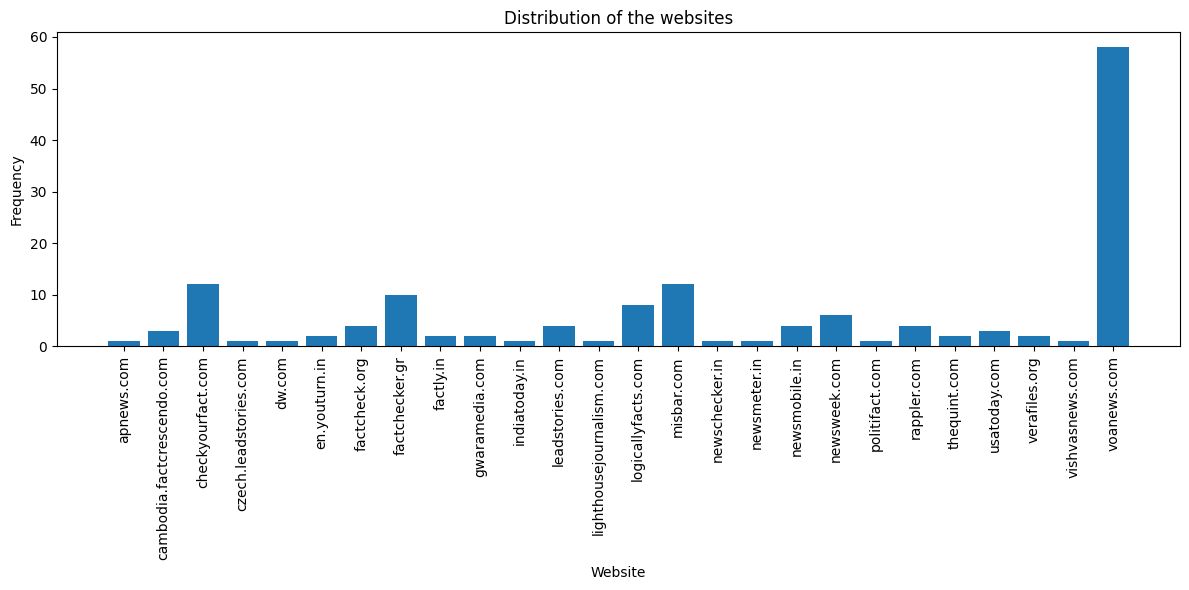

In [28]:
visualize_website_distribution(ukraine_russia_filtered_json)

##### Claims from the following fact-checking websites are not used in the ukraine-russia dataset, because the websites either does not have a fact-checking methodology page at all or it does not have a clear rating/labeling system within its methodology. A clear rating/labeling system is necessary for the later label aggregation step. 

Claims from these websites are not used:

- voanews.com (methodology already checked as part of the Gaza-Israel dataset)
- factchecker.gr (methodoolgy already checked as part of the Gaza-Israel dataset)
- factcheck.org (methodoolgy already checked as part of the Gaza-Israel dataset)
- leadstories.com (methodoolgy already checked as part of the Gaza-Israel dataset)
- newsmobile.in (methodoolgy already checked as part of the Gaza-Israel dataset)
- cambodia.factcrescendo.com (methodoolgy checked now)
- verafiles.org (methodoolgy checked now)
- en.youturn.in (methodoolgy checked now)
- gwaramedia.com (methodoolgy checked now)
- czech.leadstories.com (methodoolgy checked now)
- indiatoday.in (methodoolgy checked now)
- dw.com (methodoolgy checked now)
- apnews.com (methodoolgy checked now)
- lighthousejournalism.com (methodoolgy checked now)



In addition the claim (n=1) form the websites (politifact.com) is also not used, since this websites has already been part of the manual data collection. It seems like the general preprocessing script ("claims_preprocessing.ipynb") did not catch this specific version of the url.



### 2.4) Sampling claims from the fact-checking websites with existing and clear methodology 

Claims from these websites are potentially added to manual df, but are checked for use in the script below:

- misbar.com (methodoolgy already checked as part of the Gaza-Israel dataset)
- checkyourfact.com (methodoolgy already checked as part of the Gaza-Israel dataset)
- newsweek.com (methodoolgy checked now)
- usatoday.com (methodoolgy already checked as part of the Gaza-Israel dataset)
- rappler.com (methodoolgy checked now)
- newschecker.in (methodoolgy checked now)
- vishvasnews.com (cmethodoolgy hecked now)
- newsmeter.in (methodoolgy already checked as part of the Gaza-Israel dataset)



The claims of the logicallyfacts.com websites (which has an existing and clear methodology) could not be used/checked as of now (July, 4th 2025), because the server of the website is down and the website is not reachable. It was working for the Gaza-Ukraine dataset. 



#### 2.4.1) misbar.com

In [16]:
## Write a function to sample all claims from a specific website

def sample_all_claims_from_specific_website(json_data, specific_website):

    """ 
    This function samples all claims from a specific website. 
    
    """

    claims = []

    for claim in json_data.get("claims", []):
        for review in claim.get("claimReview", []):
            publisher = review.get("publisher", {})
            website = publisher.get("site", [])
            if website == specific_website:
                claims.append(claim)


    return claims

In [17]:
sample_misbar = sample_all_claims_from_specific_website(json_data=ukraine_russia_filtered_json, specific_website="misbar.com")
sample_misbar

[{'text': 'Netanyahu recently announced plans to resettle Palestinians in Gaza to Ukraine and Syria.',
  'claimant': 'x.com',
  'claimDate': '2025-04-14T15:07:02Z',
  'claimReview': [{'publisher': {'site': 'misbar.com'},
    'url': 'https://www.misbar.com/en/factcheck/2025/04/14/netanyahu-did-not-announce-plans-relocate-gazans-ukraine-and-syria',
    'title': 'Netanyahu Did Not Announce Plans to Relocate Gazans to Ukraine and Syria',
    'reviewDate': '2025-04-14T15:07:02Z',
    'textualRating': 'misleading',
    'languageCode': 'en'}],
  'index': 1,
  'query': 'Ukraine'},
 {'text': 'Ukrainian President Volodymyr Zelenskyy signing bombs, claiming he was signing Israeli bombs intended for use against Palestinians in Gaza.',
  'claimant': 'x.com',
  'claimDate': '2025-03-05T13:43:12Z',
  'claimReview': [{'publisher': {'site': 'misbar.com'},
    'url': 'https://www.misbar.com/en/factcheck/2025/03/05/image-does-not-show-zelenskyy-signing-bombs-gaza',
    'title': 'This Image Does Not Show 

In [18]:
ukraine_russia_api_df_manual_additions_sample_misbar = {
    1: {
        "Image_URL": "",
        "Context/Label_Explanation": """ Misbar reviewed Trump and Netanyahu’s full meeting, finding that the claim originated from a misinterpretation in Netanyahu’s statement about the situation in Gaza.
                                         After a reporter asked Trump whether the resettlement plans for Gaza were still on the agenda or not, Trump passed the question to Netanyahu, who said that Gaza is “closed in.”
                                         Netanyahu answered that people in other war zones, specifying Syria and Ukraine, had a choice to leave the country. Gaza, however, is the only place where people are locked in. He claimed Israel was not restricting them.
                                         Netanyahu then asked, “What is wrong with giving people a choice?” referring to the resettlement plans for Gazans.""",
        "Text_Only_Claim": True,
        "Normal_Image": False,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },
    9: {
        "Image_URL": "https://web.archive.org/web/20250708174414/https://assets.misbar.com/styles/large_870x490/public/images/2025-03/glezjqnxwaaaxga.jpg.webp?itok=IxyJQHka",
        "Context/Label_Explanation": """ Misbar’s team found that the image shows Zelenskyy signing American bombs produced for Ukraine.
                                         A reverse image search led to a YouTube video published by AFP News Agency in September 2024. The video, which included frames similar to the viral image, showed Zelenskyy visiting an ammunition factory in Scranton, Pennsylvania.
                                         According to AFP’s description, Zelenskyy visited the United States at the time to seek permission to use Western weapons against targets in Russia.
                                         At the 0:56 timestamp, a frame similar to the viral image can be seen.""",
        "Text_Only_Claim": False,
        "Normal_Image": True,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },
    16: {
        "Image_URL": "",
        "Context/Label_Explanation": """Germany’s Foreign Minister Criticized Europe’s Exclusion From U.S.-Russia Talks.
                                        The claim emerged after Germany’s Foreign Minister, Annalena Baerbock, criticized the exclusion of European countries from U.S.-Russia talks on the Ukrainian war, which were recently held in Saudi Arabia.
                                        Baerbock argued that lasting peace in Europe cannot be achieved without European involvement, warning that temporary peace would allow Russia to regroup for future conflicts.
                                        She also stated that downplaying Europe’s role would benefit Russia and called for greater confidence in dealing with the new U.S. administration.""",
        "Text_Only_Claim": True,
        "Normal_Image": False,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },
    18: {
        "Image_URL": "",
        "Context/Label_Explanation": """ Contrary to the viral claim, German Chancellor Olaf Scholz did not call for a state of emergency in Germany after Trump’s recent peace talks.
                                        A closer review of Scholz’s speech reveals that he referred to “Notlage,” not “Notstand” as claimed.
                                        In the video, Scholz said, “The Bundestag should pass a resolution as soon as possible according to which the war in Ukraine and its serious consequences for the security of Germany and Europe are classified as an emergency (Notlage) within the meaning of Article 115 paragraph two of the Basic Law.”
                                        In German, “Notstand” means a state of emergency that would severely restrict citizens’ rights. 
                                        However, “Notlage” appears in the German Basic Law and signifies an urgent situation, but it does not equate to a government-imposed state of emergency.”""",
        "Text_Only_Claim": True,
        "Normal_Image": False,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },
    20: {
        "Image_URL": "",
        "Context/Label_Explanation": """ Misbar’s team searched for the claimed statement from Trump but did not find any reports from credible media outlets.
                                         However, Trump said in a post on his Truth Social platform that he had a call with Putin on February 12, 2025, during which they discussed Ukraine, the Middle East, energy, artificial intelligence, and various other subjects.
                                         During the call, both presidents agreed to have their teams start negotiations immediately. Trump said he would call President Zelenskyy to inform him of their decision, which he planned to do while writing the post.
                                         Media outlets also reported that Ukraine talks would start, citing Trump’s post, but did not report that Trump had reached an agreement to end the war.""",
        "Text_Only_Claim": True,
        "Normal_Image": False,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },
    26: {
        "Image_URL": "https://web.archive.org/web/20250708174656/https://assets.misbar.com/styles/large_870x490/public/images/2025-02/gjdeq0wbwaalt17.jpg.webp?itok=qKe9BPgb",
        "Context/Label_Explanation": """ Misbar investigated the circulating claim and found the claim to be fake; Ben Stiller has publicly denied these allegations, stating that he completely self-funded his trip and received no payment from USAID.
                                        Stiller met with Volodymyr Zelensky in Kyiv as part of his role as an ambassador for the United Nations Refugee Agency (UNHCR) in 2022. In response to the circulating video, Stiller took to X to refute the claims, stating, "These are lies coming from Russian media. I completely self-funded my humanitarian trip to Ukraine. There was no funding from USAID and certainly no payment of any kind. 100% false."
                                        Furthermore, there is no evidence to support that E! News posted that video.""",
        "Text_Only_Claim": False,
        "Normal_Image": True,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },
    67: {
        "Image_URL": "https://assets.misbar.com/styles/large_870x490/public/images/2025-03/picture1_3.jpg.webp?itok=En8rqjRB",
        "Context/Label_Explanation": """Old Photo Shows Wreckage of U.S. MQ-9 Drone Shot Down by Yemeni Forces
                                        Contrary to social media users’ viral claim, the photo does not show the aftermath of a U.S. MQ-9 drone recently shot down by Yemeni air defenses in Dhamar province.
                                        Misbar’s investigative team conducted a thorough reverse image search and found that the photo depicts a drone shot down by Yemeni forces in May 2024.
                                        A local media outlet uploaded the full version of the same wreckage scene, confirming that Yemeni forces downed the U.S. drone in Marib on May 17, 2024.""",
        "Text_Only_Claim": False,
        "Normal_Image": True,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },
    67: {
        "Image_URL": "https://web.archive.org/web/20250708175730/https://assets.misbar.com/styles/large_870x490/public/071098cd4a84b4ec9cbdc82b01279566b81dc4c1.jpg.webp?itok=ZgEl-_E3",
        "Context/Label_Explanation": """Outdated Photo Shows Aftermath of Gaza Rockets on Israel.
                                        Contrary to social media users’ claim, the photo is not related to recent Yemen-Israel reciprocal attacks.
                                        The photo was uploaded to the Times of Israel in October 2023. According to the photo's caption, it depicts a rocket fired from Gaza hitting Ashkelon in southern Israel on October 7, 2023. Photographer Edi Israel took the photo on October 7, 2023, for Flash90.
                                        The same photo was also published in a released article in the Australian Jewish News on October 12.
                                        The photo’s provided caption indicates that the photo was shot in Ashkelon, not Tel Aviv, on October 7, 2023.""",
        "Text_Only_Claim": False,
        "Normal_Image": True,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },
    73: {
        "Image_URL": "",
        "Context/Label_Explanation": """ Users Misunderstood Macron’s Reference to the Bucha Massacre
                                         Misbar’s team reviewed the viral video some users shared supporting their claim and found that Macron was referring to the Bucha massacre
                                         During the press conference, a journalist asked the French president what he would advise Trump to ensure strong and enduring negotiations with Putin, considering that Macron was the last leader to meet Putin before Ukraine’s invasion.
                                         In his French accent, Macron replied that he would never offer advice to Trump. He added that he ceased his discussions with Putin “after Bucha and the war crimes,” explaining that, at the time, Macron believed that France “had nothing to get from him.”
                                         In the press conference clip, published by several outlets including CTV News, the word “Bucha” is clearly audible in Macron’s French accent, not “butcher.”""",
        "Text_Only_Claim": True,
        "Normal_Image": False,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },
    125: {
        "Image_URL": "https://web.archive.org/web/20250708182706/https://pbs.twimg.com/media/GU1wcUMXAAAfRtb?format=png&name=900x900",
        "Context/Label_Explanation": """ An Image Of A Ukrainian Solider Taken In Balakliia
                                         Through Google Reverse Image, Misbar’s team found that the image was originally posted in 2022 before Ukraine’s incursion into the Kursk region.
                                         In September 2022, Ukrainian journalist Denys Kazansky posted the image on his Telegram channel along with the caption, “Balakliia is Ukraine!” suggesting that it was originally captured in Balakelya, a city in eastern Ukraine.
                                         The image was posted in 2022 by the Ukrainian journalist Denys Kazanskyi before Ukraine’s incursion into the Kursk region.""",
        "Text_Only_Claim": False,
        "Normal_Image": False,
        "AI_Generated_Image": False,
        "Altered_Image": True
    },
    128: {
        "Image_URL": "",
        "Context/Label_Explanation": """ New York Times' Article Misinterpreted
                                        The article mentioned that the United States is considering increasing its nuclear arsenal, reversing decades of cutbacks due to concerns about China and Russia. This transition, driven by fears of China's rapid nuclear expansion and Russia's confrontational rhetoric, suggests a shift from merely updating to actively growing its nuclear weapons.
                                        While the Biden administration continues to embrace the vision of a nuclear-free world, it recognizes that new arms control agreements are becoming less likely. The United States hopes to compel China and Russia into negotiations by demonstrating its willingness to increase nuclear capabilities if necessary.""",
        "Text_Only_Claim": True,
        "Normal_Image": False,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },
    129: {
        "Image_URL": "https://web.archive.org/web/20250124154226/https://assets.misbar.com/styles/large_870x490/public/ca394822814b13f54385dea4721da7c695c8af33.jpg.webp?itok=2yKkTtOz",
        "Context/Label_Explanation": """ Poland Celebrates Historic Red Army Defeat
                                        On August 15, the same footage appeared on DW with the comment: “With tensions rising at its eastern borders, Poland put on a big show with a military parade to celebrate Armed Forces Day. Those tensions are also the reason why the country is aiming to build one of Europe's largest military forces.”
                                        Contrary to claims on social media, Poland paid tribute to its historic 1920 triumph over the Red Army on Thursday, August 15, by remembering fallen Poles and showcasing new military equipment.
                                        On Armed Forces Day, around 2,500 Polish soldiers, along with dozens of U.S. and other allied forces, marched in military vehicles or tanks, or flew in fighter jets and helicopters in Warsaw, Poland's capital.""",
        "Text_Only_Claim": False,
        "Normal_Image": True,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },
    132: {
        "Image_URL": "https://web.archive.org/web/20250708182345/https://assets.misbar.com/styles/large_870x490/public/02e0cb01b5e60a76a6e471c7cf03a0adca757164.jpg.webp?itok=r9phsI-z",
        "Context/Label_Explanation": """ Outdated Photo Shows Ukrainian Tanks Destroyed by Russia
                                        Contrary to the circulating claim on social media, the photo was not captured in the context of Ukraine's recent advance in Russia's bordering Kursk region. 
                                        Misbar’s team traced the photo to earlier publications and discovered it had been uploaded to a Vietnamese-language website. The photo, published on June 14, 2023, depicts Leopard 2 tanks and several Ukrainian armored vehicles reportedly destroyed by Russia in Zaporizhia. The photo was credited to Reuters.
                                        The website reported that Ukraine's "iron fist" 47th Brigade had suffered heavy losses at the hands of Russian forces.
                                        RT, the Russian television network, also uploaded the same photo in a published article on July 12, 2023.""",
        "Text_Only_Claim": False,
        "Normal_Image": True,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },
    
}

In [19]:
len(ukraine_russia_api_df_manual_additions_sample_misbar)

12

#### 2.4.2) checkyourfact.com

In [20]:
sample_checkyourfact = sample_all_claims_from_specific_website(json_data=ukraine_russia_filtered_json, specific_website="checkyourfact.com")
sample_checkyourfact

[{'text': 'A post shared on Facebook claims to show a Charlie Hebdo magazine cover of Ukrainian President Volodoymr Zelenskyy.',
  'claimant': 'Viral Image',
  'claimDate': '2025-03-22T00:00:00Z',
  'claimReview': [{'publisher': {'name': 'CheckYourFact',
     'site': 'checkyourfact.com'},
    'url': 'https://checkyourfact.com/2025/03/28/fact-check-charlie-hebdo-magazine-cover-zelenskyy-fake/',
    'title': 'FACT CHECK: Charlie Hebdo Magazine Cover Of Zelenskyy Is Fake',
    'reviewDate': '2025-03-28T15:19:01Z',
    'textualRating': 'False',
    'languageCode': 'en'}],
  'index': 3,
  'query': 'Ukraine'},
 {'text': 'purports to show a Ukrainian flag being raised on the Statue of Liberty',
  'claimant': 'Video',
  'claimDate': '2025-03-03T00:00:00Z',
  'claimReview': [{'publisher': {'name': 'CheckYourFact',
     'site': 'checkyourfact.com'},
    'url': 'https://checkyourfact.com/2025/03/06/fact-check-ukrainian-flag-raised-statue-liberty/',
    'title': 'FACT CHECK: No, The Ukrainian Flag

In [21]:
ukraine_russia_api_df_manual_additions_sample_checkyourfact = {
    3: {
        "Image_URL": "https://web.archive.org/web/20250708173017/https://scontent-arn2-1.xx.fbcdn.net/v/t39.30808-6/517469952_10225038348865417_6450941732752864523_n.jpg?_nc_cat=111&ccb=1-7&_nc_sid=127cfc&_nc_ohc=33B_9jK9M4YQ7kNvwEw8w7d&_nc_oc=AdnQXEPqM2eBclGL2SLoCqCZ5cl09F8nyUkZwXrbqWYI2YG46FqYFeKU6Dz7mnOpA9A&_nc_zt=23&_nc_ht=scontent-arn2-1.xx&_nc_gid=QPZ7qPYieHf-bgWWLWpmEw&oh=00_AfStlFPiGtFk244qw1P3V4Qr6-rOYybNr2OmzuvqFfIVwA&oe=68731813",
        "Context/Label_Explanation": """ This claim is false. Check Your Fact reviewed Charlie Hebdo’s magazine covers, such as the March 19 cover. No such cover shows Zelenskyy in a coffin. A wider search of the magazine’s website also did not yield any results for this claim.
                                        Martin Lom, a Charlie Hebdo journalist, told Logically Facts that the image is fake.
                                        “Yes, it’s a fake, and it’s common since the beginning of the war in Ukraine. The official cover from the week is always pinned on the X official account of the journal,” Lom told the outlet.""",
        "Text_Only_Claim": False,
        "Normal_Image": False,
        "AI_Generated_Image": False,
        "Altered_Image": True
    },
    24: {
        "Image_URL": "",
        "Context/Label_Explanation": """ There is no evidence for this claim. E! News does not have this alleged reporting on its website. No media outlets have referenced this alleged reporting nor have reported on this allegation that USAID paid celebrities to visit Ukraine. """,
        "Text_Only_Claim": True,
        "Normal_Image": False,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },
    27: {
        "Image_URL": "",
        "Context/Label_Explanation": """The claim is false. While Trump did sit down with Von for an interview back in August 2024, he did not mention Starmer or the U.K.’s 100-year deal with Zelenskyy. Likewise, Trump does not appear to have publicly referenced the claim via his personal or government X accounts, his TRUTH Social account, or his verified social media accounts. In addition, neither Starmer nor Zelenskyy have commented on the claim.""",
        "Text_Only_Claim": True,
        "Normal_Image": False,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },
    33: {
        "Image_URL": "",
        "Context/Label_Explanation": """ There is no evidence of this claim. If eight mansions belonging to Ukrainian military officials burned down, media outlets would have covered it, yet none have. A wider internet search also did not yield any results for this claim, either. ”""",
        "Text_Only_Claim": True,
        "Normal_Image": False,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },
    35: {
        "Image_URL": "https://web.archive.org/web/20250116235353/https://f.ptcdn.info/927/081/000/s273jd2al8eVVUlCAaakl-o.png",
        "Context/Label_Explanation": """ This claim is false. No media outlets have reported on Ukrainian officials releasing any such list. A wider internet search also did not yield any results for this claim.
                                        The Dispatch Fact Check also reported that this claim appears to have originated from an October 2023 Thai-language website and then spread to various social media platforms such as X. An expert told the Dispatch that the claim was “absolutely nonsensical.
                                        “There’s no credible sources whatsoever, anywhere, in any contexts that show that Ukraine is making these sorts of payments,” Ian Garner, an assistant professor at the Pilecki Institute, told The Dispatch Fact Check.”""",
        "Text_Only_Claim": False,
        "Normal_Image": False,
        "AI_Generated_Image": False,
        "Altered_Image": True
    },
    40: {
        "Image_URL": "https://web.archive.org/web/20250708180101/https://scontent-arn2-1.xx.fbcdn.net/v/t39.30808-6/505036692_4125956231017504_858135731129961155_n.jpg?_nc_cat=108&ccb=1-7&_nc_sid=127cfc&_nc_ohc=YkSKYqh473YQ7kNvwG_L5K9&_nc_oc=AdndkjWdFBxAswOybwTvT5tpEldRuo9xh_-A-h3KUvpnTXAwCcB0aCQtA9w0_klHjGg&_nc_zt=23&_nc_ht=scontent-arn2-1.xx&_nc_gid=-7Ij-yZtpiNQzgMT8_e9zg&oh=00_AfRI_l6fJQGSk3iSDgYGlhxhpucuLdY0YU4Sc0DWsdKQ3w&oe=6873428D",
        "Context/Label_Explanation": """ These claims are false. If he had done so, media outlets would have covered it, yet none have. A wider internet search and a review of Musk’s X account did not yield any results for this claim. 
                                        The Ukrainian National Defense and Security Council’s Center for Countering Disinformation refuted the claim in a Nov. 6 tweet.""",
        "Text_Only_Claim": False,
        "Normal_Image": False,
        "AI_Generated_Image": False,
        "Altered_Image": True
    },
    68: {
        "Image_URL": "",
        "Context/Label_Explanation": """This claim is false. Gabbard was talking about Modi being friends with Trump, not Putin. She made these remarks during an interview with NDTV.
                                        While some outlets reported that she was talking about Trump and Putin, others corrected it. For example, the Associated Press withdrew their story.
                                        “The Associated Press has withdrawn its story about U.S. Director of National Intelligence Tulsi Gabbard saying President Donald Trump and Russian President Vladimir Putin ‘are very good friends.’ Gabbard was talking about Trump and Indian Prime Minister Narendra Modi. The AP will publish a corrected version of the story,” reads the AP’s withdrawal notice.
                                        Alexa Henning, the deputy chief of staff for Gabbard, called out the incorrect reporting via a post on X.""",
        "Text_Only_Claim": True,
        "Normal_Image": False,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },
    89: {
        "Image_URL": "https://web.archive.org/web/20250708180905/https://pbs.twimg.com/media/GfMBhJaXcAADAym?format=jpg&name=medium",
        "Context/Label_Explanation": """This claim is false. Through a reverse image search, Check Your Fact found that the image was photoshopped from an actual passport shared to Wikipedia. The original passport has been photoshopped to include Assad’s face.""",
        "Text_Only_Claim": False,
        "Normal_Image": False,
        "AI_Generated_Image": False,
        "Altered_Image": True
    },
    110: {
        "Image_URL": "",
        "Context/Label_Explanation": """ The claim is lacking context. When adjusted for adjusted for PPP, Russia ranks fourth. The metric, according to Investopedia, is a “macroeconomic analysis metric” that compares economic productivity and standards of living to other countries using currency conversion rates. Russia’s economy appears to be one of the faster-growing economies at the current time.
                                        According to IMF reports and other economic forecasts, Russia ranks 11th in nominal GDP. This metric, according to Investopedia, is the measurement of all goods and services produced in a country at a given time period. The metric does not remove inflation or the pace in which prices are moving.”""",
        "Text_Only_Claim": True,
        "Normal_Image": False,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },
    114: {
        "Image_URL": "https://web.archive.org/web/20250123092256/https://pbs.twimg.com/media/GYeOyt9WIAAIJ7T?format=jpg&name=small",
        "Context/Label_Explanation": """The image of the F-16 is from 2019. It is an American F-16 that crashed.
                                        This claim is false. Through a reverse image search, Check Your Fact found that the image is from 2019. The image shows an American F-16 that crashed into a California warehouse in May 2019, according to Air and Space Forces Magazine.""",
        "Text_Only_Claim": False,
        "Normal_Image": True,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },
    115: {
        "Image_URL": "https://web.archive.org/web/20250313135839/https://dims.apnews.com/dims4/default/810a90b/2147483647/strip/true/crop/19000x5594+0+0/resize/1440x424!/format/webp/quality/90/?url=https%3A%2F%2Fassets.apnews.com%2F26%2F32%2F8d546e1d085c24b0665a6f399dce%2Fce6c62f457764b4ea6b4ccd54e87a2e8",
        "Context/Label_Explanation": """  This claim is false. The attack was not from NATO, but a Ukrainian drone strike, according to The Associated Press. A Kyiv security official told the outlet that the attack was carried out by Ukrainian Special Operation Forces, Security Service and Intelligence.
                                        At least 100 Ukrainian drones took part in the attack, the outlet reported. The regional governor of Tver told residents they would be able to go back to their homes.""",
        "Text_Only_Claim": False,
        "Normal_Image": True,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },
    
    
}

#### Explanation for the claims within the checkyourfact sample that are not used:

- id 8 -> Claim will not be used, since it relates to an entire (AI-generated) video. There is also no image from the video which could have been used instead.




In [22]:
len(ukraine_russia_api_df_manual_additions_sample_checkyourfact)

11

#### 2.4.3) logicallyfacts.com (Server problems right now, 03.07.25)

In [23]:
sample_logicallyfacts = sample_all_claims_from_specific_website(json_data=ukraine_russia_filtered_json, specific_website="logicallyfacts.com")
sample_logicallyfacts

[{'text': "BBC News chyron naming Valerii Zaluzhnyi as 'Ukraine's next president.'",
  'claimant': 'X, Facebook',
  'claimDate': '2025-04-01T00:00:00Z',
  'claimReview': [{'publisher': {'name': 'Logically Facts',
     'site': 'logicallyfacts.com'},
    'url': 'https://www.logicallyfacts.com/en/fact-check/bbc-news-did-not-say-zaluzhny-the-next-president-of-ukraine-is-fake',
    'title': "No, this isn't a real BBC News broadcast about Valerii Zaluzhny",
    'reviewDate': '2025-04-22T00:00:00Z',
    'textualRating': 'Fake',
    'languageCode': 'en'}],
  'index': 0,
  'query': 'Ukraine'},
 {'text': "Mark Rubio threatens to 'cut off Ukraine's Starlink access.'",
  'claimant': 'X, Facebook',
  'claimDate': '2025-03-06T00:00:00Z',
  'claimReview': [{'publisher': {'name': 'Logically Facts',
     'site': 'logicallyfacts.com'},
    'url': 'https://www.logicallyfacts.com/en/fact-check/video-showing-mark-rubio-threatening-ukraine-cutting-off-starlink-access-is-edited',
    'title': "No, Rubio didn

In [24]:
ukraine_russia_api_df_manual_additions_logicallyfacts = {
    
    
    
}

In [25]:
len(ukraine_russia_api_df_manual_additions_logicallyfacts)

0

#### 2.4.4) newsweek.com

- Fact Checking Methodology: https://www.newsweek.com/ratings-fact-check

In [26]:
sample_newsweek = sample_all_claims_from_specific_website(json_data=ukraine_russia_filtered_json, specific_website="newsweek.com")
sample_newsweek

[{'text': 'Trump says Russia has lost 1.5 million troops In Ukraine war',
  'claimant': 'Donald Trump',
  'claimDate': '2025-02-14T17:57:33Z',
  'claimReview': [{'publisher': {'name': 'Newsweek', 'site': 'newsweek.com'},
    'url': 'https://www.newsweek.com/fact-check-trump-russia-ukraine-war-losses-troops-2030104',
    'title': 'Fact Check: Trump Says Russia Has Lost 1.5 Million Troops In Ukraine War',
    'reviewDate': '2025-02-14T17:57:33Z',
    'textualRating': 'False',
    'languageCode': 'en'}],
  'index': 21,
  'query': 'Ukraine'},
 {'text': 'Ukraine is selling half of the armaments it receives from the United States',
  'claimant': 'Tucker Carlson',
  'claimDate': '2025-02-12T19:03:29Z',
  'claimReview': [{'publisher': {'name': 'Newsweek', 'site': 'newsweek.com'},
    'url': 'https://www.newsweek.com/fact-check-tucker-carlson-ukraine-weapons-black-market-cartels-2030011',
    'title': 'Fact Check: Are Ukrainian Weapons Being Sold on Black Market?',
    'reviewDate': '2025-02-12

In [27]:
ukraine_russia_api_df_manual_additions_sample_newsweek = {
    21: {
        "Image_URL": "",
        "Context/Label_Explanation": """ For the benefit of the doubt, and as it wasn't explicit, Newsweek has treated the term "lost" to mean losses from those killed or injured. Trump said last month that 1.7 million soldiers across both sides had been killed, as reported by Politico, for which there is no evidence. Even though he went on to say that he was "interested primarily from the standpoint of death," Newsweek assessed the total of wounded and killed.
                                        A November 2024 report by the French Institute of International Relations referenced British military intelligence that said that as of May 2024, Russia's killed and wounded was up to 500,000. Using data from other conflicts to estimate the amount of Russian irreversible losses (those killed, wounded who died in hospital, or otherwise immobilized), the report suggested total irreversible Russian casualties in Ukraine by mid-summer 2024 had reached around 460,000.
                                        In December 2024, the U.K. Minister for the Armed Forces, Luke Pollard MP, told the U.K. Parliament's House of Commons: "Our assessments further indicate there have been over 750,000 Russian casualties since the beginning of the full-scale invasion with the grim milestone of one million Russians dead and wounded likely to be reached within approximately six months."
                                        Global security experts at the International Institute for Strategic Studies (IISS) said in a report published this week that, as of early January 2025, it estimated a minimum of 172,000 Russian troops had been killed, with 611,000 wounded, of whom 376,000 were severely wounded. Recruitment since the start of the war had generated approximately 976,000 personnel, it said, adding that up to an accumulated 235,000 Russian wounded were "recoverable."
                                        Recent estimates published by Ukraine's military say that as of February 10, 2025, Russian casualties had reached 850,490. While larger, its total isn't far from independent experts and government reports, with recent Ukrainian analyses echoing experts outside Kyiv. For example, the IISS's estimate of 783,000 from early January 2025 was, by its own words, a "minimum" approximate and, as noted by defense-industry specialist magazine Defense Express, was roughly in line with the Ukrainian military estimate published in late December 2024 of 789,550.""",
        "Text_Only_Claim": True,
        "Normal_Image": False,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },
    22: {
        "Image_URL": "",
        "Context/Label_Explanation": """ Claims that NATO weapons and ammunition are being put on sale on the dark web have re-surfaced in recent months, but as other outlets have reported, there is no evidence that any such products have actually made it into the hands of a prospective buyer.
                                         A Newsweek analysis of similar claims made in 2022, the year the war began, reveals a coordinated effort by Russian disinformation networks to spread false narratives about Ukraine's handling of Western-supplied weapons.
                                         This effort has included fabricated dark web ads, with pro-Russian outlets circulating images of a supposed Javelin anti-tank weapon for sale online. However, the listing was traced back to pro-Russian Telegram channels, and the images themselves dated to 2014— preceding both the war and the current levels of U.S. military support.""",
        "Text_Only_Claim": True,
        "Normal_Image": False,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },
    29: {
        "Image_URL": "",
        "Context/Label_Explanation": """  According to a recent survey by the Kyiv International Institute of Sociology (KIIS) published in early February, 57 percent of Ukrainians said they trust Zelensky.
                                         The rating marks a slight increase from the KIIS's December 2024 polls, conducted before Trump's return to the presidency, that showed 52 percent trust in Zelensky.
                                         In addition, 69 percent of Ukrainians approve of Zelensky's actions, according to an October 2024 poll published by the International Republican Institute.""",
        "Text_Only_Claim": True,
        "Normal_Image": False,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },
    75: {
        "Image_URL": "",
        "Context/Label_Explanation": """ In an interview with The Wall Street Journal published on February 14, Vance was asked about security guarantees the U.S. could provide Ukraine as part of a peace settlement with Russia, and what "instruments of pressure" could ensure Moscow's cooperation.
                                        In his response, Vance mentioned "military tools of leverage" among a "range of options."
                                        "I think certainly, look, there, there are instruments of pressure, absolutely. And again, if you look at President Trump's approach to this, he—the range of options is extremely broad," Vance said.”""",
        "Text_Only_Claim": True,
        "Normal_Image": False,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },
    84: {
        "Image_URL": "",
        "Context/Label_Explanation": """ Newsweek has not found any statement from Russian officials offering support to California.
                                        There are no official public statements from Sergey Shchetinin, named on Russian government websites as the Chairman of the Executive Committee of the Russian Union of Rescuers, under the Russian Emergencies Ministry.”""",
        "Text_Only_Claim": True,
        "Normal_Image": False,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },
    112: {
        "Image_URL": "",
        "Context/Label_Explanation": """ While Hegseth aligned with the claim that Putin was a "war criminal," the clip shared online was from March 2022 not long after the outbreak of the conflict.
                                        Since then Hegseth has been more cautious, and critical of the U.S. intervention in Ukraine and the prognosis from others that Russia's intervention would lead to wider conflict.""",
        "Text_Only_Claim": True,
        "Normal_Image": False,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },
    
    
    
}

In [28]:
len(ukraine_russia_api_df_manual_additions_sample_newsweek)

6

#### 2.4.5) usatoday.com


In [29]:
sample_usatoday = sample_all_claims_from_specific_website(json_data=ukraine_russia_filtered_json, specific_website="usatoday.com")
sample_usatoday

[{'text': 'European Parliament applauding decision to allow Ukraine to use US missiles',
  'claimant': 'social media',
  'claimDate': '2024-11-22T00:00:00Z',
  'claimReview': [{'publisher': {'name': 'USA Today', 'site': 'usatoday.com'},
    'url': 'https://www.usatoday.com/story/news/factcheck/2024/12/03/parliament-applaud-ukraines-us-missiles-fact-check/76710640007/',
    'title': "Parliament didn't applaud Ukraine's use of US missiles | Fact check",
    'reviewDate': '2024-12-03T22:31:00Z',
    'textualRating': 'False',
    'languageCode': 'en'}],
  'index': 38,
  'query': 'Ukraine'},
 {'text': "John Thune blocked Adam Schiff's assignments over Russia investigation",
  'claimant': 'Social media',
  'claimDate': '2025-01-11T00:00:00Z',
  'claimReview': [{'publisher': {'name': 'USA Today', 'site': 'usatoday.com'},
    'url': 'https://www.usatoday.com/story/news/factcheck/2025/01/16/adam-schiff-senate-committees-fact-check/77718124007/',
    'title': 'No, Adam Schiff wasn’t blocked from

In [30]:
ukraine_russia_api_df_manual_additions_sample_usatoday = {
    85: {
        "Image_URL": "",
        "Context/Label_Explanation": """ There is no evidence Senate Majority Leader John Thune blocked Sen. Adam Schiff from any committee assignments. Schiff is listed as a member of four Senate committees, and a spokesperson for Schiff said the claim is false.""",
        "Text_Only_Claim": True,
        "Normal_Image": False,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },  
}

#### Explanation for the claims within the usatoday sample that are not used:

- id 38 -> Claim is relating to a video scene and is thus not used.
- id 127 -> Claim is already part of the dataset.




In [31]:
len(ukraine_russia_api_df_manual_additions_sample_usatoday)

1

#### 2.4.6) rappler.com


In [32]:
sample_rappler = sample_all_claims_from_specific_website(json_data=ukraine_russia_filtered_json, specific_website="rappler.com")
sample_rappler

[{'text': 'Russian President Vladimir Putin has died in an explosion in one of his limousines.',
  'claimant': 'Kaalam PH',
  'claimDate': '2025-04-17T06:49:48Z',
  'claimReview': [{'publisher': {'name': 'Rappler', 'site': 'rappler.com'},
    'url': 'https://www.rappler.com/newsbreak/fact-check/vladimir-putin-alive-not-dead-moscow-limousine-explosion/',
    'title': 'FACT CHECK: Putin is alive, not killed in Moscow limo explosion',
    'reviewDate': '2025-04-17T06:49:48Z',
    'textualRating': 'False',
    'languageCode': 'en'}],
  'index': 64,
  'query': 'Russia'},
 {'text': 'China and Japan plan to invade the Russian Federation',
  'claimant': 'Saliksik TV',
  'claimDate': '2025-02-10T08:47:10Z',
  'claimReview': [{'publisher': {'name': 'Rappler', 'site': 'rappler.com'},
    'url': 'https://www.rappler.com/newsbreak/fact-check/no-russia-invasion-china-japan-february-2025/',
    'title': 'FACT CHECK: No invasion of Russia by China and Japan',
    'reviewDate': '2025-02-10T08:47:10Z',


In [33]:
ukraine_russia_api_df_manual_additions_sample_rappler = {
    64: {
        "Image_URL": "",
        "Context/Label_Explanation": """ Putin is alive. On April 11, Putin met US envoy Steve Winkoff in Saint Petersburg to discuss “various aspects of the Ukrainian settlement.” The Kremlin leader also recently met Russian nationals who were freed following their captivity in the Gaza strip.
                                        A Newsweek report stated that an Aurus Senat limousine, reportedly managed by the Presidential Property Management Department, caught fire near the Federal Security Service headquarters in the Russian capital of Moscow on March 29. There are currently no confirmed details about who was using the vehicle at the time of the explosion. 
                                        """,
        "Text_Only_Claim": True,
        "Normal_Image": False,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },  
    78: {
        "Image_URL": "",
        "Context/Label_Explanation": """ There are no reports from the foreign affairs and defense ministries of China and the foreign affairs and defense ministries of Japan about a supposed joint invasion of Russia. The video is a mere discussion of the geopolitical situation between China, Japan, the United States, and Russia. It provides no further mention nor proof of its claim. 
                                        """,
        "Text_Only_Claim": True,
        "Normal_Image": False,
        "AI_Generated_Image": False,
        "Altered_Image": False
    }, 
    99: {
        "Image_URL": "",
        "Context/Label_Explanation": """ Russia has not declared war on the US. There are no reports from credible media outlets or government statements confirming the claim. The video merely narrates recent developments in the ongoing conflict between Russia and Ukraine. 
                                        """,
        "Text_Only_Claim": True,
        "Normal_Image": False,
        "AI_Generated_Image": False,
        "Altered_Image": False
    },
    
}

#### Explanation for the claims within the rappler sample that are not used:

- id 130 -> Claim will not be used, since it does not relate to the Ukraine-Russia war at all. It is about the alleged naturalization of a Russian volleyball player into the Phillippines. Since it does not cover an event or a person that is involved in the war (e.g., politicians, soldiers) nor is a public person, this claim will not be used.




In [12]:
len(ukraine_russia_api_df_manual_additions_sample_rappler)

3

#### 2.4.7) newschecker.in


In [34]:
sample_newschecker = sample_all_claims_from_specific_website(json_data=ukraine_russia_filtered_json, specific_website="newschecker.in")
sample_newschecker

[{'text': 'Image shows a transcript of the White House meeting between US president Donald Trump, vice-president JD Vance and Ukrainian president Volodymyr Zelenskyy.',
  'claimant': 'Viral social media post',
  'claimDate': '2025-03-08T00:00:00Z',
  'claimReview': [{'publisher': {'name': 'Newschecker',
     'site': 'newschecker.in'},
    'url': 'https://newschecker.in/fact-check/fact-check/fake-transcript-of-fiery-trump-zelenskyy-exchange-in-oval-office-goes-viral',
    'title': 'Fact Check: Fake Transcript Of Fiery Trump-Zelenskyy Exchange In Oval Office Goes Viral',
    'reviewDate': '2025-03-08T00:00:00Z',
    'textualRating': 'False',
    'languageCode': 'en'}],
  'index': 6,
  'query': 'Ukraine'}]

In [35]:
ukraine_russia_api_df_manual_additions_sample_newschecker = {
    6: {
        "Image_URL": "https://web.archive.org/web/20250708173820/https://pbs.twimg.com/media/Gk6BU28WkAARbCo?format=jpg&name=large",
        "Context/Label_Explanation": """ Newschecker first looked up the 49-minute 49-second meeting and its transcript that was available on C-Span, a public affairs TV network that covers the White House and national politics. At no point in the video nor in the transcript was there an exchange as seen in the viral image.
                                        """,
        "Text_Only_Claim": False,
        "Normal_Image": False,
        "AI_Generated_Image": False,
        "Altered_Image": True
    },  
    
}

In [36]:
len(ukraine_russia_api_df_manual_additions_sample_newschecker)

1

#### 2.4.8) vishvasnews.com


In [9]:
sample_vishvasnews = sample_all_claims_from_specific_website(json_data=ukraine_russia_filtered_json, specific_website="vishvasnews.com")
sample_vishvasnews

[{'text': 'PM Modi and Chinese President Did Not Shake Hands At BRICS Summit In Russia',
  'claimant': 'Facebook user SK Kapoor',
  'claimDate': '2024-10-29T10:51:04Z',
  'claimReview': [{'publisher': {'site': 'vishvasnews.com'},
    'url': 'https://www.vishvasnews.com/english/politics/fact-check-pm-modi-and-chinese-president-did-shake-hands-at-brics-summit-in-russia-misleading-post-viral/',
    'title': 'Fact Check: PM Modi and Chinese President Did Shake Hands At BRICS Summit In Russia; Misleading Post Viral - Vishvas News',
    'reviewDate': '2024-10-29T10:51:04Z',
    'textualRating': 'False',
    'languageCode': 'en'}],
  'index': 108,
  'query': 'Russia'}]

#### Explanation for the claims within the vishvasnews sample that are not used:

- id 108 -> Claim will not be used, since it relates to a specific scene within a video clip.




In [38]:
ukraine_russia_api_df_manual_additions_sample_vishvasnews = {
}

len(ukraine_russia_api_df_manual_additions_sample_vishvasnews)

0

#### 2.4.9) newsmeter.in


In [10]:
sample_newsmeter = sample_all_claims_from_specific_website(json_data=ukraine_russia_filtered_json, specific_website="newsmeter.in")
sample_newsmeter

[{'text': 'Russian President Vladimir Putin received Chinese president Xi Jinping at the Moscow airport but did not do the same for Prime Minister Narendra Modi.',
  'claimant': 'X users',
  'claimDate': '2024-07-09T12:25:02Z',
  'claimReview': [{'publisher': {'name': 'NewsMeter', 'site': 'newsmeter.in'},
    'url': 'https://newsmeter.in/fact-check/putin-did-not-receive-both-xi-jinping-and-pm-modi-at-moscow-airport-claim-is-false-732175',
    'title': 'Fact Check: Putin did not receive both Xi Jinping and PM Modi at Moscow airport; claim is false',
    'reviewDate': '2024-07-09T12:25:02Z',
    'textualRating': 'False',
    'languageCode': 'en'}],
  'index': 144,
  'query': 'Russia'}]

#### Explanation for the claims within the newsmeter.in sample that are not used:

- id 144 -> Claim will not be used, since it relates to a specific scene within a video clip.




In [39]:
ukraine_russia_api_df_manual_additions_sample_newsmeter = {
}

len(ukraine_russia_api_df_manual_additions_sample_newsmeter)

0

In [61]:
### Number of API claims that are added to the manual claims

ukraine_russia_api_df_manual_additions_combined = (ukraine_russia_api_df_manual_additions_sample_misbar  | ukraine_russia_api_df_manual_additions_sample_checkyourfact | 
                                        ukraine_russia_api_df_manual_additions_logicallyfacts | ukraine_russia_api_df_manual_additions_sample_newsweek | 
                                        ukraine_russia_api_df_manual_additions_sample_usatoday | ukraine_russia_api_df_manual_additions_sample_rappler | 
                                        ukraine_russia_api_df_manual_additions_sample_newschecker | ukraine_russia_api_df_manual_additions_sample_vishvasnews | ukraine_russia_api_df_manual_additions_sample_newsmeter)


len(ukraine_russia_api_df_manual_additions_combined)

34

In [62]:
ukraine_russia_api_df_manual_additions_combined

{1: {'Image_URL': '',
  'Context/Label_Explanation': ' Misbar reviewed Trump and Netanyahu’s full meeting, finding that the claim originated from a misinterpretation in Netanyahu’s statement about the situation in Gaza.\n                                         After a reporter asked Trump whether the resettlement plans for Gaza were still on the agenda or not, Trump passed the question to Netanyahu, who said that Gaza is “closed in.”\n                                         Netanyahu answered that people in other war zones, specifying Syria and Ukraine, had a choice to leave the country. Gaza, however, is the only place where people are locked in. He claimed Israel was not restricting them.\n                                         Netanyahu then asked, “What is wrong with giving people a choice?” referring to the resettlement plans for Gazans.',
  'Text_Only_Claim': True,
  'Normal_Image': False,
  'AI_Generated_Image': False,
  'Altered_Image': False},
 9: {'Image_URL': 'https://as

In [69]:
## Get the indices of the API claims 

indices_api_claims_to_keep = ukraine_russia_api_df_manual_additions_combined.keys()

## Filter the API df (original size: n = 147) to only keep the claims which were sampled/checked above

df_ukraine_russia_filtered = df[df["id"].isin(indices_api_claims_to_keep)]


## Check that filtering was successful
print(len(df_ukraine_russia_filtered))
df_ukraine_russia_filtered.head()



34


,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image
1,1,misbar.com,https://www.misbar.com/en/factcheck/2025/04/14...,Netanyahu Did Not Announce Plans to Relocate G...,2025-04-14T15:07:02Z,2025-04-14T15:07:02Z,Ukraine,misleading,,Netanyahu recently announced plans to resettle...,,,,,
3,3,checkyourfact.com,https://checkyourfact.com/2025/03/28/fact-chec...,FACT CHECK: Charlie Hebdo Magazine Cover Of Ze...,2025-03-22T00:00:00Z,2025-03-28T15:19:01Z,Ukraine,False,,A post shared on Facebook claims to show a Cha...,,,,,
6,6,newschecker.in,https://newschecker.in/fact-check/fact-check/f...,Fact Check: Fake Transcript Of Fiery Trump-Zel...,2025-03-08T00:00:00Z,2025-03-08T00:00:00Z,Ukraine,False,,Image shows a transcript of the White House me...,,,,,
9,9,misbar.com,https://www.misbar.com/en/factcheck/2025/03/05...,This Image Does Not Show Zelenskyy Signing Bom...,2025-03-05T13:43:12Z,2025-03-05T13:43:12Z,Ukraine,misleading,,Ukrainian President Volodymyr Zelenskyy signin...,,,,,
16,16,misbar.com,https://www.misbar.com/en/factcheck/2025/02/23...,Germany Has Not Threatened To Cut Ties With th...,2025-02-23T07:17:53Z,2025-02-23T07:17:53Z,Ukraine,fake,,German Foreign Minister Baerbock threatens US ...,,,,,


### 2.5) Update the API df with the manual data from the dictionaries

In [64]:
# Adding the data of the dictionary to the df


## Create a function that can be re-used for the Ukraine-Russia df
def update_api_df_with_manual_data_from_dictionary(df, data_dict, id_column = "id", columns_to_update= 
                                                   ['Image_URL', 'Context/Label_Explanation', 
                                                        'Text_Only_Claim', 'Normal_Image', 
                                                        'AI_Generated_Image', 'Altered_Image']):

    """ 
    Add description here
    """

    # Create a copy of the DataFrame to avoid modifying the original
    df_updated = df.copy()

    # Track IDs not found in the df
    ids_not_found = []

    ## Loop through each claim in the dictionary
    for index, data in data_dict.items():
        # Find rows where id column matches the dictionary key
        match = df_updated[id_column] == index

        # If a matching row is found
        if match.any():
            # Update the columns with the manually collected data at once for each matched row
            for column in columns_to_update:
                if column in data:
                    df.loc[match, column] = data[column]

        else:
            ids_not_found.append(index)

    # Print IDs not found (if any exist)
    if ids_not_found:
        print(f"The following IDs were not found in the df: {ids_not_found}")


    return df

In [70]:
df_ukraine_russia_filtered_updated = update_api_df_with_manual_data_from_dictionary(df=df_ukraine_russia_filtered, data_dict=ukraine_russia_api_df_manual_additions_combined)
print(len(df_ukraine_russia_filtered_updated))
df_ukraine_russia_filtered_updated.head()

34


,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image
1,1,misbar.com,https://www.misbar.com/en/factcheck/2025/04/14...,Netanyahu Did Not Announce Plans to Relocate G...,2025-04-14T15:07:02Z,2025-04-14T15:07:02Z,Ukraine,misleading,,Netanyahu recently announced plans to resettle...,Misbar reviewed Trump and Netanyahu’s full me...,True,False,False,False
3,3,checkyourfact.com,https://checkyourfact.com/2025/03/28/fact-chec...,FACT CHECK: Charlie Hebdo Magazine Cover Of Ze...,2025-03-22T00:00:00Z,2025-03-28T15:19:01Z,Ukraine,False,https://scontent-arn2-1.xx.fbcdn.net/v/t39.308...,A post shared on Facebook claims to show a Cha...,This claim is false. Check Your Fact reviewed...,False,False,False,True
6,6,newschecker.in,https://newschecker.in/fact-check/fact-check/f...,Fact Check: Fake Transcript Of Fiery Trump-Zel...,2025-03-08T00:00:00Z,2025-03-08T00:00:00Z,Ukraine,False,https://pbs.twimg.com/media/Gk6BU28WkAARbCo?fo...,Image shows a transcript of the White House me...,Newschecker first looked up the 49-minute 49-...,False,False,False,True
9,9,misbar.com,https://www.misbar.com/en/factcheck/2025/03/05...,This Image Does Not Show Zelenskyy Signing Bom...,2025-03-05T13:43:12Z,2025-03-05T13:43:12Z,Ukraine,misleading,https://assets.misbar.com/styles/large_870x490...,Ukrainian President Volodymyr Zelenskyy signin...,Misbar’s team found that the image shows Zele...,False,True,False,False
16,16,misbar.com,https://www.misbar.com/en/factcheck/2025/02/23...,Germany Has Not Threatened To Cut Ties With th...,2025-02-23T07:17:53Z,2025-02-23T07:17:53Z,Ukraine,fake,,German Foreign Minister Baerbock threatens US ...,Germany’s Foreign Minister Criticized Europe’s...,True,False,False,False


In [71]:
# Check the final api df for any NAs

# number of rows with na's
print(df_ukraine_russia_filtered_updated.isnull().sum().sum())


# print out rows with NaN values in any column (if any)
df_ukraine_russia_filtered_updated.loc[df_ukraine_russia_filtered_updated.isnull().any(axis=1)] 

0


,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image


In [73]:
# Remove the newline characters in the Context/Label_Explanation column for better readability when opening the df as a csv

df_ukraine_russia_filtered_updated["Context/Label_Explanation"] = df_ukraine_russia_filtered_updated["Context/Label_Explanation"].str.replace("\n", "")

# Strip any remaining whitespace 

df_ukraine_russia_filtered_updated["Context/Label_Explanation"] = df_ukraine_russia_filtered_updated["Context/Label_Explanation"].str.replace(r'\s+', ' ', regex=True)


df_ukraine_russia_filtered_updated.head()

/var/folders/yf/8jt3z6xx21z0rv6lrj7sdr800000gn/T/ipykernel_1741/3478219322.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ukraine_russia_filtered_updated["Context/Label_Explanation"] = df_ukraine_russia_filtered_updated["Context/Label_Explanation"].str.replace("\n", "")
/var/folders/yf/8jt3z6xx21z0rv6lrj7sdr800000gn/T/ipykernel_1741/3478219322.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ukraine_russia_filtered_updated["Context/Label_Explanation"] = df_ukraine_russia_filtered_updated["Cont

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Label_Website,Image_URL,Original_Claim_Only,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image
1,1,misbar.com,https://www.misbar.com/en/factcheck/2025/04/14...,Netanyahu Did Not Announce Plans to Relocate G...,2025-04-14T15:07:02Z,2025-04-14T15:07:02Z,Ukraine,misleading,,Netanyahu recently announced plans to resettle...,Misbar reviewed Trump and Netanyahu’s full me...,True,False,False,False
3,3,checkyourfact.com,https://checkyourfact.com/2025/03/28/fact-chec...,FACT CHECK: Charlie Hebdo Magazine Cover Of Ze...,2025-03-22T00:00:00Z,2025-03-28T15:19:01Z,Ukraine,False,https://scontent-arn2-1.xx.fbcdn.net/v/t39.308...,A post shared on Facebook claims to show a Cha...,This claim is false. Check Your Fact reviewed...,False,False,False,True
6,6,newschecker.in,https://newschecker.in/fact-check/fact-check/f...,Fact Check: Fake Transcript Of Fiery Trump-Zel...,2025-03-08T00:00:00Z,2025-03-08T00:00:00Z,Ukraine,False,https://pbs.twimg.com/media/Gk6BU28WkAARbCo?fo...,Image shows a transcript of the White House me...,Newschecker first looked up the 49-minute 49-...,False,False,False,True
9,9,misbar.com,https://www.misbar.com/en/factcheck/2025/03/05...,This Image Does Not Show Zelenskyy Signing Bom...,2025-03-05T13:43:12Z,2025-03-05T13:43:12Z,Ukraine,misleading,https://assets.misbar.com/styles/large_870x490...,Ukrainian President Volodymyr Zelenskyy signin...,Misbar’s team found that the image shows Zele...,False,True,False,False
16,16,misbar.com,https://www.misbar.com/en/factcheck/2025/02/23...,Germany Has Not Threatened To Cut Ties With th...,2025-02-23T07:17:53Z,2025-02-23T07:17:53Z,Ukraine,fake,,German Foreign Minister Baerbock threatens US ...,Germany’s Foreign Minister Criticized Europe’s...,True,False,False,False


In [74]:
# Save the final df with similar file naming structure than the manual dataset (gaza_israel_manual_dataset_010724_300425.csv)

df_ukraine_russia_filtered_updated.to_csv("../ukraine_russia/API_data_collection/ukraine_russia_api_dataset_010724_300425.csv")
